# biosc - diagnostics: isochrones and $A(Li)$ model comparison

In [1]:
string = 'work'

In [2]:
## to change directory:
## string_directory = 'path...'

In [3]:
from matplotlib.path import Path
import pymc as pm
import arviz as az
import bambi as bmb
import xarray as xr
import biosc
import biosc.preprocessing
import matplotlib.ticker as ticker

from pymc import HalfCauchy, Model, Normal, sample

import os
import matplotlib.cm as cm
from netCDF4 import Dataset as NetCDFFile
from scipy.stats import gaussian_kde

from biosc.preprocessing import Preprocessing
from biosc.bhm import BayesianModel

In [4]:
import models_test

In [5]:
Jmag_lbda = 12350.00
Hmag_lbda = 16620.00
Kmag_lbda = 21590.00
BP_lbda = 5109.71
G_lbda = 6217.59
RP_lbda = 7769.02
gmag_lbda = 4849.11
rmag_lbda = 6201.20
wmag_lbda = 6285.91
imag_lbda = 7534.96
zmag_lbda = 8674.20
ymag_lbda = 9627.79


In [6]:
import models_test
from models_test import plt, np, pd, pc, select_nearest_age

path_all = pc(string)
## to change directory:
## path_all = pc_other(string_directory)

import sys
sys.path.append(path_all)

import bmp
from bmp import BayesianModelPlots

In [7]:
path_all

'/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/'

In [8]:
plt.rcParams.update({'font.size': 14, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

### Pleiades data

In [9]:
from models_test import PleiadesData

path_data = path_all + 'data/Pleiades_DANCe+GDR3+2MASS+PanSTARRS1+A_Li+Lbol.csv'
pleiades_data = PleiadesData(path_data)

data_obs_Pleiades = pleiades_data.data

In [10]:
data_obs_Pleiades

source_id Mecayotl Olivares+2018 Meingast+2021           l  \
0    66787119410915072     True          True          True  166.210733   
1    64977705525131904     True          True          True  167.014088   
2    65195404530870144     True          True          True  166.401835   
3    64942001460286080     True          True          True  167.530351   
4    64433924008996224     True          True          True  167.187075   
..                 ...      ...           ...           ...         ...   
941  68045583484082048     True          True          True  164.243788   
942  65113559634339200     True          True          True  165.803768   
943  64987876007763968     True          True          True  167.304764   
944  71056252479453056     True          True          True  163.033014   
945  65129506848731136     True          True          True  166.221501   

             b         ra  ra_error        dec  dec_error  ...      r_abs  \
0   -23.276099  56.662143  0.014997  24.520108   0.009073  ...   7.418857   
1   -24.105530  56.647305  0.018675  23.411531   0.012227  ...   8.549097   
2   -23.959280  56.302660  0.187139  23.895691   0.137836  ...  14.008637   
3   -23.713150  57.315181  0.117257  23.380170   0.079404  ...  13.164333   
4   -25.469587  55.777180  0.158969  22.296886   0.108396  ...  13.654355   
..         ...        ...       ...        ...        ...  ...        ...   
941 -25.259933  53.747213  0.023608  24.204450   0.018528  ...   9.355493   
942 -25.252330  54.921665  0.014164  23.290687   0.010935  ...   4.161775   
943 -23.830079  57.063558  0.061383  23.434686   0.049673  ...  11.529959   
944 -22.724805  54.616063  0.095418  26.856932   0.065394  ...  12.175861   
945 -24.634561  55.676696  0.013654  23.502637   0.009224  ...   6.892914   

         i_abs      y_abs      z_abs      g_abs       G-J      G-RP     BP-RP  \
0     6.972857   6.525157   6.694857   8.224757  1.826829  0.810348  1.512766   
1     7.790097   7.159997   7.424497   9.772697  2.421177  1.006676  2.033531   
2    12.001337  10.590737  11.072637  15.369937  3.461519  1.369004  3.289309   
3    11.330633  10.050533  10.483733  14.439433  3.319764  1.337366  3.338682   
4    11.738355  10.399955  10.850355  15.065555  3.404532  1.361330  3.481064   
..         ...        ...        ...        ...       ...       ...       ...   
941   8.326793   7.636193   7.872993  10.560393  2.526645  1.083299  2.277171   
942   4.078775   4.069775   4.064775   4.429775  0.890571  0.437847  0.711143   
943  10.045959   9.017459   9.351059  12.720659  3.020585  1.246986  2.865516   
944  10.479061   9.307561   9.688561  13.449461  3.192930  1.292702  3.159868   
945   6.468914   6.072914   6.199914   7.756914  1.825894  0.746666  1.346799   

         Lsun  log(L/Lsun)  
0    0.155611    -0.807959  
1    0.076629    -1.115607  
2         NaN          NaN  
3    0.007924    -2.101050  
4    0.006176    -2.209322  
..        ...          ...  
941  0.052494    -1.279886  
942  1.683682     0.226260  
943  0.015930    -1.797787  
944  0.011978    -1.921621  
945  0.238297    -0.622882  

[946 rows x 100 columns]

In [11]:
data_obs_Pleiades.columns

Index(['source_id', 'Mecayotl', 'Olivares+2018', 'Meingast+2021', 'l', 'b',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'pmra_pmdec_corr',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'g', 'bp', 'rp', 'e_g',
       'e_bp', 'e_rp', 'dr3_radial_velocity', 'dr3_radial_velocity_error',
       'ruwe', 'astrometric_excess_noise', 'astrometric_params_solved',
       'bp_rp', 'g_rp', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag',
       'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag',
       'ymag', 'e_ymag', 'Name', 'EPIC', 'RAJ2000', 'DEJ2000', 'Vmag', 'J-K',
       'Per', 'Amp', 'l_WLi', 'WLi', 'e_WLi', 'Teff', 'ALi', 'e_ALi', 'Bin',
       'SimbadName', 'Teff_x', 'logg', '[Fe/H]', 'A0', 'AG', 'ABP', 'ARP',
       'E(BP-RP)', 'Rad', 'Li

In [12]:
data_obs_Pleiades['e_G'] = data_obs_Pleiades['e_g']
data_obs_Pleiades['e_RP'] = data_obs_Pleiades['e_rp']
data_obs_Pleiades['e_BP'] = data_obs_Pleiades['e_bp']
data_obs_Pleiades['e_J'] = data_obs_Pleiades['e_Jmag']
data_obs_Pleiades['e_K'] = data_obs_Pleiades['e_Kmag']
data_obs_Pleiades['e_H'] = data_obs_Pleiades['e_Hmag']
data_obs_Pleiades['e_r'] = data_obs_Pleiades['e_rmag']
data_obs_Pleiades['e_i'] = data_obs_Pleiades['e_imag']
data_obs_Pleiades['e_z'] = data_obs_Pleiades['e_zmag']
data_obs_Pleiades['e_y'] = data_obs_Pleiades['e_ymag']
data_obs_Pleiades['e_gmag'] = data_obs_Pleiades['e_gmag']

In [13]:
data_obs_Pleiades['Teff_x']

0      4410.5390
1      3664.9885
2            NaN
3      3131.1300
4      3092.2827
         ...    
941    3602.4023
942    6055.7964
943    3315.6130
944    3214.3660
945    4741.1820
Name: Teff_x, Length: 946, dtype: float64

In [14]:
np.mean(data_obs_Pleiades['ALi'])

2.227078431372549

In [15]:
#sigma = 5.67e-8  # W/m²/K⁴
solar_abundance = 1.05
e_solar_abundance = 0.10
Zsun = 0.01524
#Asplund et al. 2009

## Models

In [16]:
from models_test import Models

models = Models()

from models_test import PleiadesData

path_data = path_all + 'data/Pleiades_DANCe+GDR3+2MASS+PanSTARRS1+A_Li+Lbol.csv'
pleiades_data = PleiadesData(path_data)

data_obs_Pleiades = pleiades_data.data

path_models = path_all + 'data/BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv'
BTSettl_mod = models.BTSettl(path_models)

BTSettl_Li_isochrones = BTSettl_mod.BTSettl_Li_isochrones

spots_instance = models.SPOTS(path_all)
SPOTS = spots_instance.SPOTS

spots_instance = models.SPOTS_YBC(path_all)
SPOTS_edr3 = spots_instance.SPOTS_edr3

from models_test import PlotAnalyzer

### PARSEC

In [19]:
parsec = models.PARSEC(path_all)

In [20]:
PARSEC_00 = parsec.get_dataframe()
PARSEC_00

Zini   MH   logAge      Mini   int_IMF   M/Ms   logL   logTe   logg  \
0      0.01471  0.0  6.30103  0.090000  1.081690  0.090 -1.379  3.4384  3.477   
1      0.01471  0.0  6.30103  0.097813  1.152571  0.098 -1.307  3.4443  3.465   
2      0.01471  0.0  6.30103  0.100000  1.171106  0.100 -1.288  3.4459  3.462   
3      0.01471  0.0  6.30103  0.100258  1.173256  0.100 -1.286  3.4461  3.461   
4      0.01471  0.0  6.30103  0.109296  1.244379  0.109 -1.224  3.4508  3.455   
...        ...  ...      ...       ...       ...    ...    ...     ...    ...   
41620  0.01471  0.0  8.77597  2.692088  2.589498  2.690  2.284  3.6668  2.203   
41621  0.01471  0.0  8.77597  2.692170  2.589500  2.690  2.276  3.6678  2.215   
41622  0.01471  0.0  8.77597  2.692199  2.589501  2.690  2.250  3.6700  2.249   
41623  0.01471  0.0  8.77597  2.692242  2.589502  2.690  2.217  3.6727  2.294   
41624  0.01471  0.0  8.77597  2.692394  2.589505  2.690  2.213  3.6727  2.297   

       label  ...  wP1_i45  wP1_i50  wP1_i55  wP1_i60  wP1_i65  wP1_i70  \
0        0.0  ...   10.378   10.378   10.378   10.378   10.378   10.378   
1        0.0  ...   10.112   10.112   10.112   10.112   10.112   10.112   
2        0.0  ...   10.042   10.042   10.042   10.042   10.042   10.042   
3        0.0  ...   10.035   10.035   10.035   10.035   10.035   10.035   
4        0.0  ...    9.811    9.811    9.811    9.811    9.811    9.811   
...      ...  ...      ...      ...      ...      ...      ...      ...   
41620    7.0  ...   -0.810   -0.810   -0.810   -0.810   -0.810   -0.810   
41621    7.0  ...   -0.793   -0.793   -0.793   -0.793   -0.793   -0.793   
41622    7.0  ...   -0.737   -0.737   -0.737   -0.737   -0.737   -0.737   
41623    7.0  ...   -0.663   -0.663   -0.663   -0.663   -0.663   -0.663   
41624    7.0  ...   -0.653   -0.653   -0.653   -0.653   -0.653   -0.653   

       wP1_i75  wP1_i80  wP1_i85  wP1_i90  
0       10.378   10.378   10.378   10.378  
1       10.112   10.112   10.112   10.112  
2       10.042   10.042   10.042   10.042  
3       10.035   10.035   10.035   10.035  
4        9.811    9.811    9.811    9.811  
...        ...      ...      ...      ...  
41620   -0.810   -0.810   -0.810   -0.810  
41621   -0.793   -0.793   -0.793   -0.793  
41622   -0.737   -0.737   -0.737   -0.737  
41623   -0.663   -0.663   -0.663   -0.663  
41624   -0.653   -0.653   -0.653   -0.653  

[41625 rows x 312 columns]

In [21]:
PARSEC_00_sun = parsec.get_dataframe(sun=True)
PARSEC_00_sun

Zini      MH   logAge      Mini   int_IMF   M/Ms   logL   logTe  \
0      0.00713 -0.3272  6.30103  0.090000  1.081690  0.090 -1.270  3.4655   
1      0.00713 -0.3272  6.30103  0.096622  1.142251  0.097 -1.208  3.4700   
2      0.00713 -0.3272  6.30103  0.099697  1.168569  0.100 -1.182  3.4720   
3      0.00713 -0.3272  6.30103  0.108216  1.236287  0.108 -1.115  3.4768   
4      0.00713 -0.3272  6.30103  0.113255  1.273161  0.113 -1.081  3.4794   
...        ...     ...      ...       ...       ...    ...    ...     ...   
37339  0.00713 -0.3272  8.77597  2.546733  2.586173  2.546  2.300  3.6824   
37340  0.00713 -0.3272  8.77597  2.546813  2.586175  2.546  2.297  3.6829   
37341  0.00713 -0.3272  8.77597  2.546835  2.586176  2.546  2.279  3.6845   
37342  0.00713 -0.3272  8.77597  2.546864  2.586176  2.546  2.255  3.6866   
37343  0.00713 -0.3272  8.77597  2.547009  2.586180  2.546  2.235  3.6877   

        logg  label  ...  wP1_i45  wP1_i50  wP1_i55  wP1_i60  wP1_i65  \
0      3.477    0.0  ...    9.549    9.549    9.549    9.549    9.549   
1      3.463    0.0  ...    9.346    9.346    9.346    9.346    9.346   
2      3.458    0.0  ...    9.261    9.261    9.261    9.261    9.261   
3      3.446    0.0  ...    9.047    9.047    9.047    9.047    9.047   
4      3.442    0.0  ...    8.936    8.936    8.936    8.936    8.936   
...      ...    ...  ...      ...      ...      ...      ...      ...   
37339  2.226    7.0  ...   -0.889   -0.889   -0.889   -0.889   -0.889   
37340  2.230    7.0  ...   -0.886   -0.886   -0.886   -0.886   -0.886   
37341  2.254    7.0  ...   -0.845   -0.845   -0.845   -0.845   -0.845   
37342  2.287    7.0  ...   -0.789   -0.789   -0.789   -0.789   -0.789   
37343  2.312    7.0  ...   -0.743   -0.743   -0.743   -0.743   -0.743   

       wP1_i70  wP1_i75  wP1_i80  wP1_i85  wP1_i90  
0        9.549    9.549    9.549    9.549    9.549  
1        9.346    9.346    9.346    9.346    9.346  
2        9.261    9.261    9.261    9.261    9.261  
3        9.047    9.047    9.047    9.047    9.047  
4        8.936    8.936    8.936    8.936    8.936  
...        ...      ...      ...      ...      ...  
37339   -0.889   -0.889   -0.889   -0.889   -0.889  
37340   -0.886   -0.886   -0.886   -0.886   -0.886  
37341   -0.845   -0.845   -0.845   -0.845   -0.845  
37342   -0.789   -0.789   -0.789   -0.789   -0.789  
37343   -0.743   -0.743   -0.743   -0.743   -0.743  

[37344 rows x 312 columns]

In [22]:
age = 0.120
PARSEC_00_120 = parsec.get_dataframe_by_age(age)
PARSEC_00_120

Zini   MH   logAge      Mini   int_IMF   M/Ms   logL   logTe   logg  \
0    0.01471  0.0  8.08636  0.090000  1.081690  0.090 -2.818  3.4010  4.766   
1    0.01471  0.0  8.08636  0.091255  1.093600  0.091 -2.808  3.4024  4.768   
2    0.01471  0.0  8.08636  0.098871  1.161602  0.099 -2.744  3.4117  4.776   
3    0.01471  0.0  8.08636  0.100000  1.171106  0.100 -2.735  3.4131  4.777   
4    0.01471  0.0  8.08636  0.100865  1.178290  0.101 -2.729  3.4140  4.778   
..       ...  ...      ...       ...       ...    ...    ...     ...    ...   
120  0.01471  0.0  8.08636  2.699229  2.589651  2.699  1.794  4.0560  4.252   
121  0.01471  0.0  8.08636  2.800000  2.591712  2.800  1.862  4.0656  4.238   
122  0.01471  0.0  8.08636  3.000000  2.595334  3.000  1.992  4.0829  4.207   
123  0.01471  0.0  8.08636  3.181551  2.598173  3.181  2.105  4.0971  4.176   
124  0.01471  0.0  8.08636  3.200000  2.598441  3.199  2.116  4.0984  4.172   

     label  ...  wP1_i55  wP1_i60  wP1_i65  wP1_i70  wP1_i75  wP1_i80  \
0      0.0  ...   14.470   14.470   14.470   14.470   14.470   14.470   
1      0.0  ...   14.445   14.445   14.445   14.445   14.445   14.445   
2      0.0  ...   14.267   14.267   14.267   14.267   14.267   14.267   
3      0.0  ...   14.229   14.229   14.229   14.229   14.229   14.229   
4      0.0  ...   14.205   14.205   14.205   14.205   14.205   14.205   
..     ...  ...      ...      ...      ...      ...      ...      ...   
120    1.0  ...    0.913    0.913    0.913    0.913    0.913    0.913   
121    1.0  ...    0.792    0.792    0.792    0.792    0.792    0.792   
122    1.0  ...    0.560    0.560    0.560    0.560    0.560    0.560   
123    1.0  ...    0.356    0.356    0.356    0.356    0.356    0.356   
124    1.0  ...    0.334    0.334    0.334    0.334    0.334    0.334   

     wP1_i85  wP1_i90          Teff        Lsun  
0     14.470   14.470   2517.676928    0.001521  
1     14.445   14.445   2525.806055    0.001556  
2     14.267   14.267   2580.477044    0.001803  
3     14.229   14.229   2588.808942    0.001841  
4     14.205   14.205   2594.179362    0.001866  
..       ...      ...           ...         ...  
120    0.913    0.913  11376.272858   62.230029  
121    0.792    0.792  11630.543233   72.777980  
122    0.560    0.560  12103.194151   98.174794  
123    0.356    0.356  12505.469461  127.350308  
124    0.334    0.334  12542.958923  130.617089  

[125 rows x 314 columns]

In [23]:
PARSEC_00_120['Y']

0      0.2745
1      0.2745
2      0.2745
3      0.2745
4      0.2745
        ...  
120    0.2746
121    0.2746
122    0.2746
123    0.2746
124    0.2746
Name: Y, Length: 125, dtype: float64

In [24]:
PARSEC_00_sun_120 = parsec.get_dataframe_by_age(age, sun=True)
PARSEC_00_sun_120

Zini      MH   logAge      Mini   int_IMF   M/Ms   logL   logTe  \
0    0.00713 -0.3272  8.08636  0.090000  1.081690  0.090 -2.769  3.4339   
1    0.00713 -0.3272  8.08636  0.090711  1.088470  0.091 -2.764  3.4346   
2    0.00713 -0.3272  8.08636  0.096212  1.138659  0.096 -2.721  3.4400   
3    0.00713 -0.3272  8.08636  0.099697  1.168569  0.100 -2.694  3.4436   
4    0.00713 -0.3272  8.08636  0.105658  1.216707  0.106 -2.653  3.4488   
..       ...     ...      ...       ...       ...    ...    ...     ...   
160  0.00713 -0.3272  8.08636  3.026102  2.595767  3.025  2.093  4.1248   
161  0.00713 -0.3272  8.08636  3.171499  2.598026  3.170  2.183  4.1354   
162  0.00713 -0.3272  8.08636  3.181142  2.598167  3.180  2.189  4.1361   
163  0.00713 -0.3272  8.08636  3.362140  2.600650  3.360  2.297  4.1477   
164  0.00713 -0.3272  8.08636  3.368611  2.600733  3.366  2.301  4.1481   

      logg  label  ...  wP1_i55  wP1_i60  wP1_i65  wP1_i70  wP1_i75  wP1_i80  \
0    4.849    0.0  ...   13.741   13.741   13.741   13.741   13.741   13.741   
1    4.850    0.0  ...   13.717   13.717   13.717   13.717   13.717   13.717   
2    4.855    0.0  ...   13.526   13.526   13.526   13.526   13.526   13.526   
3    4.857    0.0  ...   13.404   13.404   13.404   13.404   13.404   13.404   
4    4.862    0.0  ...   13.224   13.224   13.224   13.224   13.224   13.224   
..     ...    ...  ...      ...      ...      ...      ...      ...      ...   
160  4.277    1.0  ...    0.568    0.568    0.568    0.568    0.568    0.568   
161  4.250    1.0  ...    0.405    0.405    0.405    0.405    0.405    0.405   
162  4.248    1.0  ...    0.394    0.394    0.394    0.394    0.394    0.394   
163  4.210    1.0  ...    0.191    0.191    0.191    0.191    0.191    0.191   
164  4.209    1.0  ...    0.184    0.184    0.184    0.184    0.184    0.184   

     wP1_i85  wP1_i90          Teff        Lsun  
0     13.741   13.741   2715.813858    0.001702  
1     13.717   13.717   2720.194762    0.001722  
2     13.526   13.526   2754.228703    0.001901  
3     13.404   13.404   2777.154236    0.002023  
4     13.224   13.224   2810.606200    0.002223  
..       ...      ...           ...         ...  
160    0.568    0.568  13329.074642  123.879659  
161    0.405    0.405  13658.405431  152.405275  
162    0.394    0.394  13680.437931  154.525444  
163    0.191    0.191  14050.765963  198.152703  
164    0.184    0.184  14063.713158  199.986187  

[165 rows x 314 columns]

In [25]:
PARSEC_00_sun_120['Y']

0      0.2615
1      0.2615
2      0.2615
3      0.2615
4      0.2615
        ...  
160    0.2614
161    0.2614
162    0.2614
163    0.2614
164    0.2614
Name: Y, Length: 165, dtype: float64

In [26]:
PARSEC_iso_omega_00_Phot_dict, PARSEC_iso_omega_00_sun_Phot_dict = parsec._generate_dicts()

### BT-Settl

In [19]:
path_models = path_all + 'data/BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv'
BTSettl_mod = models.BTSettl(path_models)

In [20]:
BTSettl = BTSettl_mod.get_dataframe()
BTSettl

age_Gyr  t(Gyr)   M/Ms    Teff  log(L/Lsun)  lg(g)  R(Gcm)     D      Li  \
0      0.001   0.001  0.010  2345.0        -2.70   3.57   18.99  1.00  1.0000   
1      0.001   0.001  0.015  2504.0        -2.42   3.58   22.90  1.00  1.0000   
2      0.001   0.001  0.020  2598.0        -2.25   3.59   26.11  1.00  1.0000   
3      0.001   0.001  0.030  2710.0        -1.98   3.57   32.78  1.00  1.0000   
4      0.001   0.001  0.040  2779.0        -1.81   3.57   37.62  0.99  1.0000   
..       ...     ...    ...     ...          ...    ...     ...   ...     ...   
833   10.000  10.000  0.500  3689.0        -1.43   4.78   33.05  0.00  0.0000   
834   10.000  10.000  0.600  4013.0        -1.12   4.70   39.92  0.00  0.0000   
835   10.000  10.000  0.700  4493.0        -0.79   4.63   46.43  0.00  0.0000   
836   10.000  10.000  0.800  5002.0        -0.47   4.55   54.44  0.00  0.0000   
837   10.000  10.000  0.900  5495.0        -0.12   4.42   67.60  0.00  0.0626   

      G_abs  ...  J_abs  H_abs  K_abs   g_abs   r_abs   i_abs   y_abs   z_abs  \
0    14.055  ...  9.328  8.770  8.353  17.937  17.095  13.757  12.125  11.009   
1    13.015  ...  8.667  8.135  7.751  16.291  15.787  12.540  11.155  10.214   
2    12.381  ...  8.238  7.710  7.347  15.366  14.935  11.827  10.566   9.722   
3    11.507  ...  7.582  7.054  6.720  14.194  13.747  10.885   9.754   9.006   
4    10.990  ...  7.188  6.652  6.338  13.512  13.061  10.339   9.275   8.580   
..      ...  ...    ...    ...    ...     ...     ...     ...     ...     ...   
833   8.937  ...  6.589  5.944  5.721  10.162   9.297   8.342   7.936   7.713   
834   7.960  ...  5.926  5.237  5.059   9.010   8.100   7.463   7.188   7.015   
835   6.900  ...  5.244  4.614  4.490   7.754   6.870   6.537   6.392   6.271   
836   5.925  ...  4.580  4.098  4.000   6.529   5.885   5.675   5.594   5.525   
837   4.972  ...  3.860  3.490  3.410   5.422   4.944   4.804   4.769   4.741   

        A(Li)      Lsun  
0    3.300000  0.001995  
1    3.300000  0.003802  
2    3.300000  0.005623  
3    3.300000  0.010471  
4    3.300000  0.015488  
..        ...       ...  
833      -inf  0.037154  
834      -inf  0.075858  
835      -inf  0.162181  
836      -inf  0.338844  
837  2.096574  0.758578  

[838 rows x 22 columns]

In [21]:
age = 0.120
BTSettl_120 = BTSettl_mod.get_dataframe_by_age(age)
BTSettl_120

age_Gyr  t(Gyr)   M/Ms    Teff  log(L/Lsun)  lg(g)  R(Gcm)    D      Li  \
488     0.12    0.12  0.020  1304.0        -4.41   4.56    8.58  0.0  1.0000   
489     0.12    0.12  0.030  1779.0        -3.88   4.75    8.44  0.0  1.0000   
490     0.12    0.12  0.040  2225.0        -3.46   4.84    8.79  0.0  1.0000   
491     0.12    0.12  0.050  2471.0        -3.23   4.88    9.31  0.0  0.9970   
492     0.12    0.12  0.060  2635.0        -3.06   4.91    9.89  0.0  0.9010   
493     0.12    0.12  0.070  2757.0        -2.94   4.93   10.47  0.0  0.2440   
494     0.12    0.12  0.072  2780.0        -2.91   4.93   10.59  0.0  0.1110   
495     0.12    0.12  0.075  2810.0        -2.88   4.93   10.78  0.0  0.0171   
496     0.12    0.12  0.080  2853.0        -2.83   4.94   11.08  0.0  0.0001   
497     0.12    0.12  0.090  2924.0        -2.74   4.94   11.69  0.0  0.0000   
498     0.12    0.12  0.100  2978.0        -2.67   4.95   12.25  0.0  0.0000   
499     0.12    0.12  0.200  3270.0        -2.19   4.93   17.62  0.0  0.0000   
500     0.12    0.12  0.300  3411.0        -1.91   4.90   22.28  0.0  0.0000   
501     0.12    0.12  0.400  3536.0        -1.68   4.86   26.97  0.0  0.0000   
502     0.12    0.12  0.500  3727.0        -1.42   4.78   33.02  0.0  0.0000   
503     0.12    0.12  0.600  4030.0        -1.15   4.73   38.33  0.0  0.0000   
504     0.12    0.12  0.700  4400.0        -0.88   4.68   43.93  0.0  0.0000   
505     0.12    0.12  0.800  4825.0        -0.61   4.63   49.66  0.0  0.0046   
506     0.12    0.12  0.900  5208.0        -0.37   4.58   56.22  0.0  0.0822   
507     0.12    0.12  1.000  5547.0        -0.16   4.52   63.41  0.0  0.3070   
508     0.12    0.12  1.100  5889.0         0.05   4.45   71.63  0.0  0.5740   
509     0.12    0.12  1.200  6172.0         0.24   4.39   80.96  0.0  0.7700   
510     0.12    0.12  1.300  6455.0         0.41   4.33   90.19  0.0  0.8800   
511     0.12    0.12  1.400  6767.0         0.56   4.29   97.82  0.0  0.9380   

         G_abs  ...   J_abs   H_abs   K_abs   g_abs   r_abs   i_abs   y_abs  \
488  19.367000  ...  14.167  12.877  12.291  25.102  22.184  20.307  17.194   
489  18.128999  ...  12.882  11.710  10.977  22.719  19.781  17.869  16.276   
490  16.322999  ...  11.268  10.580  10.210  21.486  18.909  16.300  14.352   
491  15.099000  ...  10.655  10.068   9.746  19.253  17.727  14.750  13.173   
492  14.358000  ...  10.289   9.710   9.397  17.811  16.792  13.812  12.518   
493  13.784000  ...  10.011   9.431   9.125  16.576  15.826  13.134  12.043   
494  13.674000  ...   9.959   9.379   9.073  16.387  15.630  13.008  11.952   
495  13.533000  ...   9.884   9.304   9.001  16.173  15.393  12.851  11.833   
496  13.363000  ...   9.771   9.192   8.896  15.990  15.143  12.668  11.679   
497  13.058000  ...   9.569   8.992   8.707  15.614  14.704  12.346  11.408   
498  12.800000  ...   9.401   8.824   8.547  15.218  14.336  12.076  11.184   
499  11.203000  ...   8.332   7.736   7.483  12.818  12.050  10.505   9.871   
500  10.378000  ...   7.696   7.088   6.844  11.838  11.027   9.708   9.158   
501   9.696000  ...   7.167   6.546   6.310  11.042  10.207   9.056   8.573   
502   8.867000  ...   6.562   5.912   5.693  10.069   9.195   8.284   7.896   
503   8.019000  ...   6.001   5.316   5.139   9.077   8.145   7.524   7.255   
504   7.152000  ...   5.427   4.774   4.642   8.061   7.135   6.762   6.598   
505   6.326000  ...   4.883   4.352   4.246   7.006   6.284   6.040   5.940   
506   5.641000  ...   4.399   3.967   3.877   6.174   5.604   5.426   5.366   
507   5.065000  ...   3.974   3.614   3.536   5.503   5.038   4.904   4.873   
508   4.514000  ...   3.560   3.264   3.195   4.875   4.498   4.403   4.398   
509   4.038000  ...   3.187   2.936   2.872   4.341   4.032   3.967   3.983   
510   3.605000  ...   2.853   2.643   2.583   3.855   3.609   3.574   3.610   
511   3.226000  ...   2.576   2.408   2.352   3.422   3.242   3.240   3.297   

      z_abs     A(Li)      L

In [22]:
min(BTSettl_120['Teff'])

1304.0

In [23]:
max(BTSettl['Teff'])

6768.0

In [24]:
BTSettl_Li_isochrones = BTSettl_mod.BTSettl_Li_isochrones

In [25]:
BTSettl_Li_isochrones.keys()

dict_keys([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

In [26]:
len(BTSettl_Li_isochrones.keys())

39

In [27]:
BTSettl_Li_isochrones = {round(key, 3): value for key, value in BTSettl_Li_isochrones.items()}
BTSettl_Li_isochrones.keys()

dict_keys([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

In [28]:
len(BTSettl_Li_isochrones.keys())

39

In [29]:
BTSettl_Li_isochrones_Teff = BTSettl_Li_isochrones[0.120][BTSettl_Li_isochrones[0.120]['Teff'] < 2955]
BTSettl_Li_isochrones_Teff = BTSettl_Li_isochrones_Teff[BTSettl_Li_isochrones_Teff ['Teff'] > 1600]
BTSettl_Li_isochrones_Teff

age_Gyr  t(Gyr)   M/Ms    Teff  log(L/Lsun)  lg(g)  R(Gcm)    D      Li  \
489     0.12    0.12  0.030  1779.0        -3.88   4.75    8.44  0.0  1.0000   
490     0.12    0.12  0.040  2225.0        -3.46   4.84    8.79  0.0  1.0000   
491     0.12    0.12  0.050  2471.0        -3.23   4.88    9.31  0.0  0.9970   
492     0.12    0.12  0.060  2635.0        -3.06   4.91    9.89  0.0  0.9010   
493     0.12    0.12  0.070  2757.0        -2.94   4.93   10.47  0.0  0.2440   
494     0.12    0.12  0.072  2780.0        -2.91   4.93   10.59  0.0  0.1110   
495     0.12    0.12  0.075  2810.0        -2.88   4.93   10.78  0.0  0.0171   
496     0.12    0.12  0.080  2853.0        -2.83   4.94   11.08  0.0  0.0001   
497     0.12    0.12  0.090  2924.0        -2.74   4.94   11.69  0.0  0.0000   

         G_abs  ...   J_abs   H_abs   K_abs   g_abs   r_abs   i_abs   y_abs  \
489  18.128999  ...  12.882  11.710  10.977  22.719  19.781  17.869  16.276   
490  16.322999  ...  11.268  10.580  10.210  21.486  18.909  16.300  14.352   
491  15.099000  ...  10.655  10.068   9.746  19.253  17.727  14.750  13.173   
492  14.358000  ...  10.289   9.710   9.397  17.811  16.792  13.812  12.518   
493  13.784000  ...  10.011   9.431   9.125  16.576  15.826  13.134  12.043   
494  13.674000  ...   9.959   9.379   9.073  16.387  15.630  13.008  11.952   
495  13.533000  ...   9.884   9.304   9.001  16.173  15.393  12.851  11.833   
496  13.363000  ...   9.771   9.192   8.896  15.990  15.143  12.668  11.679   
497  13.058000  ...   9.569   8.992   8.707  15.614  14.704  12.346  11.408   

      z_abs     A(Li)      Lsun  
489  15.153  3.300000  0.000132  
490  13.157  3.300000  0.000347  
491  12.261  3.298695  0.000589  
492  11.764  3.254725  0.000871  
493  11.410  2.687390  0.001148  
494  11.340  2.345323  0.001230  
495  11.247  1.532996  0.001318  
496  11.119 -0.700000  0.001479  
497  10.891      -inf  0.001820  

[9 rows x 22 columns]

In [30]:
BTSettl_Li_isochrones_Teff['BP_abs']-BTSettl_Li_isochrones_Teff['RP_abs']

489    4.853999
490    5.589999
491    5.210000
492    4.732000
493    4.146000
494    4.050000
495    3.950000
496    3.889000
497    3.759000
dtype: float64

### MIST

In [31]:
mist_instance = models.MIST(path_all)

phot = 'UBVRIplus'
feh = 'm0.25'
vvcrit = 0.0

mist_instance.file_copy(phot, vvcrit, feh)

phot_G2 = 'UBVRIplus'
phot_P = 'PanSTARRS'
feh = 'p0.00'
vvcrit = 0.0

MIST_FULL = mist_instance.read_iso(phot_G2, phot_P, vvcrit, feh)

phot_G2 = 'UBVRIplus'
phot_P = 'PanSTARRS'
feh = 'p0.25'
vvcrit = 0.0

MIST_FULL_2 = mist_instance.read_iso(phot_G2, phot_P, vvcrit, feh)

desired_age = 0.120
nearest_age = select_nearest_age(MIST_FULL, desired_age)
MIST_FULL[nearest_age]

Reading in: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_PanSTARRS.iso.cmd
Reading in: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd
Reading in: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_vvcrit0.0_full_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_full.iso
version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142857, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.0
Reading in: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_PanSTARRS.iso.cmd
Reading in: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0

EEP  log10_isochrone_age_yr  initial_mass      M/Ms  log_Teff     log_g  \
0     153                     8.1      0.100000  0.100000  3.472358  4.943898   
1     154                     8.1      0.100487  0.100487  3.472502  4.943863   
2     155                     8.1      0.104821  0.104821  3.473925  4.943235   
3     156                     8.1      0.109198  0.109198  3.475536  4.942625   
4     157                     8.1      0.113606  0.113606  3.477285  4.942037   
..    ...                     ...           ...       ...       ...       ...   
357  1706                     8.1      4.873859  0.879580  4.653539  8.391392   
358  1707                     8.1      4.875869  0.879720  4.645607  8.393120   
359  1708                     8.1      4.878084  0.879874  4.637685  8.394857   
360  1709                     8.1      4.880514  0.880044  4.629777  8.396619   
361  1710                     8.1      4.883200  0.880231  4.621878  8.398361   

        log_L  [Fe/H]_init    [Fe/H]          g  ...  Gaia_BP_MAWf  \
0   -2.661675          0.0  0.041367  15.182353  ...     14.818656   
1   -2.659350          0.0  0.041366  15.172418  ...     14.808554   
2   -2.637765          0.0  0.041366  15.077920  ...     14.712386   
3   -2.615297          0.0  0.041368  14.976478  ...     14.609145   
4   -2.592188          0.0  0.041368  14.870311  ...     14.501178   
..        ...          ...       ...        ...  ...           ...   
357 -0.440251          0.0  0.097281   9.765747  ...      9.720577   
358 -0.473640          0.0  0.097241   9.789981  ...      9.745432   
359 -0.506986          0.0  0.097196   9.814415  ...      9.770496   
360 -0.540296          0.0  0.097147   9.839218  ...      9.795950   
361 -0.573538          0.0  0.097092   9.864440  ...      9.821851   

     Gaia_RP_MAW       TESS          G         BP         RP  phase  \
0      11.510085  11.390598  12.816993  14.800249  11.507612   -1.0   
1      11.503003  11.383737  12.809403  14.790139  11.500522   -1.0   
2      11.436582  11.319491  12.737943  14.693890  11.434015   -1.0   
3      11.366608  11.251957  12.662225  14.590545  11.363955   -1.0   
4      11.294242  11.182213  12.583573  14.482453  11.291506   -1.0   
..           ...        ...        ...        ...        ...    ...   
357    10.274443  10.278122   9.957335   9.783835  10.293779    6.0   
358    10.297119  10.300766   9.981316   9.808478  10.316435    6.0   
359    10.319976  10.323583  10.005491   9.833328  10.339262    6.0   
360    10.343163  10.346726  10.030030   9.858564  10.362416    6.0   
361    10.366711  10.370228  10.054979   9.884237  10.385928    6.0   

      surface_li7          Teff      Lsun  
0    4.509661e-20   2967.276575  0.002179  
1    4.626529e-20   2968.258909  0.002191  
2    5.808929e-20   2977.999206  0.002303  
3    7.267820e-20   2989.068594  0.002425  
4    9.055154e-20   3001.132776  0.002557  
..            ...           ...       ...  
357  4.627805e-19  45033.880846  0.362869  
358  4.579056e-19  44218.761646  0.336016  
359  4.529060e-19  43419.503570  0.311182  
360  4.457822e-19  42636.017717  0.288207  
361  4.363275e-19  41867.616468  0.266970  

[362 rows x 45 columns]

[Fe/H] for Pleiades: +0.042 (Soderblom et al. 2009).

In [40]:
MIST_FULL[nearest_age].columns

Index(['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'M/Ms', 'log_Teff',
       'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'g', 'r', 'i', 'z', 'y', 'w',
       'PS_open', 'phase', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R',
       'Bessell_I', 'J', 'H', 'K', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp',
       'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev',
       'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf',
       'Gaia_RP_MAW', 'TESS', 'G', 'BP', 'RP', 'phase', 'surface_li7', 'Teff',
       'Lsun'],
      dtype='object')

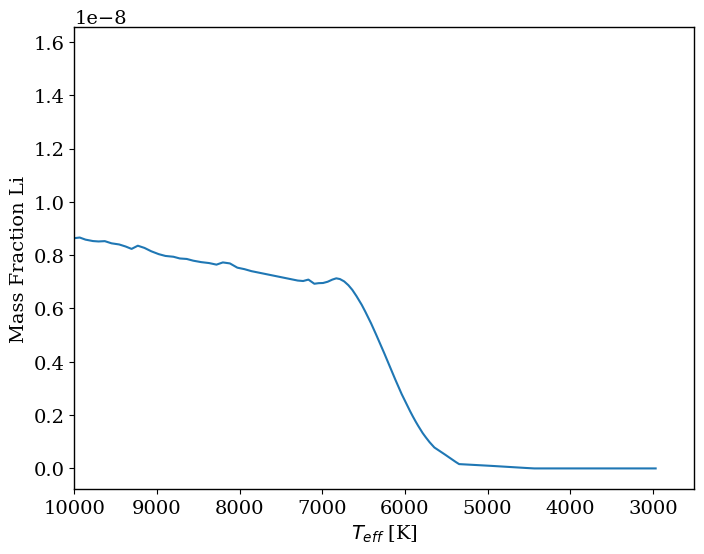

In [41]:
plt.rcParams.update({'font.size': 14})  # Set the font size


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('Mass Fraction Li')
ax.set_xlabel('$T_{eff}$ [K]')

ax.plot(10**MIST_FULL[nearest_age]['log_Teff'], MIST_FULL[nearest_age]['surface_li7'])

ax.set_xlim(2500, 10000)

ax.invert_xaxis()

In [42]:
max(10**MIST_FULL[nearest_age]['log_Teff'])

339646.6795258933

In [43]:
min(10**MIST_FULL[nearest_age]['log_Teff'])

2967.2765754069314

In [44]:
minTeff_array = []

for key in MIST_FULL.keys():
    minTeff = min(10**MIST_FULL[key]['log_Teff'])
    minTeff_array.append(minTeff)
    
min(minTeff_array)

2885.5722587919586

### SPOTS

In [32]:
plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

In [33]:
spots_instance = models.SPOTS(path_all)
SPOTS = spots_instance.SPOTS

In [34]:
SPOTS.keys()

dict_keys(['f017', 'f085', 'f051', 'f034', 'f068', 'f000'])

In [35]:
SPOTS['f000'].keys()

dict_keys([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.013, 0.014, 0.016, 0.018, 0.02, 0.022, 0.025, 0.028, 0.032, 0.035, 0.04, 0.045, 0.05, 0.056, 0.063, 0.071, 0.079, 0.089, 0.1, 0.112, 0.126, 0.141, 0.158, 0.178, 0.2, 0.224, 0.251, 0.282, 0.316, 0.355, 0.398, 0.447, 0.501, 0.562, 0.631, 0.708, 0.794, 0.891, 1.0, 1.122, 1.259, 1.413, 1.585, 1.778, 1.995, 2.239, 2.512, 2.818, 3.162, 3.548, 3.981])

In [36]:
SPOTS['f000'][0.126].columns

Index(['Mass', 'Fspot', 'Xspot', 'log(L/Lsun)', 'log(R/Rsun)', 'log(g)',
       'log(Teff)', 'log(T_hot)', 'log(T_cool)', 'TauCZ', 'Li/Li0', 'B_mag',
       'V_mag', 'Rc_mag', 'Ic_mag', 'J_mag', 'H_mag', 'K_mag', 'W1_mag',
       'G_mag', 'BP_mag', 'RP_mag', 'Age [Gyr]', 'A(Li)', 'M/Ms', 'Teff',
       'Lsun', 'G', 'BP', 'RP'],
      dtype='object')

In [37]:
SPOTS['f085'][0.035]['BP_mag']-SPOTS['f085'][0.035]['RP_mag']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10    2.5453
11    2.4617
12    2.3605
13    2.1510
14    1.8895
15    1.6275
16    1.3964
17    1.2118
18    1.0748
19    0.9690
20    0.9308
21    0.8991
22    0.8394
23    0.7704
24    0.6691
dtype: float64

In [38]:
SPOTS['f085'][0.035]['Li/Li0']

0     0.99994
1     0.99501
2     0.91175
3     0.44079
4     0.01100
5     0.00002
6     0.00020
7     0.00404
8     0.03503
9     0.13395
10    0.29661
11    0.46932
12    0.61882
13    0.72710
14    0.79927
15    0.84324
16    0.87046
17    0.89569
18    0.91984
19    0.94082
20    0.95712
21    0.96947
22    0.97850
23    0.98504
24    0.98964
Name: Li/Li0, dtype: float64

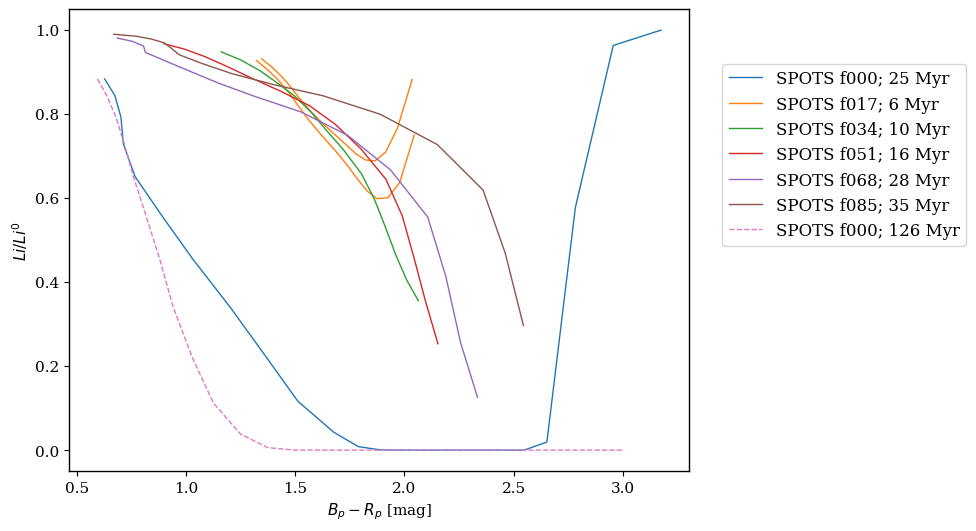

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$Li/Li^0$')
ax.set_xlabel('$B_p-R_p$ [mag]')
ax.plot(SPOTS['f000'][0.025]['BP_mag']-SPOTS['f000'][0.025]['RP_mag'], SPOTS['f000'][0.025]['Li/Li0'], linewidth=1, label='SPOTS f000; 25 Myr')
ax.plot(SPOTS['f017'][0.006]['BP_mag']-SPOTS['f017'][0.006]['RP_mag'], SPOTS['f017'][0.006]['Li/Li0'], linewidth=1, label='SPOTS f017; 6 Myr')
ax.plot(SPOTS['f034'][0.010]['BP_mag']-SPOTS['f034'][0.010]['RP_mag'], SPOTS['f034'][0.010]['Li/Li0'], linewidth=1, label='SPOTS f034; 10 Myr')
ax.plot(SPOTS['f051'][0.016]['BP_mag']-SPOTS['f051'][0.016]['RP_mag'], SPOTS['f051'][0.016]['Li/Li0'], linewidth=1, label='SPOTS f051; 16 Myr')
ax.plot(SPOTS['f068'][0.028]['BP_mag']-SPOTS['f068'][0.028]['RP_mag'], SPOTS['f068'][0.028]['Li/Li0'], linewidth=1, label='SPOTS f068; 28 Myr')
ax.plot(SPOTS['f085'][0.035]['BP_mag']-SPOTS['f085'][0.035]['RP_mag'], SPOTS['f085'][0.035]['Li/Li0'], linewidth=1, label='SPOTS f085; 35 Myr')
ax.plot(SPOTS['f000'][0.126]['BP_mag']-SPOTS['f000'][0.126]['RP_mag'], SPOTS['f000'][0.126]['Li/Li0'], linewidth=1, linestyle='--', label='SPOTS f000; 126 Myr')



#ax.errorbar(data_obs_Pleiades['Teff'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))

/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/biosc_env/lib64/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


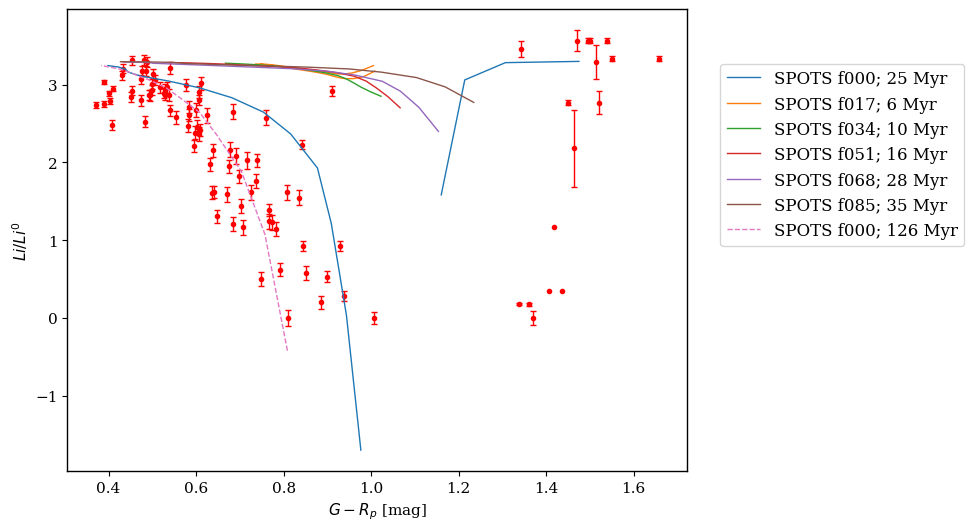

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$Li/Li^0$')
ax.set_xlabel('$G-R_p$ [mag]')
ax.plot(SPOTS['f000'][0.025]['G_mag']-SPOTS['f000'][0.025]['RP_mag'], np.log10(SPOTS['f000'][0.025]['Li/Li0'])+3.3, linewidth=1, label='SPOTS f000; 25 Myr')
ax.plot(SPOTS['f017'][0.006]['G_mag']-SPOTS['f017'][0.006]['RP_mag'], np.log10(SPOTS['f017'][0.006]['Li/Li0'])+3.3, linewidth=1, label='SPOTS f017; 6 Myr')
ax.plot(SPOTS['f034'][0.010]['G_mag']-SPOTS['f034'][0.010]['RP_mag'], np.log10(SPOTS['f034'][0.010]['Li/Li0'])+3.3, linewidth=1, label='SPOTS f034; 10 Myr')
ax.plot(SPOTS['f051'][0.016]['G_mag']-SPOTS['f051'][0.016]['RP_mag'], np.log10(SPOTS['f051'][0.016]['Li/Li0'])+3.3, linewidth=1, label='SPOTS f051; 16 Myr')
ax.plot(SPOTS['f068'][0.028]['G_mag']-SPOTS['f068'][0.028]['RP_mag'], np.log10(SPOTS['f068'][0.028]['Li/Li0'])+3.3, linewidth=1, label='SPOTS f068; 28 Myr')
ax.plot(SPOTS['f085'][0.035]['G_mag']-SPOTS['f085'][0.035]['RP_mag'], np.log10(SPOTS['f085'][0.035]['Li/Li0'])+3.3, linewidth=1, label='SPOTS f085; 35 Myr')
ax.plot(SPOTS['f000'][0.126]['G_mag']-SPOTS['f000'][0.126]['RP_mag'], np.log10(SPOTS['f000'][0.126]['Li/Li0'])+3.3, linewidth=1, linestyle='--', label='SPOTS f000; 126 Myr')



ax.errorbar(data_obs_Pleiades['G_abs']-data_obs_Pleiades['RP_abs'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))

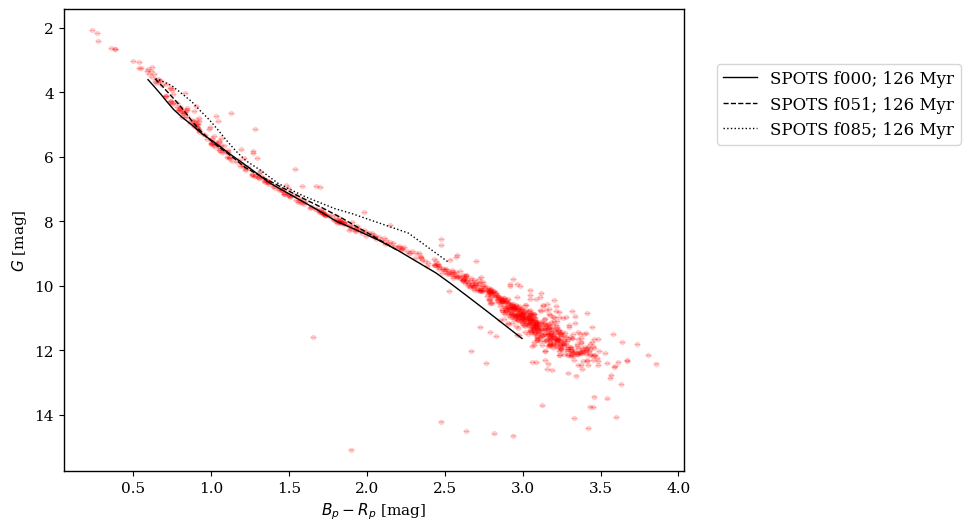

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$G$ [mag]')
ax.set_xlabel('$B_p-R_p$ [mag]')

ax.plot(SPOTS['f000'][0.126]['BP_mag']-SPOTS['f000'][0.126]['RP_mag'], SPOTS['f000'][0.126]['G_mag'], linewidth=1, label='SPOTS f000; 126 Myr', color='k')

ax.plot(SPOTS['f051'][0.126]['BP_mag']-SPOTS['f051'][0.126]['RP_mag'], SPOTS['f051'][0.126]['G_mag'], linewidth=1, linestyle='--', label='SPOTS f051; 126 Myr', color='k')

ax.plot(SPOTS['f085'][0.126]['BP_mag']-SPOTS['f085'][0.126]['RP_mag'], SPOTS['f085'][0.126]['G_mag'], linewidth=1, linestyle=':', label='SPOTS f085; 126 Myr', color='k')


ax.errorbar(data_obs_Pleiades['BP_abs']-data_obs_Pleiades['RP_abs'], data_obs_Pleiades['G_abs'], yerr=data_obs_Pleiades['e_g'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2, alpha=0.125)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))
ax.invert_yaxis()

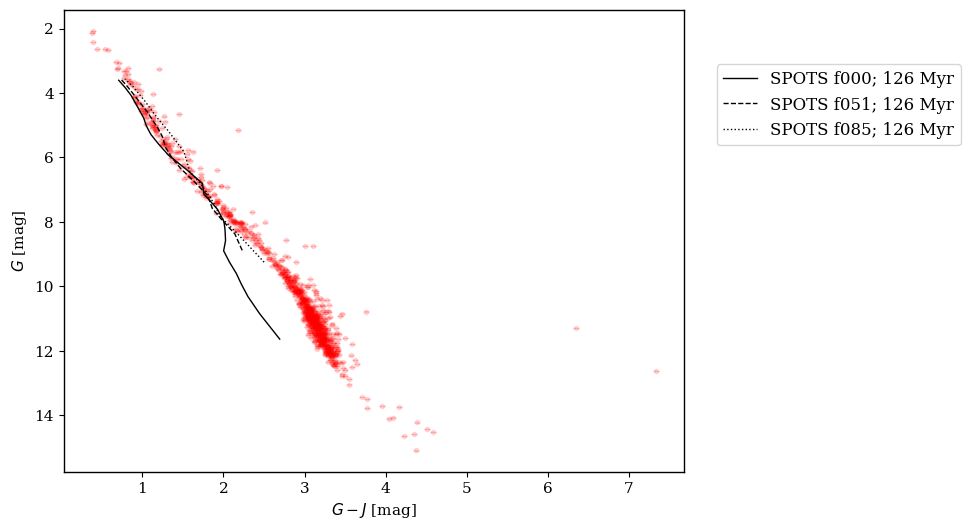

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$G$ [mag]')
ax.set_xlabel('$G-J$ [mag]')

ax.plot(SPOTS['f000'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f000'][0.126]['G_mag'], linewidth=1, label='SPOTS f000; 126 Myr', color='k')

ax.plot(SPOTS['f051'][0.126]['G_mag']-SPOTS['f051'][0.126]['J_mag'], SPOTS['f051'][0.126]['G_mag'], linewidth=1, linestyle='--', label='SPOTS f051; 126 Myr', color='k')

ax.plot(SPOTS['f085'][0.126]['G_mag']-SPOTS['f085'][0.126]['J_mag'], SPOTS['f085'][0.126]['G_mag'], linewidth=1, linestyle=':', label='SPOTS f085; 126 Myr', color='k')


ax.errorbar(data_obs_Pleiades['G_abs']-data_obs_Pleiades['J_abs'], data_obs_Pleiades['G_abs'], yerr=data_obs_Pleiades['e_g'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2, alpha=0.125)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))
ax.invert_yaxis()

In [43]:
Tsun = 5772

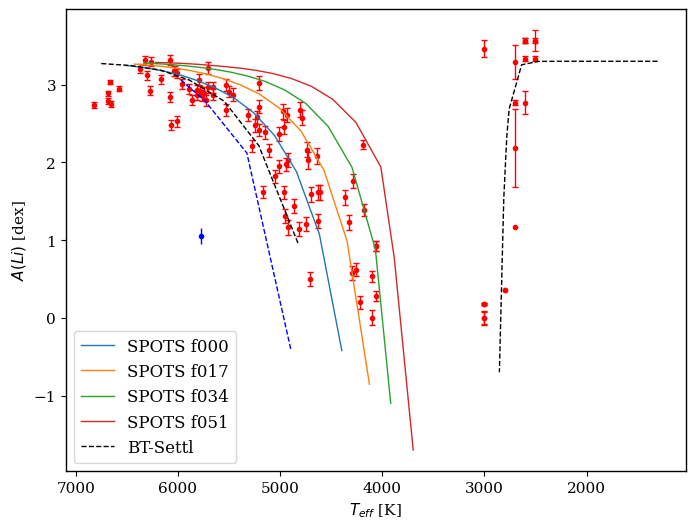

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('$T_{eff}$ [K]')
ax.plot(10**SPOTS['f000'][0.126]['log(Teff)'], SPOTS['f000'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(10**SPOTS['f017'][0.126]['log(Teff)'], SPOTS['f017'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(10**SPOTS['f034'][0.126]['log(Teff)'], SPOTS['f034'][0.126]['A(Li)'], linewidth=1, label='SPOTS f034')
ax.plot(10**SPOTS['f051'][0.126]['log(Teff)'], SPOTS['f051'][0.126]['A(Li)'], linewidth=1, label='SPOTS f051')

ax.errorbar(Tsun, solar_abundance, xerr=0.5, yerr=e_solar_abundance, fmt='.', zorder=2, color='b', elinewidth=1, capsize=0)

ax.plot(BTSettl_Li_isochrones[5]['Teff'], BTSettl_Li_isochrones[5]['A(Li)'], linewidth=1, linestyle='--', color='b')

ax.plot(BTSettl_Li_isochrones[0.120]['Teff'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
ax.errorbar(data_obs_Pleiades['Teff'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12)
ax.invert_xaxis()

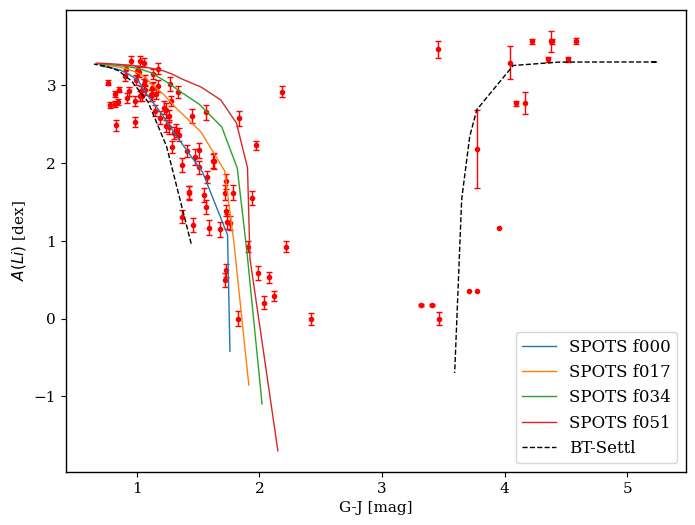

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-J [mag]')
ax.plot(SPOTS['f000'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f000'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(SPOTS['f017'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f017'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(SPOTS['f034'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f034'][0.126]['A(Li)'], linewidth=1, label='SPOTS f034')
ax.plot(SPOTS['f051'][0.126]['G_mag']-SPOTS['f000'][0.126]['J_mag'], SPOTS['f051'][0.126]['A(Li)'], linewidth=1, label='SPOTS f051')



ax.plot(BTSettl_Li_isochrones[0.120]['G_abs']-BTSettl_Li_isochrones[0.120]['J_abs'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
ax.errorbar(data_obs_Pleiades['g']-data_obs_Pleiades['Jmag'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12)

In [46]:
data_obs_Pleiades[(~data_obs_Pleiades['ALi'].isnull()) & (data_obs_Pleiades['ALi'] != 0)]['ALi'].count()

99

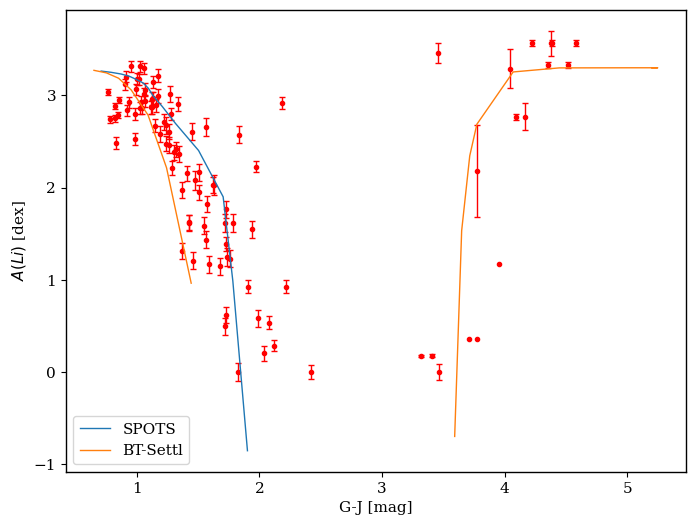

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-J [mag]')
ax.plot(SPOTS['f017'][0.126]['G_mag']-SPOTS['f017'][0.126]['J_mag'], SPOTS['f017'][0.126]['A(Li)'], linewidth=1, label='SPOTS')
ax.plot(BTSettl_Li_isochrones[0.120]['G_abs']-BTSettl_Li_isochrones[0.120]['J_abs'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl')
ax.errorbar(data_obs_Pleiades['g']-data_obs_Pleiades['Jmag'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend()


In [48]:
max(10**SPOTS['f000'][0.126]['log(Teff)'])

6512.426277507005

In [49]:
min(10**SPOTS['f000'][0.126]['log(Teff)'])

2949.742462182295

### BHAC15

In [50]:
file_path = path_all + 'data/BHAC15_iso.GAIA.txt'
BHAC15_dict = models.BHAC15.parse_file(file_path)

csv_file_path = path_all + 'data/BHAC15_iso.GAIA.csv'
models.BHAC15.save_to_csv(BHAC15_dict, file_path)

## Corrected photometry SPOTS models

In [51]:
plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

In [52]:
spots_instance = models.SPOTS_YBC(path_all)
SPOTS_edr3 = spots_instance.SPOTS_edr3
spots_f000_edr3 = spots_instance.spots_f000_edr3

In [53]:
desired_age = 0.120
nearest_age = select_nearest_age(SPOTS_edr3['00'], desired_age)
SPOTS_edr3['00'][nearest_age]

logAge  Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  log(Teff)  \
0      8.1  0.10    0.0    0.8    -2.689492    -0.761060  4.959872   3.469784   
1      8.1  0.15    0.0    0.8    -2.395952    -0.669096  4.952036   3.497187   
2      8.1  0.20    0.0    0.8    -2.201137    -0.599432  4.937648   3.511059   
3      8.1  0.25    0.0    0.8    -2.050513    -0.543744  4.923181   3.520871   
4      8.1  0.30    0.0    0.8    -1.925703    -0.496960  4.908773   3.528682   
5      8.1  0.35    0.0    0.8    -1.810935    -0.454479  4.890757   3.536133   
6      8.1  0.40    0.0    0.8    -1.690418    -0.414652  4.869095   3.546349   
7      8.1  0.45    0.0    0.8    -1.560148    -0.373196  4.837337   3.558189   
8      8.1  0.50    0.0    0.8    -1.414063    -0.329963  4.796627   3.573093   
9      8.1  0.55    0.0    0.8    -1.268473    -0.291167  4.760429   3.590093   
10     8.1  0.60    0.0    0.8    -1.152988    -0.260413  4.736709   3.603587   
11     8.1  0.65    0.0    0.8    -1.012628    -0.226149  4.702943   3.621545   
12     8.1  0.70    0.0    0.8    -0.864977    -0.195221  4.673272   3.642994   
13     8.1  0.75    0.0    0.8    -0.728511    -0.169368  4.651529   3.664184   
14     8.1  0.80    0.0    0.8    -0.597804    -0.145327  4.631475   3.684840   
15     8.1  0.85    0.0    0.8    -0.474711    -0.121780  4.610710   3.703839   
16     8.1  0.90    0.0    0.8    -0.358181    -0.098047  4.588069   3.721106   
17     8.1  0.95    0.0    0.8    -0.246858    -0.073722  4.562899   3.736774   
18     8.1  1.00    0.0    0.8    -0.140140    -0.048660  4.535051   3.750922   
19     8.1  1.05    0.0    0.8    -0.037916    -0.022712  4.504345   3.763504   
20     8.1  1.10    0.0    0.8     0.060162     0.003835  4.471454   3.774750   
21     8.1  1.15    0.0    0.8     0.154305     0.029990  4.438448   3.785208   
22     8.1  1.20    0.0    0.8     0.244443     0.055355  4.406203   3.795061   
23     8.1  1.25    0.0    0.8     0.330458     0.079603  4.375435   3.804440   
24     8.1  1.30    0.0    0.8     0.412322     0.101930  4.347814   3.813743   

    log(T_hot)  log(T_cool)  ...      G-J     G-RP      J-H      H-K  G-H  \
0     3.469784          0.0  ...  3.35304  1.30207  0.59756  0.26728  0.0   
1     3.497187          0.0  ...  2.99943  1.20822  0.60105  0.25040  0.0   
2     3.511059          0.0  ...  2.84699  1.16439  0.60451  0.24098  0.0   
3     3.520871          0.0  ...  2.74490  1.13382  0.60821  0.23494  0.0   
4     3.528682          0.0  ...  2.66759  1.11005  0.61198  0.23084  0.0   
5     3.536133          0.0  ...  2.59808  1.08829  0.61570  0.22728  0.0   
6     3.546349          0.0  ...  2.50653  1.05926  0.62064  0.22274  0.0   
7     3.558189          0.0  ...  2.40336  1.02586  0.62677  0.21722  0.0   
8     3.573093          0.0  ...  2.27286  0.98262  0.63555  0.20717  0.0   
9     3.590093          0.0  ...  2.13329  0.93498  0.64821  0.18849  0.0   
10    3.603587          0.0  ...  2.03715  0.90024  0.65799  0.16852  0.0   
11    3.621545          0.0  ...  1.91598  0.85397  0.66084  0.14166  0.0   
12    3.642994          0.0  ...  1.76134  0.79178  0.64193  0.11210  0.0   
13    3.664184          0.0  ...  1.60323  0.72951  0.58685  0.09376  0.0   
14    3.684840          0.0  ...  1.46156  0.67394  0.51835  0.08276  0.0   
15    3.703839          0.0  ...  1.34257  0.62656  0.46092  0.07325  0.0   
16    3.721106          0.0  ...  1.24022  0.58621  0.41165  0.06548  0.0   
17    3.736774          0.0  ...  1.15234  0.55188  0.36945  0.05927  0.0   
18    3.750922          0.0  ...  1.07435  0.52027  0.33460  0.05284  0.0   
19    3.763504          0.0  ...  1.00962  0.49384  0.30534  0.04858  0.0   
20    3.774750          0.0  ...  0.94841  0.46791  0.27898  0.04458  0.0   
21    3.785208          0.0  ...  0.89284  0.44356  0.25601  0.04084  0.0   
22    3.795061          0.0  ...  0.84260  0.42131  0.23493  0.03804  0.0   
23    3.804440          0.0  ...  0.79458  0.3997

In [54]:
SPOTS_edr3['85'][nearest_age]

logAge  Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  log(Teff)  \
0      8.1  0.10  0.847    0.8    -2.761755    -0.665781  4.769315   3.404079   
1      8.1  0.15  0.847    0.8    -2.497531    -0.574975  4.763794   3.424732   
2      8.1  0.20  0.847    0.8    -2.314691    -0.509727  4.758237   3.437818   
3      8.1  0.25  0.847    0.8    -2.172126    -0.459132  4.753958   3.448162   
4      8.1  0.30  0.847    0.8    -2.049000    -0.416230  4.747312   3.457492   
5      8.1  0.35  0.847    0.8    -1.931932    -0.376595  4.734990   3.466942   
6      8.1  0.40  0.847    0.8    -1.809499    -0.338319  4.716429   3.478412   
7      8.1  0.45  0.847    0.8    -1.671891    -0.297670  4.686284   3.492490   
8      8.1  0.50  0.847    0.8    -1.501147    -0.253464  4.643629   3.513072   
9      8.1  0.55  0.847    0.8    -1.289990    -0.212640  4.603374   3.545450   
10     8.1  0.60  0.847    0.8    -1.103566    -0.197423  4.610728   3.584447   
11     8.1  0.65  0.847    0.8    -1.035662    -0.190024  4.630692   3.597724   
12     8.1  0.70  0.847    0.8    -0.893310    -0.162198  4.607226   3.619399   
13     8.1  0.75  0.847    0.8    -0.749999    -0.133807  4.580406   3.641031   
14     8.1  0.80  0.847    0.8    -0.619289    -0.104438  4.549698   3.659024   
15     8.1  0.85  0.847    0.8    -0.494575    -0.073767  4.514684   3.674867   
16     8.1  0.90  0.847    0.8    -0.375724    -0.041868  4.475710   3.688631   
17     8.1  0.95  0.847    0.8    -0.261217    -0.009255  4.433965   3.700951   
18     8.1  1.00  0.847    0.8    -0.150509     0.023071  4.391589   3.712464   
19     8.1  1.05  0.847    0.8    -0.044366     0.054240  4.350440   3.723416   
20     8.1  1.10  0.847    0.8     0.056709     0.083544  4.312036   3.734032   
21     8.1  1.15  0.847    0.8     0.152666     0.109666  4.279098   3.744961   
22     8.1  1.20  0.847    0.8     0.243698     0.131549  4.253815   3.756777   
23     8.1  1.25  0.847    0.8     0.330066     0.148334  4.237973   3.769977   
24     8.1  1.30  0.847    0.8     0.412044     0.152254  4.247167   3.788511   

    log(T_hot)  log(T_cool)  ...       G-J      G-RP       J-H       H-K  G-H  \
0     3.479336     3.382426  ...  4.107711  1.451015  0.585361  0.295944  0.0   
1     3.499990     3.403080  ...  4.075011  1.437369  0.585551  0.295543  0.0   
2     3.513075     3.416165  ...  4.010649  1.421087  0.586131  0.294935  0.0   
3     3.523419     3.426509  ...  3.872527  1.393568  0.587446  0.293379  0.0   
4     3.532750     3.435840  ...  3.733294  1.366071  0.588768  0.290341  0.0   
5     3.542199     3.445289  ...  3.600167  1.338875  0.589996  0.286253  0.0   
6     3.553670     3.456760  ...  3.439087  1.303660  0.591724  0.280542  0.0   
7     3.567747     3.470837  ...  3.254961  1.260181  0.594213  0.271423  0.0   
8     3.588330     3.491420  ...  2.995661  1.192625  0.601096  0.255155  0.0   
9     3.620707     3.523797  ...  2.677116  1.102191  0.622722  0.229291  0.0   
10    3.659705     3.562795  ...  2.323397  0.990639  0.643738  0.207503  0.0   
11    3.672981     3.576071  ...  2.206161  0.951923  0.648395  0.196717  0.0   
12    3.694656     3.597746  ...  2.039102  0.893324  0.663340  0.168677  0.0   
13    3.716288     3.619378  ...  1.891602  0.837590  0.663877  0.137911  0.0   
14    3.734282     3.637372  ...  1.761485  0.785528  0.648344  0.113136  0.0   
15    3.750125     3.653215  ...  1.643328  0.739492  0.612932  0.098517  0.0   
16    3.763888     3.666978  ...  1.544597  0.701406  0.568451  0.089794  0.0   
17    3.776208     3.679298  ...  1.460212  0.668364  0.525453  0.083907  0.0   
18    3.787722     3.690812  ...  1.388522  0.639261  0.491256  0.077892  0.0   
19    3.798673     3.701763  ...  1.321207  0.612244  0.458590  0.072423  0.0   
20    3.809290     3.712380  ...  1.258516  0.587548  0.427405  0.068161  0.0   
21    3.820219     3.723309  ...  1.196089  0.563002  0.397408  0.063248  0.0   
22    3.832035     3.735125  ...  

In [55]:
SPOTS_edr3['34'][nearest_age]

logAge  Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  log(Teff)  \
0      8.1  0.10  0.339    0.8    -2.712418    -0.730690  4.899133   3.448868   
1      8.1  0.15  0.339    0.8    -2.429194    -0.639035  4.891914   3.473846   
2      8.1  0.20  0.339    0.8    -2.239438    -0.570778  4.880339   3.487157   
3      8.1  0.25  0.339    0.8    -2.093052    -0.516734  4.869161   3.496731   
4      8.1  0.30  0.339    0.8    -1.970007    -0.470971  4.856795   3.504611   
5      8.1  0.35  0.339    0.8    -1.855306    -0.429144  4.840087   3.512373   
6      8.1  0.40  0.339    0.8    -1.732767    -0.389883  4.819557   3.523377   
7      8.1  0.45  0.339    0.8    -1.598062    -0.348402  4.787747   3.536313   
8      8.1  0.50  0.339    0.8    -1.440761    -0.304085  4.744871   3.553480   
9      8.1  0.55  0.339    0.8    -1.270122    -0.264206  4.706506   3.576200   
10     8.1  0.60  0.339    0.8    -1.153239    -0.239203  4.694288   3.592919   
11     8.1  0.65  0.339    0.8    -1.031144    -0.210744  4.672133   3.609213   
12     8.1  0.70  0.339    0.8    -0.876848    -0.181250  4.645329   3.633040   
13     8.1  0.75  0.339    0.8    -0.736951    -0.157424  4.627641   3.656102   
14     8.1  0.80  0.339    0.8    -0.605662    -0.132469  4.605759   3.676446   
15     8.1  0.85  0.339    0.8    -0.481992    -0.107274  4.581698   3.694766   
16     8.1  0.90  0.339    0.8    -0.364868    -0.081453  4.554880   3.711137   
17     8.1  0.95  0.339    0.8    -0.252749    -0.054619  4.524694   3.725750   
18     8.1  1.00  0.339    0.8    -0.144951    -0.026781  4.491293   3.738780   
19     8.1  1.05  0.339    0.8    -0.041363     0.001673  4.455574   3.750450   
20     8.1  1.10  0.339    0.8     0.058102     0.029655  4.419813   3.761325   
21     8.1  1.15  0.339    0.8     0.153256     0.056658  4.385114   3.771612   
22     8.1  1.20  0.339    0.8     0.243977     0.082324  4.352265   3.781460   
23     8.1  1.25  0.339    0.8     0.330256     0.105689  4.323264   3.791347   
24     8.1  1.30  0.339    0.8     0.412254     0.125899  4.299877   3.801741   

    log(T_hot)  log(T_cool)  ...       G-J      G-RP       J-H       H-K  G-H  \
0     3.473095     3.376185  ...  3.742510  1.367287  0.592289  0.279062  0.0   
1     3.498074     3.401164  ...  3.552493  1.303907  0.593885  0.273108  0.0   
2     3.511384     3.414474  ...  3.449597  1.270577  0.595468  0.270133  0.0   
3     3.520959     3.424049  ...  3.346588  1.245101  0.597407  0.268085  0.0   
4     3.528839     3.431929  ...  3.251364  1.223920  0.599437  0.266240  0.0   
5     3.536600     3.439690  ...  3.164504  1.204025  0.601326  0.263619  0.0   
6     3.547604     3.450694  ...  3.043895  1.175900  0.604096  0.259253  0.0   
7     3.560540     3.463630  ...  2.903786  1.141178  0.607729  0.253016  0.0   
8     3.577707     3.480797  ...  2.725873  1.093817  0.613757  0.240962  0.0   
9     3.600427     3.503517  ...  2.512445  1.032694  0.626376  0.218399  0.0   
10    3.617146     3.520236  ...  2.374117  0.990087  0.633704  0.201647  0.0   
11    3.633441     3.536531  ...  2.241838  0.946093  0.637087  0.188190  0.0   
12    3.657268     3.560358  ...  2.047628  0.878765  0.628806  0.172535  0.0   
13    3.680329     3.583419  ...  1.868222  0.815837  0.611799  0.155998  0.0   
14    3.700674     3.603764  ...  1.731855  0.765344  0.601383  0.134222  0.0   
15    3.718994     3.622084  ...  1.618071  0.721858  0.583690  0.114929  0.0   
16    3.735364     3.638454  ...  1.514684  0.681663  0.561779  0.097240  0.0   
17    3.749977     3.653067  ...  1.421049  0.645613  0.528213  0.086146  0.0   
18    3.763008     3.666098  ...  1.341370  0.615109  0.490456  0.078869  0.0   
19    3.774677     3.677767  ...  1.270744  0.587172  0.454556  0.073601  0.0   
20    3.785553     3.688643  ...  1.208803  0.561706  0.424804  0.068538  0.0   
21    3.795840     3.698930  ...  1.151474  0.538113  0.397171  0.063878  0.0   
22    3.805687     3.708777  ...  

In [56]:
spots_f000_edr3.columns

Index(['logAge', 'Mass', 'Fspot', 'Xspot', 'log(L/Lsun)', 'log(R/Rsun)',
       'log(g)', 'log(Teff)', 'log(T_hot)', 'log(T_cool)', 'TauCZ', 'Li/Li0',
       'B_mag', 'V_mag', 'Rc_mag', 'Ic_mag', 'J_mag', 'H_mag', 'K_mag',
       'W1_mag', 'G_mag', 'BP_mag', 'RP_mag', 'Thot', 'Tcool', 'Label_0',
       'J_hot', 'H_hot', 'Ks_hot', 'Label_1', 'J_cool', 'H_cool', 'Ks_cool',
       'Label_2', 'G_hot', 'G_BP_hot', 'G_RP_hot', 'Label_3', 'G_cool',
       'G_BP_cool', 'G_RP_cool'],
      dtype='object')

In [57]:
#for age in SPOTS_edr3['00'].keys():
#    print(age)
#    print(min(SPOTS_edr3['00'][age]['Teff']))

In [58]:
for f in SPOTS_edr3.keys():
    print(f)

00
17
34
51
68
85


In [59]:
SPOTS_edr3['00'].keys()

dict_keys([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.013, 0.014, 0.016, 0.018, 0.02, 0.022, 0.025, 0.028, 0.032, 0.035, 0.04, 0.045, 0.05, 0.056, 0.063, 0.071, 0.079, 0.089, 0.1, 0.112, 0.126, 0.141, 0.158, 0.178, 0.2, 0.224, 0.251, 0.282, 0.316, 0.355, 0.398, 0.447, 0.501, 0.562, 0.631, 0.708, 0.794, 0.891, 1.0, 1.122, 1.259, 1.413, 1.585, 1.778, 1.995, 2.239, 2.512, 2.818, 3.162, 3.548, 3.981])

In [60]:
SPOTS_edr3['00'][nearest_age].columns

Index(['logAge', 'Mass', 'Fspot', 'Xspot', 'log(L/Lsun)', 'log(R/Rsun)',
       'log(g)', 'log(Teff)', 'log(T_hot)', 'log(T_cool)', 'TauCZ', 'Li/Li0',
       'B_mag', 'V_mag', 'Rc_mag', 'Ic_mag', 'J_mag', 'H_mag', 'K_mag',
       'W1_mag', 'G_mag', 'BP_mag', 'RP_mag', 'Thot', 'Tcool', 'Label_0',
       'J_hot', 'H_hot', 'Ks_hot', 'Label_1', 'J_cool', 'H_cool', 'Ks_cool',
       'Label_2', 'G_hot', 'G_BP_hot', 'G_RP_hot', 'Label_3', 'G_cool',
       'G_BP_cool', 'G_RP_cool', 'Age_Gyr', 'BP_abs', 'RP_abs', 'G_abs',
       'J_abs', 'H_abs', 'K_abs', 'M/Ms', 'BP-RP', 'G-J', 'G-RP', 'J-H', 'H-K',
       'G-H', 'G-K', 'G-V', 'A(Li)', 'Lsun', 'Teff'],
      dtype='object')

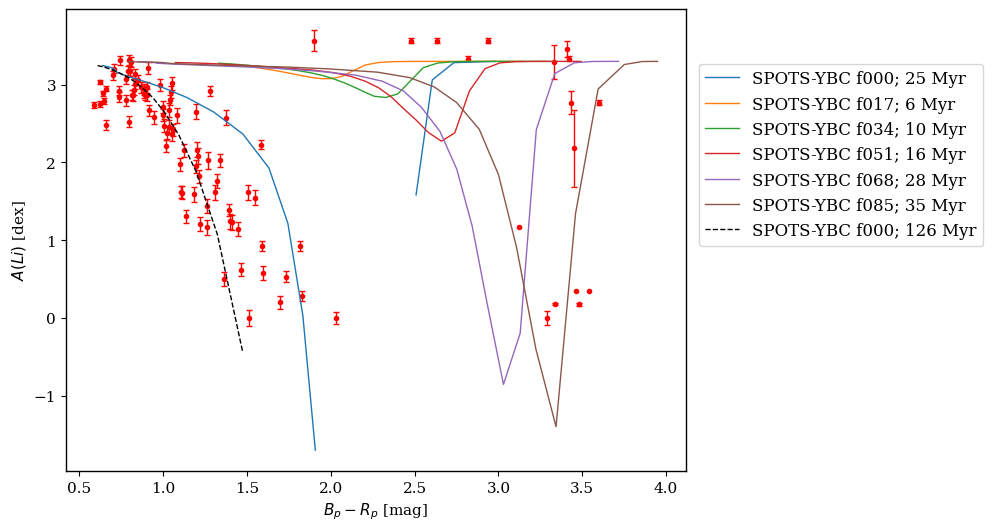

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('$B_p-R_p$ [mag]')
ax.plot(SPOTS_edr3['00'][0.025]['BP-RP'], SPOTS_edr3['00'][0.025]['A(Li)'], linewidth=1, label='SPOTS-YBC f000; 25 Myr')
ax.plot(SPOTS_edr3['17'][0.006]['BP-RP'], SPOTS_edr3['17'][0.006]['A(Li)'], linewidth=1, label='SPOTS-YBC f017; 6 Myr')
ax.plot(SPOTS_edr3['34'][0.010]['BP-RP'], SPOTS_edr3['34'][0.010]['A(Li)'], linewidth=1, label='SPOTS-YBC f034; 10 Myr')
ax.plot(SPOTS_edr3['51'][0.016]['BP-RP'], SPOTS_edr3['51'][0.016]['A(Li)'], linewidth=1, label='SPOTS-YBC f051; 16 Myr')
ax.plot(SPOTS_edr3['68'][0.028]['BP-RP'], SPOTS_edr3['68'][0.028]['A(Li)'], linewidth=1, label='SPOTS-YBC f068; 28 Myr')
ax.plot(SPOTS_edr3['85'][0.035]['BP-RP'], SPOTS_edr3['85'][0.035]['A(Li)'], linewidth=1, label='SPOTS-YBC f085; 35 Myr')
ax.plot(SPOTS_edr3['00'][0.126]['BP-RP'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, color = 'k', linestyle='--', label='SPOTS-YBC f000; 126 Myr')



ax.errorbar(data_obs_Pleiades['bp']-data_obs_Pleiades['rp'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))

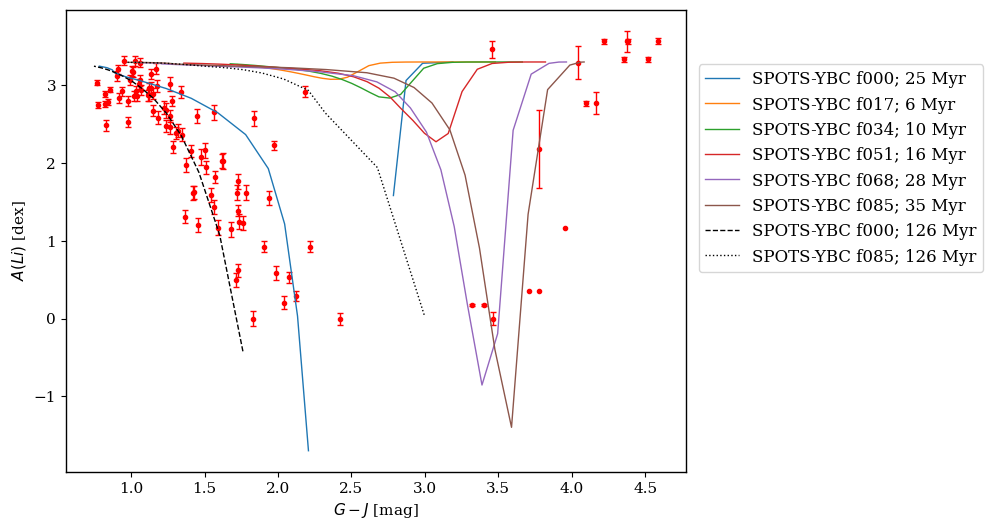

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('$G-J$ [mag]')
ax.plot(SPOTS_edr3['00'][0.025]['G-J'], SPOTS_edr3['00'][0.025]['A(Li)'], linewidth=1, label='SPOTS-YBC f000; 25 Myr')
ax.plot(SPOTS_edr3['17'][0.006]['G-J'], SPOTS_edr3['17'][0.006]['A(Li)'], linewidth=1, label='SPOTS-YBC f017; 6 Myr')
ax.plot(SPOTS_edr3['34'][0.010]['G-J'], SPOTS_edr3['34'][0.010]['A(Li)'], linewidth=1, label='SPOTS-YBC f034; 10 Myr')
ax.plot(SPOTS_edr3['51'][0.016]['G-J'], SPOTS_edr3['51'][0.016]['A(Li)'], linewidth=1, label='SPOTS-YBC f051; 16 Myr')
ax.plot(SPOTS_edr3['68'][0.028]['G-J'], SPOTS_edr3['68'][0.028]['A(Li)'], linewidth=1, label='SPOTS-YBC f068; 28 Myr')
ax.plot(SPOTS_edr3['85'][0.035]['G-J'], SPOTS_edr3['85'][0.035]['A(Li)'], linewidth=1, label='SPOTS-YBC f085; 35 Myr')
ax.plot(SPOTS_edr3['00'][0.126]['G-J'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, color = 'k', linestyle='--', label='SPOTS-YBC f000; 126 Myr')
ax.plot(SPOTS_edr3['85'][0.126]['G-J'], SPOTS_edr3['85'][0.126]['A(Li)'], linewidth=1, color = 'k', linestyle=':', label='SPOTS-YBC f085; 126 Myr')



ax.errorbar(data_obs_Pleiades['g']-data_obs_Pleiades['Jmag'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))

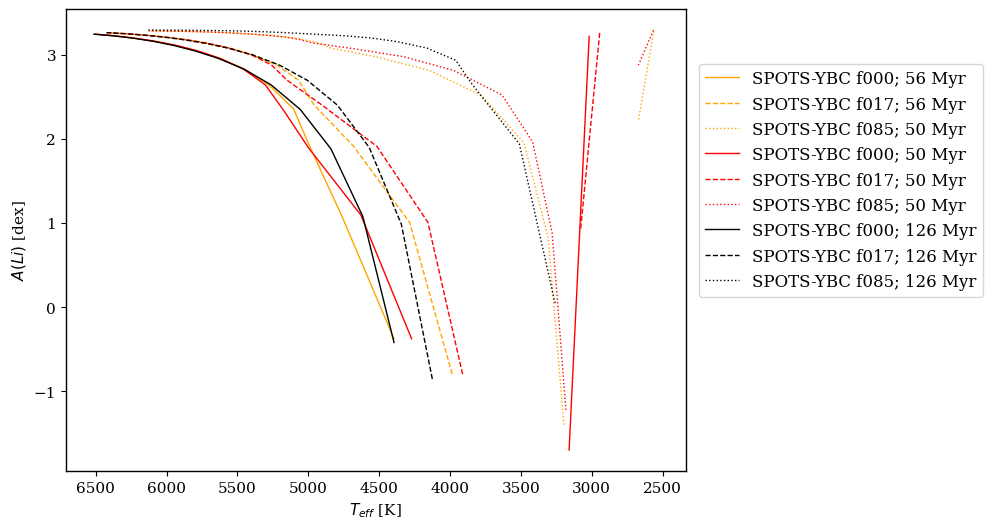

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('$T_{eff}$ [K]')
ax.plot(SPOTS_edr3['00'][0.056]['Teff'], SPOTS_edr3['00'][0.056]['A(Li)'], linewidth=1, color='orange',  label='SPOTS-YBC f000; 56 Myr')
ax.plot(SPOTS_edr3['17'][0.056]['Teff'], SPOTS_edr3['17'][0.056]['A(Li)'], linewidth=1, linestyle='--', color='orange', label='SPOTS-YBC f017; 56 Myr')
ax.plot(SPOTS_edr3['85'][0.056]['Teff'], SPOTS_edr3['51'][0.056]['A(Li)'], linewidth=1, linestyle=':', color='orange', label='SPOTS-YBC f085; 50 Myr')
ax.plot(SPOTS_edr3['00'][0.05]['Teff'], SPOTS_edr3['00'][0.05]['A(Li)'], linewidth=1, color='r', label='SPOTS-YBC f000; 50 Myr')
ax.plot(SPOTS_edr3['17'][0.05]['Teff'], SPOTS_edr3['17'][0.05]['A(Li)'], linewidth=1, linestyle='--', color='r', label='SPOTS-YBC f017; 50 Myr')
ax.plot(SPOTS_edr3['85'][0.05]['Teff'], SPOTS_edr3['51'][0.05]['A(Li)'], linewidth=1, linestyle=':', color='r', label='SPOTS-YBC f085; 50 Myr')
ax.plot(SPOTS_edr3['00'][0.126]['Teff'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, color = 'k', label='SPOTS-YBC f000; 126 Myr')
ax.plot(SPOTS_edr3['17'][0.126]['Teff'], SPOTS_edr3['17'][0.126]['A(Li)'], linewidth=1, color = 'k', linestyle='--', label='SPOTS-YBC f017; 126 Myr')
ax.plot(SPOTS_edr3['85'][0.126]['Teff'], SPOTS_edr3['85'][0.126]['A(Li)'], linewidth=1, color = 'k', linestyle=':', label='SPOTS-YBC f085; 126 Myr')



ax.invert_xaxis()

#ax.errorbar(data_obs_Pleiades['Teff'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))

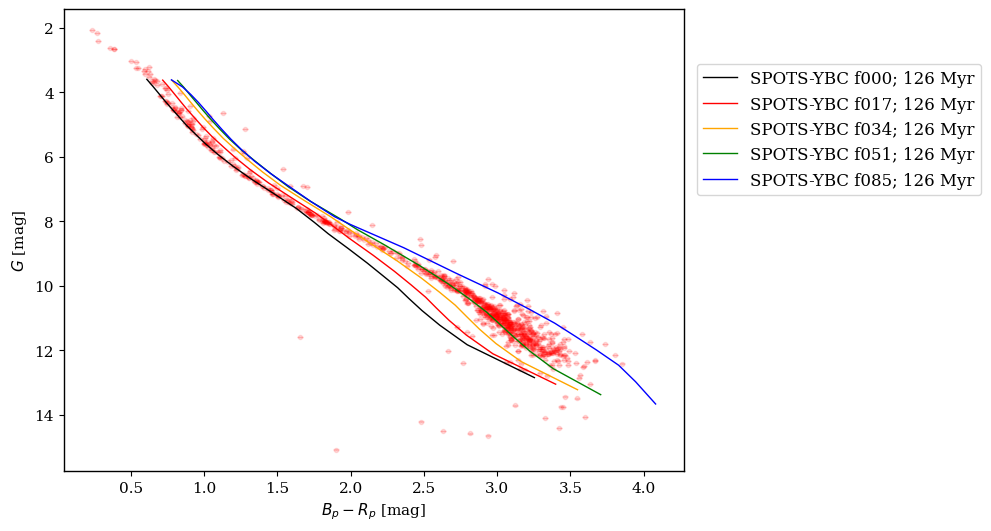

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$G$ [mag]')
ax.set_xlabel('$B_p-R_p$ [mag]')

ax.plot(SPOTS_edr3['00'][0.126]['BP_abs']-SPOTS_edr3['00'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f000; 126 Myr', color='k')

ax.plot(SPOTS_edr3['17'][0.126]['BP_abs']-SPOTS_edr3['17'][0.126]['RP_abs'], SPOTS_edr3['17'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f017; 126 Myr', color='r')

ax.plot(SPOTS_edr3['34'][0.126]['BP_abs']-SPOTS_edr3['34'][0.126]['RP_abs'], SPOTS_edr3['34'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f034; 126 Myr', color='orange')

ax.plot(SPOTS_edr3['51'][0.126]['BP_abs']-SPOTS_edr3['51'][0.126]['RP_abs'], SPOTS_edr3['51'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f051; 126 Myr', color='green')

ax.plot(SPOTS_edr3['85'][0.126]['BP_abs']-SPOTS_edr3['85'][0.126]['RP_abs'], SPOTS_edr3['85'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f085; 126 Myr', color='blue')


ax.errorbar(data_obs_Pleiades['BP_abs']-data_obs_Pleiades['RP_abs'], data_obs_Pleiades['G_abs'], yerr=data_obs_Pleiades['e_g'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2, alpha=0.125)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))
ax.invert_yaxis()

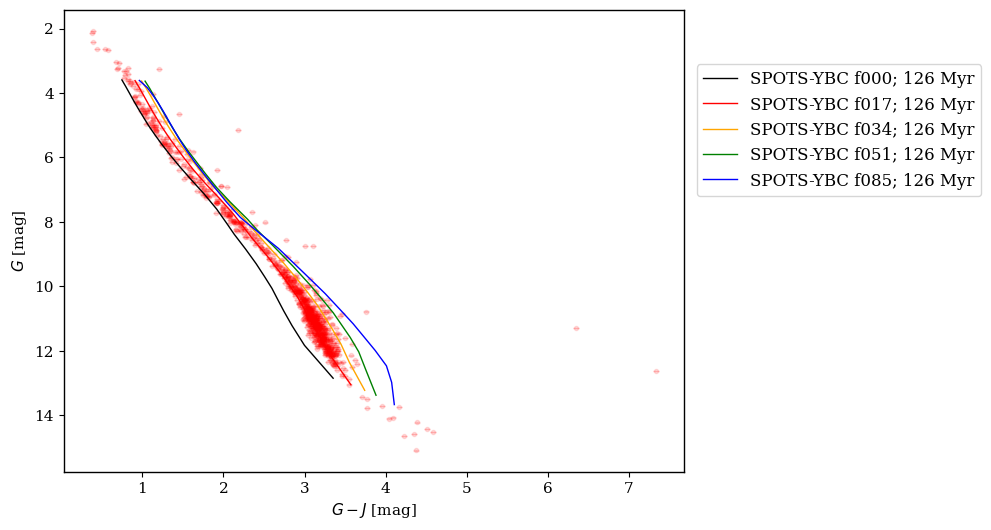

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$G$ [mag]')
ax.set_xlabel('$G-J$ [mag]')

ax.plot(SPOTS_edr3['00'][0.126]['G_abs']-SPOTS_edr3['00'][0.126]['J_abs'], SPOTS_edr3['00'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f000; 126 Myr', color='k')

ax.plot(SPOTS_edr3['17'][0.126]['G_abs']-SPOTS_edr3['17'][0.126]['J_abs'], SPOTS_edr3['17'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f017; 126 Myr', color='r')

ax.plot(SPOTS_edr3['34'][0.126]['G_abs']-SPOTS_edr3['34'][0.126]['J_abs'], SPOTS_edr3['34'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f034; 126 Myr', color='orange')

ax.plot(SPOTS_edr3['51'][0.126]['G_abs']-SPOTS_edr3['51'][0.126]['J_abs'], SPOTS_edr3['51'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f051; 126 Myr', color='green')

ax.plot(SPOTS_edr3['85'][0.126]['G_abs']-SPOTS_edr3['85'][0.126]['J_abs'], SPOTS_edr3['85'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f085; 126 Myr', color='blue')


ax.errorbar(data_obs_Pleiades['G_abs']-data_obs_Pleiades['J_abs'], data_obs_Pleiades['G_abs'], yerr=data_obs_Pleiades['e_g'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2, alpha=0.125)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))
ax.invert_yaxis()

(0.0, 1.5)

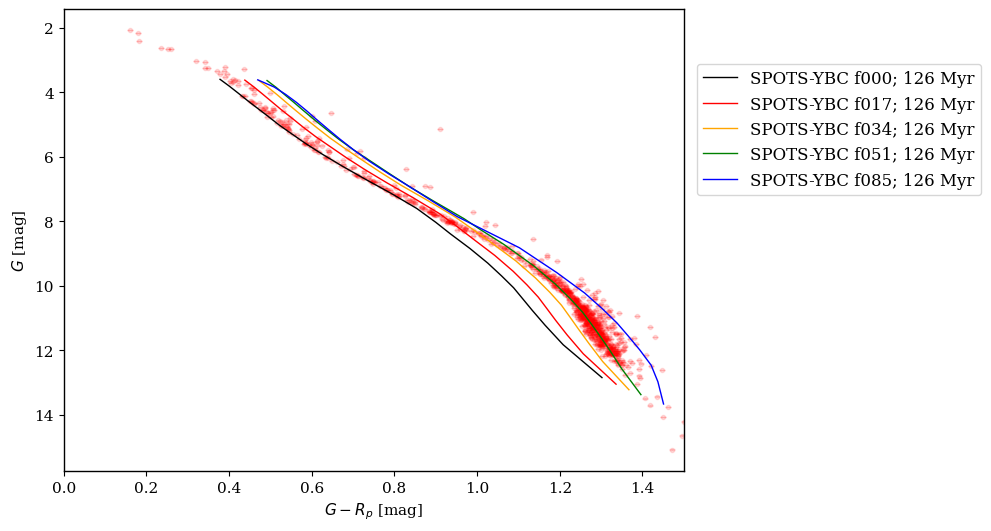

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$G$ [mag]')
ax.set_xlabel('$G-R_p$ [mag]')

ax.plot(SPOTS_edr3['00'][0.126]['G_abs']-SPOTS_edr3['00'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f000; 126 Myr', color='k')

ax.plot(SPOTS_edr3['17'][0.126]['G_abs']-SPOTS_edr3['17'][0.126]['RP_abs'], SPOTS_edr3['17'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f017; 126 Myr', color='r')

ax.plot(SPOTS_edr3['34'][0.126]['G_abs']-SPOTS_edr3['34'][0.126]['RP_abs'], SPOTS_edr3['34'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f034; 126 Myr', color='orange')

ax.plot(SPOTS_edr3['51'][0.126]['G_abs']-SPOTS_edr3['51'][0.126]['RP_abs'], SPOTS_edr3['51'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f051; 126 Myr', color='green')

ax.plot(SPOTS_edr3['85'][0.126]['G_abs']-SPOTS_edr3['85'][0.126]['RP_abs'], SPOTS_edr3['85'][0.126]['G_abs'], linewidth=1, label='SPOTS-YBC f085; 126 Myr', color='blue')


ax.errorbar(data_obs_Pleiades['G_abs']-data_obs_Pleiades['RP_abs'], data_obs_Pleiades['G_abs'], yerr=data_obs_Pleiades['e_g'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2, alpha=0.125)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))
ax.invert_yaxis()

ax.set_xlim(0, 1.5)

In [67]:
SPOTS_edr3['00'][0.126]['Teff']

0     2949.742462
1     3141.861887
2     3243.838470
3     3317.959343
4     3378.171160
5     3436.631053
6     3518.427448
7     3615.667953
8     3741.906660
9     3891.281506
10    4014.089117
11    4183.549674
12    4395.352697
13    4615.127249
14    4839.938464
15    5056.377615
16    5261.455359
17    5454.735418
18    5635.369148
19    5801.018360
20    5953.197490
21    6098.292624
22    6238.221627
23    6374.414055
24    6512.426278
Name: Teff, dtype: float64

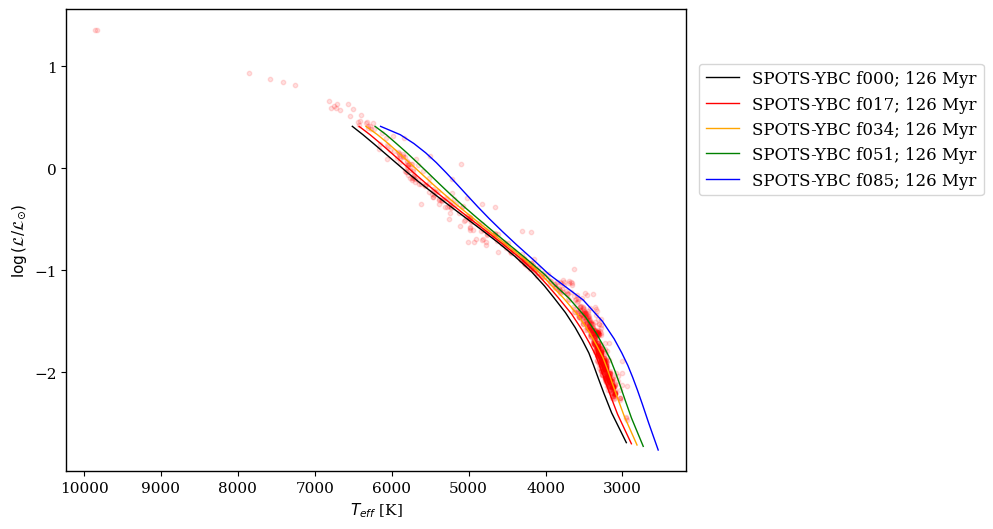

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$\log{(\mathcal{L}/\mathcal{L}_{\odot})}$')
ax.set_xlabel('$T_{eff}$ [K]')

ax.plot(SPOTS_edr3['00'][0.126]['Teff'], SPOTS_edr3['00'][0.126]['log(L/Lsun)'], linewidth=1, label='SPOTS-YBC f000; 126 Myr', color='k')

ax.plot(SPOTS_edr3['17'][0.126]['Teff'], SPOTS_edr3['17'][0.126]['log(L/Lsun)'], linewidth=1, label='SPOTS-YBC f017; 126 Myr', color='r')

ax.plot(SPOTS_edr3['34'][0.126]['Teff'], SPOTS_edr3['34'][0.126]['log(L/Lsun)'], linewidth=1, label='SPOTS-YBC f034; 126 Myr', color='orange')

ax.plot(SPOTS_edr3['51'][0.126]['Teff'], SPOTS_edr3['51'][0.126]['log(L/Lsun)'], linewidth=1, label='SPOTS-YBC f051; 126 Myr', color='green')

ax.plot(SPOTS_edr3['85'][0.126]['Teff'], SPOTS_edr3['85'][0.126]['log(L/Lsun)'], linewidth=1, label='SPOTS-YBC f085; 126 Myr', color='blue')


ax.scatter(data_obs_Pleiades['Teff_x'], data_obs_Pleiades['log(L/Lsun)'], zorder=0, color='r', s=10, alpha=0.125)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.25, 0.9))
ax.invert_xaxis()


## SPOTS analysis

### OPTION 1

In [69]:
from models_test import PlotAnalyzer

In [70]:
BTSettl_Li_isochrones_Teff.columns

Index(['age_Gyr', 't(Gyr)', 'M/Ms', 'Teff', 'log(L/Lsun)', 'lg(g)', 'R(Gcm)',
       'D', 'Li', 'G_abs', 'BP_abs', 'RP_abs', 'J_abs', 'H_abs', 'K_abs',
       'g_abs', 'r_abs', 'i_abs', 'y_abs', 'z_abs', 'A(Li)', 'Lsun'],
      dtype='object')

In [ ]:
plot_analyzer = PlotAnalyzer(path_all)

SPOTS = plot_analyzer.SPOTS_edr3
data_obs = data_obs_Pleiades
band_1 = 'BP_abs'
band_2 = 'RP_abs'
band_y = 'G_abs'
age_iso = 0.120
max_mag = 3.5

intervals, interval_x, x, y, e_x, e_y = plot_analyzer.plot_process_CMD(SPOTS, data_obs, band_1, band_2, band_y, age_iso, max_mag)

SPOTS_iso = plot_analyzer.plot_result(interval_x, x, y, e_x, e_y, SPOTS, band_1, band_2, band_y, data_obs, age_iso, max_mag, l=2, BTSettl=True)

In [ ]:
plot_analyzer = PlotAnalyzer(path_all)

SPOTS = plot_analyzer.SPOTS_edr3
data_obs = data_obs_Pleiades
band_1 = 'G_abs'
band_2 = 'J_abs'
band_y = 'G_abs'
age_iso = 0.120
max_mag = 3.5

intervals_J, interval_x_J, x_J, y_J, e_x_J, e_y_J = plot_analyzer.plot_process_CMD(SPOTS, data_obs, band_1, band_2, band_y, age_iso, max_mag)

SPOTS_iso_J = plot_analyzer.plot_result(interval_x_J, x_J, y_J, e_x_J, e_y_J, SPOTS, band_1, band_2, band_y, data_obs, age_iso, max_mag, l=2, BTSettl=True)

In [ ]:
plot_analyzer = PlotAnalyzer(path_all)

SPOTS = plot_analyzer.SPOTS_edr3
data_obs = data_obs_Pleiades
band_1 = 'G_abs'
band_2 = 'RP_abs'
band_y = 'G_abs'
age_iso = 0.120
max_mag = 1.4

intervals_R, interval_x_R, x_R, y_R, e_x_R, e_y_R = plot_analyzer.plot_process_CMD(SPOTS, data_obs, band_1, band_2, band_y, age_iso, max_mag)

SPOTS_iso_R = plot_analyzer.plot_result(interval_x_R, x_R, y_R, e_x_R, e_y_R, SPOTS, band_1, band_2, band_y, data_obs, age_iso, max_mag, l=2, BTSettl=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.set_ylabel('$G$ [mag]')
ax1.set_xlabel('$G-J$ [mag]')

ax1.plot(SPOTS_edr3['00'][0.126]['G-J'], SPOTS_edr3['00'][0.126]['G_abs'], label='SPOTS-YBC f000; 126 Myr', color='k', linewidth=1, linestyle='--')

ax1.plot(SPOTS_edr3['17'][0.126]['G-J'], SPOTS_edr3['17'][0.126]['G_abs'], label='SPOTS-YBC f017; 126 Myr', color='r', linewidth=1, linestyle='--')

ax1.plot(SPOTS_edr3['34'][0.126]['G-J'], SPOTS_edr3['34'][0.126]['G_abs'], label='SPOTS-YBC f034; 126 Myr', color='orange', linewidth=1, linestyle='--')

ax1.plot(SPOTS_edr3['51'][0.126]['G-J'], SPOTS_edr3['51'][0.126]['G_abs'], label='SPOTS-YBC f051; 126 Myr', color='green', linewidth=1, linestyle='--')

ax1.plot(SPOTS_edr3['51'][0.126]['G-J'], SPOTS_edr3['51'][0.126]['G_abs'], label='SPOTS-YBC f051; 126 Myr', color='blue', linewidth=1, linestyle='--')

ax1.plot(SPOTS_edr3['85'][0.126]['G-J'], SPOTS_edr3['85'][0.126]['G_abs'], label='SPOTS-YBC f085; 126 Myr', color='magenta', linewidth=1, linestyle='--')


ax1.errorbar(data_obs_Pleiades['G_abs']-data_obs_Pleiades['J_abs'], data_obs_Pleiades['G_abs'], yerr=data_obs_Pleiades['e_g'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2, alpha=0.125)

ax1.plot(SPOTS_iso_J[0.126]['G_abs']-SPOTS_iso_J[0.126]['J_abs'], SPOTS_iso_J[0.126]['G_abs'], linewidth=1, linestyle='-', color='r', label='Mixture Isochrone G-J', zorder=5)
ax1.plot(SPOTS_iso_R[0.126]['G_abs']-SPOTS_iso_R[0.126]['J_abs'], SPOTS_iso_R[0.126]['G_abs'], linewidth=1, linestyle='-', color='b', label='Mixture Isochrone BP-RP', zorder=5)



ax1.invert_yaxis()

ax2.set_ylabel('$G$ [mag]')
ax2.set_xlabel('$B_p-R_p$ [mag]')

ax2.plot(SPOTS_edr3['00'][0.126]['BP-RP'], SPOTS_edr3['00'][0.126]['G_abs'], color='k', linewidth=1, linestyle='--')

ax2.plot(SPOTS_edr3['17'][0.126]['BP-RP'], SPOTS_edr3['17'][0.126]['G_abs'], color='r', linewidth=1, linestyle='--')

ax2.plot(SPOTS_edr3['34'][0.126]['BP-RP'], SPOTS_edr3['34'][0.126]['G_abs'], color='orange', linewidth=1, linestyle='--')

ax2.plot(SPOTS_edr3['51'][0.126]['BP-RP'], SPOTS_edr3['51'][0.126]['G_abs'], color='green', linewidth=1, linestyle='--')

ax2.plot(SPOTS_edr3['51'][0.126]['BP-RP'], SPOTS_edr3['51'][0.126]['G_abs'], color='blue', linewidth=1, linestyle='--')

ax2.plot(SPOTS_edr3['85'][0.126]['BP-RP'], SPOTS_edr3['85'][0.126]['G_abs'], color='magenta', linewidth=1, linestyle='--')


ax2.errorbar(data_obs_Pleiades['BP_abs']-data_obs_Pleiades['RP_abs'], data_obs_Pleiades['G_abs'], yerr=data_obs_Pleiades['e_g'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2, alpha=0.125)

ax2.plot(SPOTS_iso[0.126]['BP_abs']-SPOTS_iso[0.126]['RP_abs'], SPOTS_iso[0.126]['G_abs'], linewidth=1, linestyle='-', color='b', label='Mixture Isochrone BP-RP', zorder=5)
ax2.plot(SPOTS_iso_R[0.126]['BP_abs']-SPOTS_iso_R[0.126]['RP_abs'], SPOTS_iso_R[0.126]['G_abs'], linewidth=1, linestyle='-', color='r', label='Mixture Isochrone G-RP', zorder=5)


ax2.invert_yaxis()

ax2.legend(fontsize=12, loc='upper center', bbox_to_anchor=(1.35, 0.9))

In [ ]:
for f in SPOTS_edr3.keys():
    Teff_min = min(SPOTS_edr3[f][0.126]['Teff'])
    print(Teff_min)

In [ ]:
min(data_obs_Pleiades['Teff'])

In [ ]:
min(data_obs_Pleiades['Teff_x'])

### OPTION 2

In [ ]:
from models_test import PlotAnalyzer

In [ ]:
plot_analyzer = PlotAnalyzer(path_all)

SPOTS = plot_analyzer.SPOTS_edr3
data_obs = data_obs_Pleiades

age_iso = 0.120

intervals_Teff, interval_x_Teff, x_Teff, y_Teff, e_x_Teff, e_y_Teff = plot_analyzer.plot_process_HRD(SPOTS, data_obs, age_iso)

In [ ]:
SPOTS_iso_Teff = plot_analyzer.plot_result_HRD(interval_x_Teff, x_Teff, y_Teff, e_x_Teff, e_y_Teff, SPOTS, data_obs, age_iso, l=0, BTSettl=True)

In [ ]:
plot_analyzer = PlotAnalyzer(path_all)

age_iso = 0.120
f_FGK = '17'
f_UCDs = '34'
mid = 12

plot_analyzer.plot_HRD(SPOTS_edr3, data_obs_Pleiades, age_iso, f_FGK, f_UCDs, mid)

Relate Teff to abundances and Teff to colores.

Teff, d, BC -> M_i (correct BT-Settl to fix SPOTS for low-mass stars)

## BT-Settl vs SPOTS: M, Teff

In [41]:
plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

In [18]:
ages_BTSettl = list(BTSettl_Li_isochrones.keys())
            
ages_SPOTS = list(SPOTS_edr3['00'].keys())

SPOTS_edr3_00 = {}

BTSettl_Li_isochrones_MS = {}

for age in BTSettl_Li_isochrones.keys():
    if age <= 4.0 and age >= 0.004:
        closest_age = ages_SPOTS[np.abs(ages_SPOTS - age).argmin()]
        SPOTS_edr3_00[closest_age] = SPOTS_edr3['00'][closest_age]
        BTSettl_Li_isochrones_MS[age] = BTSettl_Li_isochrones[age]

SPOTS_edr3_full = {}

for f in SPOTS_edr3.keys():
    SPOTS_edr3_full[f] = {}
    ages_SPOTS = list(SPOTS_edr3[f].keys())
    for age in BTSettl_Li_isochrones.keys():
        if age <= 4.0 and age >= 0.004:
            closest_age = ages_SPOTS[np.abs(ages_SPOTS - age).argmin()]
            SPOTS_edr3_full[f][closest_age] = SPOTS_edr3[f][closest_age]
            BTSettl_Li_isochrones_MS[age] = BTSettl_Li_isochrones[age]

In [19]:
SPOTS_edr3_full['00'].keys()

dict_keys([0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.028, 0.04, 0.05, 0.063, 0.071, 0.079, 0.089, 0.1, 0.126, 0.158, 0.2, 0.316, 0.398, 0.501, 0.631, 0.708, 0.794, 0.891, 1.0, 1.995, 3.162, 3.981])

In [20]:
BTSettl_Li_isochrones_MS.keys()

dict_keys([0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0])

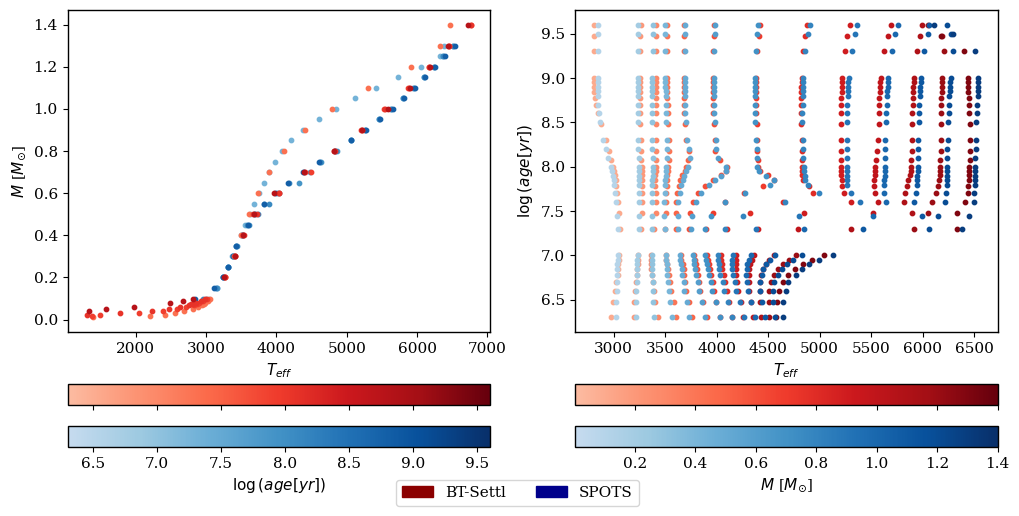

In [42]:
from matplotlib.patches import Patch
from matplotlib.colors import Normalize, LinearSegmentedColormap


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval},{maxval})', 
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

cmap_SPOTS = plt.get_cmap('Blues')
cmap_SPOTS = truncate_colormap(cmap_SPOTS, 0.25, 1)
cmap_BTSettl = plt.get_cmap('Reds')
cmap_BTSettl = truncate_colormap(cmap_BTSettl, 0.25, 1)

norm_SPOTS = plt.Normalize(vmin=np.log10(min(SPOTS_edr3_full['00'].keys()) * 1e9), vmax=np.log10(max(SPOTS_edr3_full['00'].keys()) * 1e9))
norm_BTSettl = plt.Normalize(vmin=np.log10(min(BTSettl_Li_isochrones_MS.keys()) * 1e9), vmax=np.log10(max(BTSettl_Li_isochrones_MS.keys()) * 1e9))

ages_SPOTS = [0.126, 0.079, 0.02, 0.631]
ages_BTSettl = [0.12, 0.08, 0.02, 0.6]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for age_SPOTS in SPOTS_edr3_full['00'].keys():
    log_age_SPOTS = np.log10(age_SPOTS * 1e9)
    color_SPOTS = cmap_SPOTS(norm_SPOTS(log_age_SPOTS))
    if age_SPOTS in ages_SPOTS:
        axs[0].scatter(SPOTS_edr3_full['00'][age_SPOTS]['Teff'], SPOTS_edr3_full['00'][age_SPOTS]['Mass'], s=10, color=color_SPOTS)

for age_BTSettl in BTSettl_Li_isochrones_MS.keys():
    log_age_BTSettl = np.log10(age_BTSettl * 1e9)
    color_BTSettl = cmap_BTSettl(norm_BTSettl(log_age_BTSettl))
    if age_BTSettl in ages_BTSettl:
        axs[0].scatter(BTSettl_Li_isochrones_MS[age_BTSettl]['Teff'], BTSettl_Li_isochrones_MS[age_BTSettl]['M/Ms'], s=10, color=color_BTSettl)

cbar_SPOTS = plt.colorbar(cm.ScalarMappable(norm=norm_SPOTS, cmap=cmap_SPOTS), ax=axs[0], fraction=0.1, pad=0, orientation='horizontal', label=r'$\log{(age [yr])}$')
cbar_BTSettl = plt.colorbar(cm.ScalarMappable(norm=norm_BTSettl, cmap=cmap_BTSettl), ax=axs[0], fraction=0.1, pad=0.125, orientation='horizontal')

cbar_BTSettl.ax.set_xticklabels([])

axs[0].set_xlabel(r'$T_{eff}$')
axs[0].set_ylabel(r'$M$ [$M_{\odot}$]')

norm_SPOTS_mass = plt.Normalize(vmin=0.001, vmax=1.4)
norm_BTSettl_mass = plt.Normalize(vmin=0.001, vmax=1.4)

color_SPOTS = cmap_SPOTS(norm_SPOTS_mass(SPOTS_edr3_full['00'][0.126]['Mass']))
color_BTSettl = cmap_BTSettl(norm_BTSettl_mass(BTSettl_Li_isochrones_MS[0.12]['M/Ms']))
masses_SPOTS = np.array(SPOTS_edr3_full['00'][0.126]['Mass'])
masses_BTSettl = np.array(BTSettl_Li_isochrones_MS[0.12]['M/Ms'])

common_masses = np.intersect1d(masses_SPOTS, masses_BTSettl)

matched_SPOTS = []
matched_BTSettl = []

for mass in common_masses:
    matched_SPOTS.append(mass)
    matched_BTSettl.append(mass)

matched_masses = pd.DataFrame({'SPOTS': matched_SPOTS, 'BTSettl': matched_BTSettl})

mass_0 = 1.0

for mass_BTSettl in matched_masses['BTSettl']:
    for age, df in BTSettl_Li_isochrones_MS.items():
        masses = df['M/Ms']
        if mass_BTSettl in masses.values:
            index = masses[masses == mass_BTSettl].index[0]
            teff_value = df['Teff'][index]
            axs[1].scatter(teff_value, np.log10(age * 1e9), s=10, color=cmap_BTSettl(norm_BTSettl_mass(mass_BTSettl)))
        
for mass_SPOTS in matched_masses['SPOTS']:
    for age, df in SPOTS_edr3_full['00'].items():
        masses = df['Mass']
        if mass_SPOTS in masses.values:
            index = masses[masses == mass_SPOTS].index[0]
            teff_value = df['Teff'][index]
            axs[1].scatter(teff_value, np.log10(age * 1e9), s=10, color=cmap_SPOTS(norm_SPOTS_mass(mass_SPOTS)))

            
cbar_SPOTS_mass = plt.colorbar(cm.ScalarMappable(norm=norm_SPOTS_mass, cmap=cmap_SPOTS), ax=axs[1], fraction=0.1, pad=0, orientation='horizontal', label=r'$M$ [$M_{\odot}$]')
cbar_BTSettl_mass = plt.colorbar(cm.ScalarMappable(norm=norm_BTSettl_mass, cmap=cmap_BTSettl), ax=axs[1], fraction=0.1, pad=0.125, orientation='horizontal')
cbar_BTSettl_mass.ax.set_xticklabels([])

axs[1].set_xlabel(r'$T_{eff}$')
axs[1].set_ylabel(r'$\log{(age [yr])}$')

legend_elements = [
    Patch(facecolor='darkred', edgecolor='darkred', label='BT-Settl'),
    Patch(facecolor='darkblue', edgecolor='darkblue', label='SPOTS')
]

fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 0.075), ncol=2)



plt.show()

In [44]:
SPOTS_edr3_full['00'][0.126].columns

Index(['logAge', 'Mass', 'Fspot', 'Xspot', 'log(L/Lsun)', 'log(R/Rsun)',
       'log(g)', 'log(Teff)', 'log(T_hot)', 'log(T_cool)', 'TauCZ', 'Li/Li0',
       'B_mag', 'V_mag', 'Rc_mag', 'Ic_mag', 'J_mag', 'H_mag', 'K_mag',
       'W1_mag', 'G_mag', 'BP_mag', 'RP_mag', 'Thot', 'Tcool', 'Label_0',
       'J_hot', 'H_hot', 'Ks_hot', 'Label_1', 'J_cool', 'H_cool', 'Ks_cool',
       'Label_2', 'G_hot', 'G_BP_hot', 'G_RP_hot', 'Label_3', 'G_cool',
       'G_BP_cool', 'G_RP_cool', 'Age_Gyr', 'BP_abs', 'RP_abs', 'G_abs',
       'J_abs', 'H_abs', 'K_abs', 'M/Ms', 'BP-RP', 'G-J', 'G-RP', 'J-H', 'H-K',
       'G-H', 'G-K', 'G-V', 'A(Li)', 'Lsun', 'Teff', 'M_bol'],
      dtype='object')

In [46]:
BTSettl_Li_isochrones_MS[0.12].columns

Index(['age_Gyr', 't(Gyr)', 'M/Ms', 'Teff', 'log(L/Lsun)', 'lg(g)', 'R(Gcm)',
       'D', 'Li', 'G_abs', 'BP_abs', 'RP_abs', 'J_abs', 'H_abs', 'K_abs',
       'g_abs', 'r_abs', 'i_abs', 'y_abs', 'z_abs', 'A(Li)', 'Lsun'],
      dtype='object')

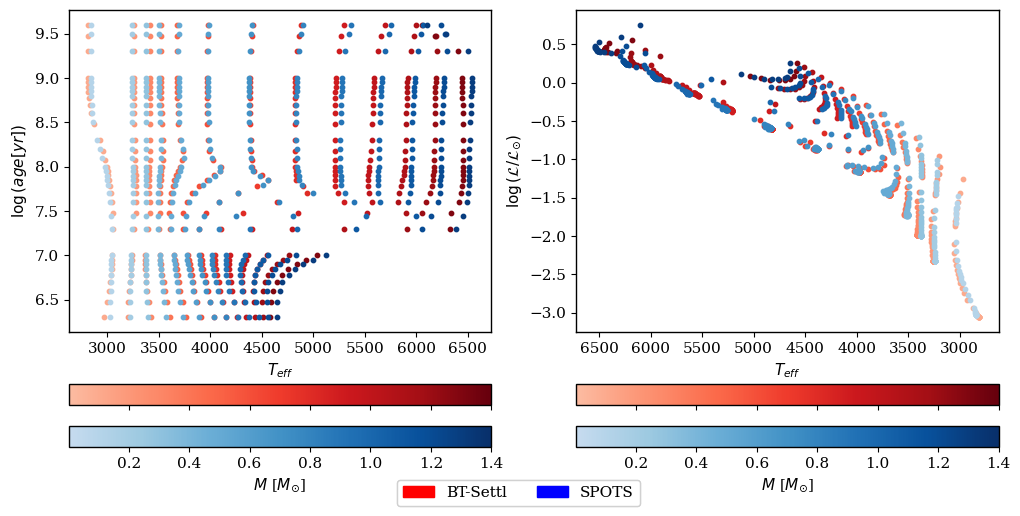

In [51]:
cmap_SPOTS = plt.get_cmap('Blues')
cmap_SPOTS = truncate_colormap(cmap_SPOTS, 0.25, 1)
cmap_BTSettl = plt.get_cmap('Reds')
cmap_BTSettl = truncate_colormap(cmap_BTSettl, 0.25, 1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

norm_SPOTS_mass = plt.Normalize(vmin=0.001, vmax=1.4)
norm_BTSettl_mass = plt.Normalize(vmin=0.001, vmax=1.4)

color_SPOTS = cmap_SPOTS(norm_SPOTS_mass(SPOTS_edr3_full['00'][0.126]['Mass']))
color_BTSettl = cmap_BTSettl(norm_BTSettl_mass(BTSettl_Li_isochrones_MS[0.12]['M/Ms']))
masses_SPOTS = np.array(SPOTS_edr3_full['00'][0.126]['Mass'])
masses_BTSettl = np.array(BTSettl_Li_isochrones_MS[0.12]['M/Ms'])

common_masses = np.intersect1d(masses_SPOTS, masses_BTSettl)

matched_SPOTS = []
matched_BTSettl = []

for mass in common_masses:
    matched_SPOTS.append(mass)
    matched_BTSettl.append(mass)

matched_masses = pd.DataFrame({'SPOTS': matched_SPOTS, 'BTSettl': matched_BTSettl})

mass_0 = 1.0

for mass_BTSettl in matched_masses['BTSettl']:
    for age, df in BTSettl_Li_isochrones_MS.items():
        masses = df['M/Ms']
        if mass_BTSettl in masses.values:
            index = masses[masses == mass_BTSettl].index[0]
            teff_value = df['Teff'][index]
            axs[0].scatter(teff_value, np.log10(age * 1e9), s=10, color=cmap_BTSettl(norm_BTSettl_mass(mass_BTSettl)))
        
for mass_SPOTS in matched_masses['SPOTS']:
    for age, df in SPOTS_edr3_full['00'].items():
        masses = df['Mass']
        if mass_SPOTS in masses.values:
            index = masses[masses == mass_SPOTS].index[0]
            teff_value = df['Teff'][index]
            axs[0].scatter(teff_value, np.log10(age * 1e9), s=10, color=cmap_SPOTS(norm_SPOTS_mass(mass_SPOTS)))

            
cbar_SPOTS_mass = plt.colorbar(cm.ScalarMappable(norm=norm_SPOTS_mass, cmap=cmap_SPOTS), ax=axs[0], fraction=0.1, pad=0, orientation='horizontal', label=r'$M$ [$M_{\odot}$]')
cbar_BTSettl_mass = plt.colorbar(cm.ScalarMappable(norm=norm_BTSettl_mass, cmap=cmap_BTSettl), ax=axs[0], fraction=0.1, pad=0.125, orientation='horizontal')
cbar_BTSettl_mass.ax.set_xticklabels([])

axs[0].set_xlabel(r'$T_{eff}$')
axs[0].set_ylabel(r'$\log{(age [yr])}$')

legend_elements = [
    Patch(facecolor='darkred', edgecolor='darkred', label='BT-Settl'),
    Patch(facecolor='darkblue', edgecolor='darkblue', label='SPOTS')
]

fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 0.075), ncol=2)

norm_SPOTS_mass = plt.Normalize(vmin=0.001, vmax=1.4)
norm_BTSettl_mass = plt.Normalize(vmin=0.001, vmax=1.4)

color_SPOTS = cmap_SPOTS(norm_SPOTS_mass(SPOTS_edr3_full['00'][0.126]['Mass']))
color_BTSettl = cmap_BTSettl(norm_BTSettl_mass(BTSettl_Li_isochrones_MS[0.12]['M/Ms']))
masses_SPOTS = np.array(SPOTS_edr3_full['00'][0.126]['Mass'])
masses_BTSettl = np.array(BTSettl_Li_isochrones_MS[0.12]['M/Ms'])

common_masses = np.intersect1d(masses_SPOTS, masses_BTSettl)

matched_SPOTS = []
matched_BTSettl = []

for mass in common_masses:
    matched_SPOTS.append(mass)
    matched_BTSettl.append(mass)

matched_masses = pd.DataFrame({'SPOTS': matched_SPOTS, 'BTSettl': matched_BTSettl})

mass_0 = 1.0

for mass_BTSettl in matched_masses['BTSettl']:
    for age, df in BTSettl_Li_isochrones_MS.items():
        masses = df['M/Ms']
        if mass_BTSettl in masses.values:
            index = masses[masses == mass_BTSettl].index[0]
            teff_value = df['Teff'][index]
            L_value = df['Lsun'][index]
            axs[1].scatter(teff_value, np.log10(L_value), s=10, color=cmap_BTSettl(norm_BTSettl_mass(mass_BTSettl)))
        
for mass_SPOTS in matched_masses['SPOTS']:
    for age, df in SPOTS_edr3_full['00'].items():
        masses = df['Mass']
        if mass_SPOTS in masses.values:
            index = masses[masses == mass_SPOTS].index[0]
            teff_value = df['Teff'][index]
            L_value = df['Lsun'][index]
            axs[1].scatter(teff_value, np.log10(L_value), s=10, color=cmap_SPOTS(norm_SPOTS_mass(mass_SPOTS)))

            
cbar_SPOTS_mass = plt.colorbar(cm.ScalarMappable(norm=norm_SPOTS_mass, cmap=cmap_SPOTS), ax=axs[1], fraction=0.1, pad=0, orientation='horizontal', label=r'$M$ [$M_{\odot}$]')
cbar_BTSettl_mass = plt.colorbar(cm.ScalarMappable(norm=norm_BTSettl_mass, cmap=cmap_BTSettl), ax=axs[1], fraction=0.1, pad=0.125, orientation='horizontal')
cbar_BTSettl_mass.ax.set_xticklabels([])

axs[1].invert_xaxis()

axs[1].set_xlabel(r'$T_{eff}$')
axs[1].set_ylabel(r'$\log{(\mathcal{L}/\mathcal{L}_{\odot})}$')

legend_elements = [
    Patch(facecolor='red', edgecolor='red', label='BT-Settl'),
    Patch(facecolor='blue', edgecolor='blue', label='SPOTS')
]

fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 0.075), ncol=2)



plt.show()

In [25]:
BTSettl_Li_isochrones_MS[0.12].columns

Index(['age_Gyr', 't(Gyr)', 'M/Ms', 'Teff', 'log(L/Lsun)', 'lg(g)', 'R(Gcm)',
       'D', 'Li', 'G_abs', 'BP_abs', 'RP_abs', 'J_abs', 'H_abs', 'K_abs',
       'g_abs', 'r_abs', 'i_abs', 'y_abs', 'z_abs', 'A(Li)', 'Lsun'],
      dtype='object')

In [26]:
SPOTS_edr3_full['00'][0.126].columns

Index(['logAge', 'Mass', 'Fspot', 'Xspot', 'log(L/Lsun)', 'log(R/Rsun)',
       'log(g)', 'log(Teff)', 'log(T_hot)', 'log(T_cool)', 'TauCZ', 'Li/Li0',
       'B_mag', 'V_mag', 'Rc_mag', 'Ic_mag', 'J_mag', 'H_mag', 'K_mag',
       'W1_mag', 'G_mag', 'BP_mag', 'RP_mag', 'Thot', 'Tcool', 'Label_0',
       'J_hot', 'H_hot', 'Ks_hot', 'Label_1', 'J_cool', 'H_cool', 'Ks_cool',
       'Label_2', 'G_hot', 'G_BP_hot', 'G_RP_hot', 'Label_3', 'G_cool',
       'G_BP_cool', 'G_RP_cool', 'Age_Gyr', 'BP_abs', 'RP_abs', 'G_abs',
       'J_abs', 'H_abs', 'K_abs', 'M/Ms', 'BP-RP', 'G-J', 'G-RP', 'J-H', 'H-K',
       'G-H', 'G-K', 'G-V', 'A(Li)', 'Lsun', 'Teff'],
      dtype='object')

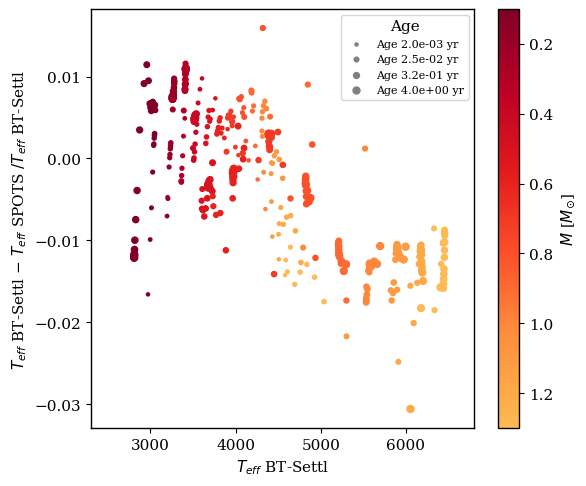

In [67]:
mass_BTSettl_array = []
mean_Teff_array = []
mean_age_array = []
sigma_Teff_array = []
sigma_age_array = []

teff_BTSettl_values = {}
teff_SPOTS_values = {}
teff_diff_array = {}

for mass_BTSettl, mass_SPOTS in zip(matched_masses['BTSettl'], matched_masses['SPOTS']):
    teff_BTSettl_values[mass_BTSettl] = []
    teff_SPOTS_values[mass_SPOTS] = []
    teff_diff_array[mass_BTSettl] = []
    age_BTSettl_values = []
    age_SPOTS_values = []
    age_diff_array = []
    
    for (age_BTSettl, df_BTSettl), (age_SPOTS, df_SPOTS) in zip(BTSettl_Li_isochrones_MS.items(), SPOTS_edr3_full['00'].items()):
        masses_BTSettl = df_BTSettl['M/Ms']
        masses_SPOTS = df_SPOTS['Mass']
        
        if mass_BTSettl in masses_BTSettl.values and mass_SPOTS in masses_SPOTS.values:
            index_BTSettl = masses_BTSettl[masses_BTSettl == mass_BTSettl].index[0]
            teff_value_BTSettl = df_BTSettl['Teff'][index_BTSettl]
            index_SPOTS = masses_SPOTS[masses_SPOTS == mass_SPOTS].index[0]
            teff_value_SPOTS = df_SPOTS['Teff'][index_SPOTS]
            
            teff_BTSettl_values[mass_BTSettl].append((teff_value_BTSettl, age_BTSettl))
            teff_SPOTS_values[mass_SPOTS].append((teff_value_SPOTS, age_SPOTS))
            
            teff_diff = np.abs(teff_value_BTSettl - teff_value_SPOTS)
            teff_diff_array[mass_BTSettl].append(teff_diff)
    
            age_value_BTSettl = age_SPOTS
            age_value_SPOTS = age_BTSettl
            age_BTSettl_values.append(age_value_BTSettl)
            age_SPOTS_values.append(age_value_SPOTS)
            age_diff = np.abs(age_value_BTSettl - age_value_SPOTS)
            age_diff_array.append(age_diff)
    
    mean_Teff = np.mean(teff_diff_array[mass_BTSettl])
    mean_age = np.mean(age_diff_array)
    sigma_Teff = np.std(teff_diff_array[mass_BTSettl])
    sigma_age = np.std(age_diff_array)
    
    mass_BTSettl_array.append(mass_BTSettl)
    mean_Teff_array.append(mean_Teff)
    mean_age_array.append(mean_age)
    sigma_Teff_array.append(sigma_Teff)
    sigma_age_array.append(sigma_age)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
        'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.cm.YlOrRd_r
cmap = truncate_colormap(cmap, 0, 0.65)

norm = plt.Normalize(vmin=min(mass_BTSettl_array), vmax=max(mass_BTSettl_array))

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

all_ages = [age for sublist in teff_BTSettl_values.values() for (_, age) in sublist]
min_age = min(all_ages)
max_age = max(all_ages)

log_min_age = np.log10(min_age)
log_max_age = np.log10(max_age)

def get_point_size(age):
    log_age = np.log10(age)
    return 5 + 20 * (log_age - log_min_age) / (log_max_age - log_min_age)

for mass in mass_BTSettl_array:
    teff_values = [teff for teff, age in teff_BTSettl_values[mass]]
    teff_diffs = [(teff_bt - teff_sp)/teff_bt for (teff_bt, _), (teff_sp, _) in zip(teff_BTSettl_values[mass], teff_SPOTS_values[mass])]
    ages = [age for teff, age in teff_BTSettl_values[mass]]
    
    sizes = [get_point_size(age) for age in ages]
    
    ax.scatter(teff_values, teff_diffs, s=sizes, color=cmap(norm(mass)))

ax.set_ylabel(r'$T_{eff}$ BT-Settl $-$ $T_{eff}$ SPOTS $/T_{eff}$ BT-Settl')
ax.set_xlabel(r'$T_{eff}$ BT-Settl')
ax.set_xlim(2300, 6800)

legend_ages = np.logspace(log_min_age, log_max_age, num=4)
legend_sizes = [get_point_size(age) for age in legend_ages]
for legend_age, legend_size in zip(legend_ages, legend_sizes):
    ax.scatter([], [], s=legend_size, color='gray', label=f'Age {legend_age:.1e} yr')

ax.legend(loc='upper right', fontsize=8, title='Age')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r'$M$ [$M_{\odot}$]')

cbar.ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [54]:
from IPython.display import display, Markdown, Latex, HTML
from pylab import *
from astropy.table import Table

mean_Teff_array_rounded = [round(mean, 2) for mean in mean_Teff_array]
sigma_Teff_array_rounded = [round(sigma, 2) for sigma in sigma_Teff_array]

mean_age_array_rounded = [round(mean, 2) for mean in mean_age_array]  # Convert to Myr and round
sigma_age_array_rounded = [round(sigma, 2) for sigma in sigma_age_array]  # Convert to Myr and round

mass_array = [round(mass, 2) for mass in mass_BTSettl_array]

age = [round(age, 2) for age in age_BTSettl_values]

data = {
    r'$M$ [$M_{\odot}$]': mass_array,
    r'$\Delta\,T_{eff}$ [K]': [f'{mean} ± {sigma}' for mean, sigma in zip(mean_Teff_array_rounded, sigma_Teff_array_rounded)]}
    
df = pd.DataFrame(data)

latex_table = df.to_latex(index=False, column_format='|c|c|c|', escape=False)
          
display(HTML(df.to_html().replace('<table border="0.5" class="dataframe">', '<table border="0.5" class="dataframe" style="width:100%;">')))

In [29]:
sigma_Teff_array

[9.74528824658613,
 9.370937658478061,
 12.278778443206173,
 5.759022657437813,
 5.056286902083065,
 8.549933109049325,
 10.723141222979669,
 12.924107375755884,
 15.443239087236211,
 27.687643131857943,
 32.66582299965071,
 32.43308662264348,
 18.46549068104321]

In [35]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def inf_A_Li_models(ages, BTSettl_Li_isochrones_filtered):
    trace_A_Li_models = {}
    
    for i in range(len(ages)):
        age = ages[i]
        
        if age in BTSettl_Li_isochrones_filtered:
            print(f'Isochrone age {age} Gyr is available.')
            Teff = BTSettl_Li_isochrones_filtered[age]['Teff']
            A_Li = BTSettl_Li_isochrones_filtered[age]['A(Li)']
        else:
            nearest_age = min(BTSettl_Li_isochrones_filtered.keys(), key=lambda x: abs(x - age))
            print(f'Isochrone age {age} Gyr is not available; instead nearest is selected: {nearest_age} Gyr.')
            Teff = BTSettl_Li_isochrones_filtered[nearest_age]['Teff']
            A_Li = BTSettl_Li_isochrones_filtered[nearest_age]['A(Li)']
            ages[i] = nearest_age
    
    for age in ages:
        Teff = BTSettl_Li_isochrones_filtered[age]['Teff']
        A_Li = BTSettl_Li_isochrones_filtered[age]['A(Li)']

        with pm.Model() as model:
            T_max = pm.Uniform(r'$T_{max}$', lower=Teff.min(), upper=Teff.max())
            width = pm.HalfNormal(r'$\omega$', sigma=10)
            
            A_Li_pred = A_Li_fun(T_max, Teff, width)
            #3.3 / (1 + pm.math.exp((- T_max + Teff) / width))

            likelihood = pm.Normal('likelihood', mu=A_Li_pred, sigma=0.1, observed=A_Li)

            trace = pm.sample(2000, tune=2000, chains=4, target_accept=0.99, nuts={'max_treedepth': 15})

        trace_A_Li_models[age] = trace
        
    return trace_A_Li_models

def A_Li_fun(T_max_mean, Teff_range, width_mean):
    original_A_Li = 3.3 / (1 + np.exp((-(T_max_mean - Teff_range)) / width_mean))
    A_Li = (original_A_Li / 3.3) * (3.3 + 0.7) - 0.7
    return A_Li

def plot_inf_A_Li(trace_A_Li_models, BTSettl_Li_isochrones_filtered, colors):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    
    if len(trace_A_Li_models) != len(colors):
        raise ValueError("Colors and A(Li) must have same length")
    
    for idx, age in enumerate(trace_A_Li_models):
        if age in BTSettl_Li_isochrones_filtered:
            isochrone = BTSettl_Li_isochrones_filtered[age]
            print(f'Isochrone age {age} Gyr is available.')
        else:
            closest_age = find_nearest_idx(list(BTSettl_Li_isochrones_filtered.keys()), age)
            isochrone = BTSettl_Li_isochrones_filtered[closest_age]
            print(f'Isochrone age {age} Gyr is not available; instead nearest is selected: {closest_age} Gyr.')
            age = closest_age
        
        T_max_mean = pm.summary(trace_A_Li_models[age])['mean'][r'$T_{max}$']
        width_mean = pm.summary(trace_A_Li_models[age])['mean'][r'$\omega$']
        
        for idx_A_Li, A_Li in isochrone['A(Li)'].items():
            if A_Li == -np.inf:
                A_Li_inf_idx = idx_A_Li
                Teff_inf = isochrone['Teff'][A_Li_inf_idx]
                
        isochrone = isochrone[isochrone['Teff'] < Teff_inf]
        
        Teff = isochrone['Teff']
        A_Li_values = isochrone['A(Li)']
        
        Teff_range = np.linspace(Teff.min(), Teff.max(), 1000)
        A_Li_pred_mean = A_Li_fun(T_max_mean, Teff_range, width_mean)
        
        ax.plot(Teff_range, A_Li_pred_mean, label=f'{age} Gyr', color=colors[idx], lw=1)

        ax.scatter(Teff, A_Li_values, color=colors[idx], s=10)

    ax.set_xlabel(r'$T_{eff}$')
    ax.set_ylabel('A(Li)')
    ax.set_ylim(-0.1, 3.5)
    
    ax.invert_xaxis()
    
    ax.legend()
    plt.show()
    
def generate_colors(ages):
    red = [1, 0, 0]
    orange = [1, 0.647, 0]

    num_colors = len(ages)
    colors = [np.linspace(red[i], orange[i], num_colors) for i in range(3)]
    colors = np.transpose(colors)

    colors = [list(color) for color in colors]

    return colors


def filter_models_by_temperature(data_dict, min_temp):
    filtered_data = {}
    for age, df in data_dict.items():
        filtered_data[age] = df[df['Teff'] < min_temp]
        filtered_data[age].replace(-np.inf, 0, inplace=True)
    return filtered_data


colors = generate_colors([0.02, 0.08, 0.12])

In [36]:
BTSettl_Li_isochrones_MS.keys()

dict_keys([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0])

In [37]:
BTSettl_Li_isochrones_MS_filtered = filter_models_by_temperature(BTSettl_Li_isochrones_MS, 3500)

trace_A_Li_models = inf_A_Li_models([0.02, 0.08, 0.12], BTSettl_Li_isochrones_MS_filtered)

/tmp/ipykernel_1142388/3858723041.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.02 Gyr is available.
Isochrone age 0.08 Gyr is available.
Isochrone age 0.12 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 8 seconds.


Isochrone age 0.02 Gyr is available.
Isochrone age 0.08 Gyr is available.
Isochrone age 0.12 Gyr is available.


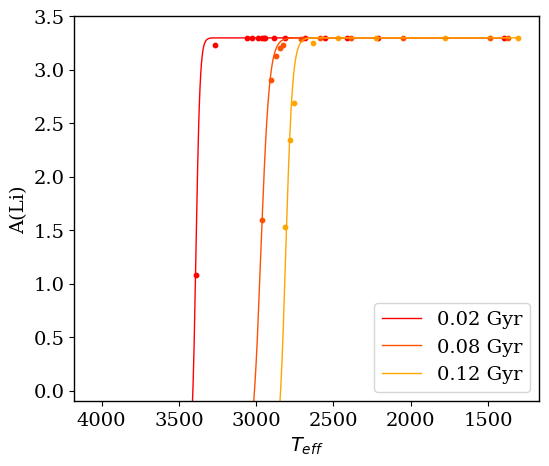

In [38]:
plot_inf_A_Li(trace_A_Li_models, BTSettl_Li_isochrones_MS, colors)

In [ ]:
MS_color = pd.read_csv('MS_color.csv')
    
for c in MS_color.columns:
    if c != '#SpT':
        MS_color[c] = pd.to_numeric(MS_color[c], errors='coerce')

MS_color = MS_color[10**MS_color['logT'] < 6000]

MS_color = MS_color[10**MS_color['logT'] > 1600]

MS_color['G-J'] = MS_color['G-V'] + MS_color['Mv'] - MS_color['M_J']
MS_color['G-Ks'] = MS_color['G-V'] + MS_color['Mv'] - MS_color['M_Ks']
MS_color['Teff'] = 10**MS_color['logT']
MS_color = MS_color.reset_index()

MS_color_filtered = MS_color[(MS_color['Teff'] >= 1750) & (MS_color['Teff'] <= 3000)].copy()
MS_color_filtered.loc[:, 'logR'] = np.log10(MS_color_filtered['R_Rsun'])

n = MS_color_filtered.shape[0]

In [ ]:
MS_color_filtered

In [ ]:
MS_color_filtered['Teff']

In [ ]:
MS_color_filtered_ages = {}

ages = [0.02, 0.08, 0.12]

for age in ages:
    MS_color_filtered_ages[age] = MS_color_filtered
    
    T_max_mean = pm.summary(trace_A_Li_models[age])['mean'][r'$T_{max}$']
    width_mean = pm.summary(trace_A_Li_models[age])['mean'][r'$\omega$']
    
    Teff = MS_color_filtered_ages[age]['Teff']

    MS_color_filtered_ages[age]['A(Li)'] = A_Li_fun(T_max_mean, Teff, width_mean)
    
    

In [757]:
SPOTS_expanded_A_Li_00 = {}

for age in ages:
    
    ages_SPOTS = list(SPOTS_expanded['00'].keys())
    closest_age = ages_SPOTS[np.abs(np.array(ages_SPOTS) - age).argmin()]
    
    SPOTS_expanded_A_Li_00[age] = SPOTS_expanded['00'][closest_age].copy()

    if any(value == -np.inf for value in SPOTS_expanded['00'][closest_age]['A(Li)']):
    
        for idx_A_Li, A_Li in SPOTS_expanded_A_Li_00[age]['A(Li)'].items():
            if A_Li == -np.inf and SPOTS_expanded_A_Li_00[age]['A(Li)'][idx_A_Li + 1] != -np.inf:
                A_Li_inf_idx = idx_A_Li
                Teff_inf = SPOTS_expanded_A_Li_00[age]['Teff'][A_Li_inf_idx]


        isochrone = SPOTS_expanded_A_Li_00[age]['Teff'][SPOTS_expanded_A_Li_00[age]['Teff'] < Teff_inf]
        
        T_max_mean = pm.summary(trace_A_Li_models[age])['mean'][r'$T_{max}$']
        width_mean = pm.summary(trace_A_Li_models[age])['mean'][r'$\omega$']
        
        for Teff in isochrone:
            for Teff_idx in SPOTS_expanded_A_Li_00[age]['Teff'].index:
                if Teff == SPOTS_expanded_A_Li_00[age]['Teff'][Teff_idx]:
                    
                    print(age, Teff, A_Li_fun(T_max_mean, Teff, width_mean))
            
                    SPOTS_expanded_A_Li_00[age].loc[Teff_idx, 'A(Li)'] = A_Li_fun(T_max_mean, Teff, width_mean)

0.02 3372.168831901082 2.1347141515767163
0.02 3311.812416123153 3.2877814422853726
0.02 3243.5061071969367 3.299952085638701
0.02 3160.0772548060413 3.2999999451084134
0.02 3040.990896194743 3.29999999999652
0.02 2930.8932452503213 3.299999999999999
0.02 2811.9008303989394 3.3
0.02 2679.1683248190316 3.3
0.02 2570.3957827688646 3.3
0.02 2421.0290467361774 3.3
0.08 2992.504760788991 -0.17197525072124054
0.08 2930.8932452503213 2.599001517166341
0.08 2811.9008303989394 3.2988768190491236
0.08 2679.1683248190316 3.2999993092352007
0.08 2570.3957827688646 3.2999999983865322
0.08 2382.319469358689 3.2999999999999545
0.12 2930.8932452503213 -0.6970005661338959
0.12 2811.9008303989394 0.6225310888507556
0.12 2741.5741719278835 3.132472376755702
0.12 2630.2679918953813 3.2995960772846153
0.12 2421.0290467361774 3.2999999955285793
0.12 2269.8648518838213 3.2999999999988248


In [758]:
MS_color_filtered_ages[0.120]

index   #SpT         Teff   logT   BCv  logL   Mbol  R_Rsun     Mv   B-V  \
32     78  M5.5V  2930.893245  3.467 -3.58 -2.79  11.72  0.1560  15.30  1.94   
33     79    M6V  2811.900830  3.449 -4.13 -2.98  12.19  0.1370  16.32  2.01   
34     80  M6.5V  2741.574172  3.438 -4.62 -3.10  12.48  0.1260  17.10  2.07   
35     81    M7V  2679.168325  3.428 -4.99 -3.19  12.71  0.1200  17.70  2.12   
36     82  M7.5V  2630.267992  3.420 -5.32 -3.24  12.84  0.1160  18.16  2.14   
37     83    M8V  2570.395783  3.410 -5.65 -3.28  12.95  0.1140  18.60  2.15   
38     84  M8.5V  2421.029047  3.384 -5.78 -3.47  13.42  0.1040  19.20  2.16   
39     85    M9V  2382.319469  3.377 -5.86 -3.52  13.54  0.1020  19.40  2.17   
40     86  M9.5V  2349.632821  3.371 -6.13 -3.57  13.67  0.1010  19.75  0.00   
41     87    L0V  2269.864852  3.356 -6.25 -3.60  13.75  0.1020  20.00  0.00   
42     88    L1V  2157.744409  3.334 -6.48 -3.71  14.02  0.0995  20.50  0.00   
43     89    L2V  2060.629913  3.314 -6.62 -3.82  14.28  0.0970  20.90  0.00   
44     90    L3V  1918.668741  3.283 -7.05 -3.96  14.65  0.0942  21.70  0.00   
45     91    L4V  1870.682140  3.272 -7.53 -4.01  14.77  0.0940  22.30  0.00   

    ...  g-r   i-z   z-Y   Msun  #SpT.1  Unnamed: 32   G-J   G-Ks      logR  \
32  ...  0.0  1.13  0.52  0.095     NaN          NaN  3.63   4.55 -0.806875   
33  ...  0.0  1.45  0.60  0.090     NaN          NaN  3.77   4.73 -0.863279   
34  ...  0.0  1.58  0.64  0.085     NaN          NaN  3.93   4.90 -0.899629   
35  ...  0.0  1.77  0.70  0.083     NaN          NaN  4.02   5.02 -0.920819   
36  ...  0.0  1.85  0.74  0.080     NaN          NaN  4.13   5.20 -0.935542   
37  ...  0.0  1.93  0.77  0.078     NaN          NaN  4.44   5.57 -0.943095   
38  ...  0.0  1.96  0.80  0.077     NaN          NaN  4.65   5.81 -0.982967   
39  ...  0.0  1.99  0.82  0.076     NaN          NaN  4.81   6.00 -0.991400   
40  ...  0.0  2.00  0.84  0.075     NaN          NaN  4.90   6.15 -0.995679   
41  ...  0.0  2.01  0.86  0.074     NaN          NaN  4.79   6.00 -0.991400   
42  ...  0.0  2.02  0.88  0.073     NaN          NaN  8.38   9.73 -1.002177   
43  ...  0.0  2.04  0.90  0.071     NaN          NaN  8.43   9.90 -1.013228   
44  ...  0.0  2.10  0.92  0.070     NaN          NaN  8.92  10.30 -1.025949   
45  ...  0.0  2.20  0.94  0.068     NaN          NaN  9.21  10.80 -1.026872   

       A(Li)  
32 -0.697001  
33  0.622531  
34  3.132472  
35  3.294193  
36  3.299596  
37  3.299985  
38  3.300000  
39  3.300000  
40  3.300000  
41  3.300000  
42  3.300000  
43  3.300000  
44  3.300000  
45  3.300000  

[14 rows x 38 columns]

In [759]:
SPOTS_expanded['00'][0.126]

logAge   Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0   8.100000  1.300    0.0    0.8     0.412322     0.101930  4.347365   
1   8.100000  1.250    0.0    0.8     0.330458     0.079603  4.374986   
2   8.100000  1.200    0.0    0.8     0.244443     0.055355  4.405754   
3   8.100000  1.150    0.0    0.8     0.154305     0.029990  4.437999   
4   8.100000  1.100    0.0    0.8     0.060162     0.003835  4.471005   
5   8.100000  1.050    0.0    0.8    -0.037916    -0.022712  4.503896   
6   8.100000  1.000    0.0    0.8    -0.140140    -0.048660  4.534602   
7   8.100000  0.950    0.0    0.8    -0.246858    -0.073722  4.562450   
8   8.100000  0.900    0.0    0.8    -0.358181    -0.098047  4.587620   
9   8.100000  0.850    0.0    0.8    -0.474711    -0.121780  4.610261   
10  8.100000  0.800    0.0    0.8    -0.597804    -0.145327  4.631026   
11  8.100000  0.750    0.0    0.8    -0.728511    -0.169368  4.651080   
12  8.100000  0.700    0.0    0.8    -0.864977    -0.195221  4.672823   
13  8.100000  0.650    0.0    0.8    -1.012628    -0.226149  4.702494   
14  8.100000  0.600    0.0    0.8    -1.152988    -0.260413  4.736260   
15  8.100000  0.550    0.0    0.8    -1.268473    -0.291167  4.759979   
16  8.100000  0.500    0.0    0.8    -1.414063    -0.329963  4.796178   
17  8.100000  0.450    0.0    0.8    -1.560148    -0.373196  4.836887   
18  8.100000  0.400    0.0    0.8    -1.690418    -0.414652  4.868646   
19  8.100000  0.350    0.0    0.8    -1.810935    -0.454479  4.890308   
20  8.100000  0.300    0.0    0.8    -1.925703    -0.496960  4.908324   
21  8.100000  0.250    0.0    0.8    -2.050513    -0.543744  4.922710   
22  8.100000  0.200    0.0    0.8    -2.201137    -0.599432  4.937177   
23  8.100000  0.150    0.0    0.8    -2.395952    -0.669096  4.951565   
24  8.100000  0.100    0.0    0.8    -2.689492    -0.761060  4.959401   
25  8.100371  0.095    0.0    0.8    -2.790000    -0.806875  5.028756   
26  8.100371  0.090    0.0    0.8    -2.980000    -0.863279  5.118083   
27  8.100371  0.085    0.0    0.8    -3.100000    -0.899629  5.165960   
28  8.100371  0.080    0.0    0.8    -3.240000    -0.935542  5.211456   
29  8.100371  0.077    0.0    0.8    -3.470000    -0.982967  5.289706   
30  8.100371  0.074    0.0    0.8    -3.600000    -0.991400  5.289313   

    log(Teff)  log(T_hot)  log(T_cool)  ...      G-H      G-K      G-V  \
0    3.813743    3.813743       0.0000  ...  0.94187  0.97556 -0.15675   
1    3.804440    3.804440       0.0000  ...  1.00924  1.04499 -0.16294   
2    3.795061    3.795061       0.0000  ...  1.07753  1.11557 -0.16850   
3    3.785208    3.785208       0.0000  ...  1.14885  1.18969 -0.17206   
4    3.774750    3.774750       0.0000  ...  1.22739  1.27197 -0.17662   
5    3.763504    3.763504       0.0000  ...  1.31496  1.36354 -0.20177   
6    3.750922    3.750922       0.0000  ...  1.40895  1.46179 -0.22926   
7    3.736774    3.736774       0.0000  ...  1.52179  1.58106 -0.24622   
8    3.721106    3.721106       0.0000  ...  1.65187  1.71735 -0.26414   
9    3.703839    3.703839       0.0000  ...  1.80349  1.87674 -0.30101   
10   3.684840    3.684840       0.0000  ...  1.97991  2.06267 -0.34286   
11   3.664184    3.664184       0.0000  ...  2.19008  2.28384 -0.40592   
12   3.642994    3.642994       0.0000  ...  2.40327  2.51537 -0.46759   
13   3.621545    3.621545       0.0000  ...  2.57682  2.71848 -0.55648   
14   3.603587    3.603587       0.0000  ...  2.69514  2.86366 -0.61492   
15   3.590093    3.590093       0.0000  ...  2.78150  2.96999 -0.68095   
16   3.573093    3.573093       0.0000  ...  2.90841  3.11558 -0.81893   
17   3.558189    3.558189       0.0000  ...  3.03013  3.24735 -0.92722   
18   3.546349    3.546349       0.0000  ...  3.12717  3.34991 -1.00765   
19   3.536133    3.536133       0.0000  ...  3.21378  3.44106 -1.10319   
20   3.528682    3.528682       0.0000  ...  3.27957  3.51041 -1.18325   
21   3.520871    3.520871       0.0000  .

In [760]:
SPOTS_expanded_A_Li_00[0.12]

logAge   Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0   8.100000  1.300    0.0    0.8     0.412322     0.101930  4.347365   
1   8.100000  1.250    0.0    0.8     0.330458     0.079603  4.374986   
2   8.100000  1.200    0.0    0.8     0.244443     0.055355  4.405754   
3   8.100000  1.150    0.0    0.8     0.154305     0.029990  4.437999   
4   8.100000  1.100    0.0    0.8     0.060162     0.003835  4.471005   
5   8.100000  1.050    0.0    0.8    -0.037916    -0.022712  4.503896   
6   8.100000  1.000    0.0    0.8    -0.140140    -0.048660  4.534602   
7   8.100000  0.950    0.0    0.8    -0.246858    -0.073722  4.562450   
8   8.100000  0.900    0.0    0.8    -0.358181    -0.098047  4.587620   
9   8.100000  0.850    0.0    0.8    -0.474711    -0.121780  4.610261   
10  8.100000  0.800    0.0    0.8    -0.597804    -0.145327  4.631026   
11  8.100000  0.750    0.0    0.8    -0.728511    -0.169368  4.651080   
12  8.100000  0.700    0.0    0.8    -0.864977    -0.195221  4.672823   
13  8.100000  0.650    0.0    0.8    -1.012628    -0.226149  4.702494   
14  8.100000  0.600    0.0    0.8    -1.152988    -0.260413  4.736260   
15  8.100000  0.550    0.0    0.8    -1.268473    -0.291167  4.759979   
16  8.100000  0.500    0.0    0.8    -1.414063    -0.329963  4.796178   
17  8.100000  0.450    0.0    0.8    -1.560148    -0.373196  4.836887   
18  8.100000  0.400    0.0    0.8    -1.690418    -0.414652  4.868646   
19  8.100000  0.350    0.0    0.8    -1.810935    -0.454479  4.890308   
20  8.100000  0.300    0.0    0.8    -1.925703    -0.496960  4.908324   
21  8.100000  0.250    0.0    0.8    -2.050513    -0.543744  4.922710   
22  8.100000  0.200    0.0    0.8    -2.201137    -0.599432  4.937177   
23  8.100000  0.150    0.0    0.8    -2.395952    -0.669096  4.951565   
24  8.100000  0.100    0.0    0.8    -2.689492    -0.761060  4.959401   
25  8.100371  0.095    0.0    0.8    -2.790000    -0.806875  5.028756   
26  8.100371  0.090    0.0    0.8    -2.980000    -0.863279  5.118083   
27  8.100371  0.085    0.0    0.8    -3.100000    -0.899629  5.165960   
28  8.100371  0.080    0.0    0.8    -3.240000    -0.935542  5.211456   
29  8.100371  0.077    0.0    0.8    -3.470000    -0.982967  5.289706   
30  8.100371  0.074    0.0    0.8    -3.600000    -0.991400  5.289313   

    log(Teff)  log(T_hot)  log(T_cool)  ...      G-H      G-K      G-V  \
0    3.813743    3.813743       0.0000  ...  0.94187  0.97556 -0.15675   
1    3.804440    3.804440       0.0000  ...  1.00924  1.04499 -0.16294   
2    3.795061    3.795061       0.0000  ...  1.07753  1.11557 -0.16850   
3    3.785208    3.785208       0.0000  ...  1.14885  1.18969 -0.17206   
4    3.774750    3.774750       0.0000  ...  1.22739  1.27197 -0.17662   
5    3.763504    3.763504       0.0000  ...  1.31496  1.36354 -0.20177   
6    3.750922    3.750922       0.0000  ...  1.40895  1.46179 -0.22926   
7    3.736774    3.736774       0.0000  ...  1.52179  1.58106 -0.24622   
8    3.721106    3.721106       0.0000  ...  1.65187  1.71735 -0.26414   
9    3.703839    3.703839       0.0000  ...  1.80349  1.87674 -0.30101   
10   3.684840    3.684840       0.0000  ...  1.97991  2.06267 -0.34286   
11   3.664184    3.664184       0.0000  ...  2.19008  2.28384 -0.40592   
12   3.642994    3.642994       0.0000  ...  2.40327  2.51537 -0.46759   
13   3.621545    3.621545       0.0000  ...  2.57682  2.71848 -0.55648   
14   3.603587    3.603587       0.0000  ...  2.69514  2.86366 -0.61492   
15   3.590093    3.590093       0.0000  ...  2.78150  2.96999 -0.68095   
16   3.573093    3.573093       0.0000  ...  2.90841  3.11558 -0.81893   
17   3.558189    3.558189       0.0000  ...  3.03013  3.24735 -0.92722   
18   3.546349    3.546349       0.0000  ...  3.12717  3.34991 -1.00765   
19   3.536133    3.536133       0.0000  ...  3.21378  3.44106 -1.10319   
20   3.528682    3.528682       0.0000  ...  3.27957  3.51041 -1.18325   
21   3.520871    3.520871       0.0000  .

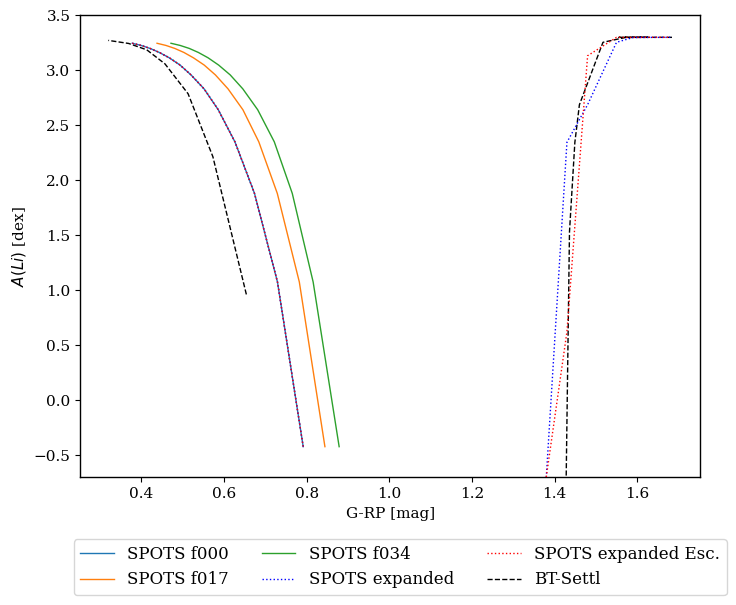

In [761]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-RP [mag]')
ax.plot(SPOTS_edr3['00'][0.126]['G_abs'] - SPOTS_edr3['00'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(SPOTS_edr3['17'][0.126]['G_abs'] - SPOTS_edr3['17'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(SPOTS_edr3['34'][0.126]['G_abs'] - SPOTS_edr3['34'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f034')

#ax.scatter(SPOTS_edr3_expanded['00'][0.126]['G-RP'], SPOTS_edr3_expanded['00'][0.126]['A(Li)'], s=10, zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded['00'][0.126]['G-RP'], SPOTS_expanded['00'][0.126]['A(Li)'], lw=1, ls=':', color='b', zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded_A_Li_00[0.12]['G-RP'], SPOTS_expanded_A_Li_00[0.12]['A(Li)'], lw=1, ls=':', color='r', zorder=4, label='SPOTS expanded Esc.')

ax.set_ylim([-0.7, 3.5])

ax.plot(BTSettl_Li_isochrones[0.120]['G_abs'] - BTSettl_Li_isochrones[0.120]['RP_abs'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
#ax.errorbar(data_obs_Pleiades['G_abs'] - data_obs_Pleiades['RP_abs'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)

fig.legend(fontsize=12, loc='lower center', ncol=3, bbox_to_anchor=(0.525, -0.1))

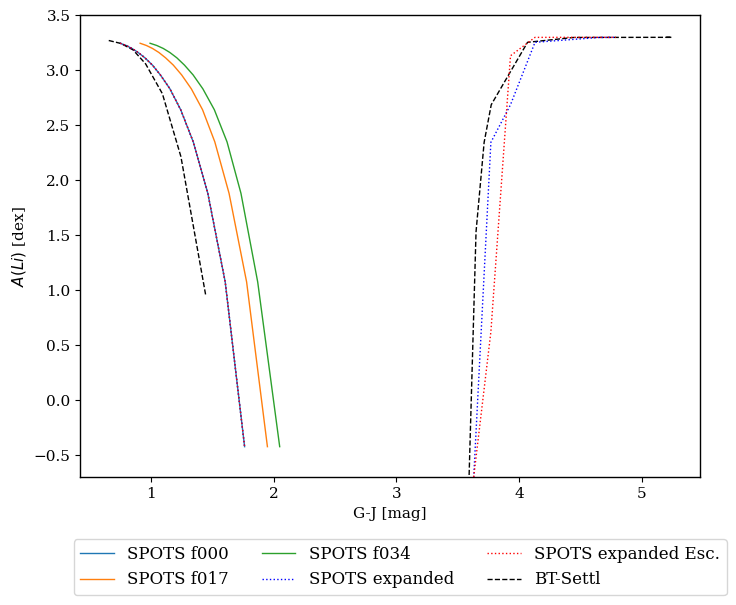

In [762]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-J [mag]')
ax.plot(SPOTS_edr3['00'][0.126]['G_abs'] - SPOTS_edr3['00'][0.126]['J_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(SPOTS_edr3['17'][0.126]['G_abs'] - SPOTS_edr3['17'][0.126]['J_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(SPOTS_edr3['34'][0.126]['G_abs'] - SPOTS_edr3['34'][0.126]['J_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f034')

#ax.scatter(SPOTS_edr3_expanded['00'][0.126]['G-RP'], SPOTS_edr3_expanded['00'][0.126]['A(Li)'], s=10, zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded['00'][0.126]['G-J'], SPOTS_expanded['00'][0.126]['A(Li)'], lw=1, ls=':', color='b', zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded_A_Li_00[0.12]['G-J'], SPOTS_expanded_A_Li_00[0.12]['A(Li)'], lw=1, ls=':', color='r', zorder=4, label='SPOTS expanded Esc.')

ax.set_ylim([-0.7, 3.5])

ax.plot(BTSettl_Li_isochrones[0.120]['G_abs'] - BTSettl_Li_isochrones[0.120]['J_abs'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
#ax.errorbar(data_obs_Pleiades['G_abs'] - data_obs_Pleiades['RP_abs'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)

fig.legend(fontsize=12, loc='lower center', ncol=3, bbox_to_anchor=(0.525, -0.1))

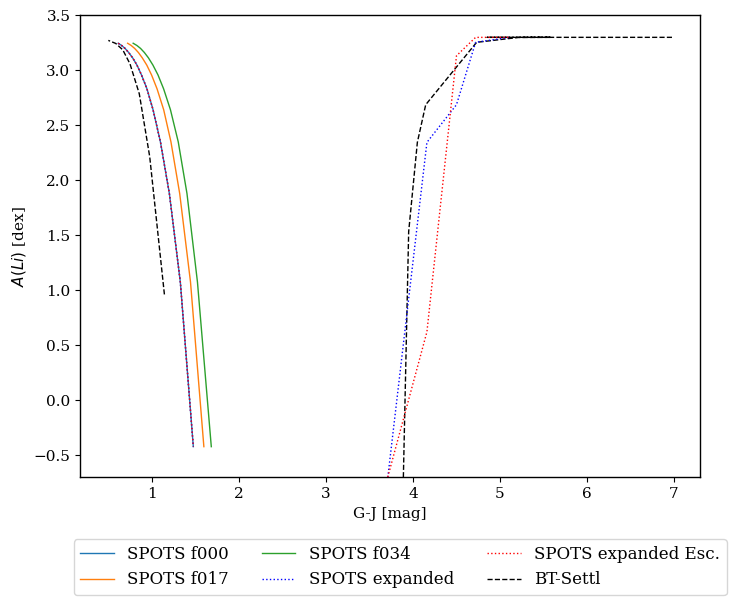

In [763]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-J [mag]')
ax.plot(SPOTS_edr3['00'][0.126]['BP_abs'] - SPOTS_edr3['00'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(SPOTS_edr3['17'][0.126]['BP_abs'] - SPOTS_edr3['17'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(SPOTS_edr3['34'][0.126]['BP_abs'] - SPOTS_edr3['34'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f034')

#ax.scatter(SPOTS_edr3_expanded['00'][0.126]['G-RP'], SPOTS_edr3_expanded['00'][0.126]['A(Li)'], s=10, zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded['00'][0.126]['BP-RP'][:30], SPOTS_expanded['00'][0.126]['A(Li)'][:30], lw=1, ls=':', color='b', zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded_A_Li_00[0.12]['BP-RP'][:30], SPOTS_expanded_A_Li_00[0.12]['A(Li)'][:30], lw=1, ls=':', color='r', zorder=4, label='SPOTS expanded Esc.')

ax.set_ylim([-0.7, 3.5])

ax.plot(BTSettl_Li_isochrones[0.120]['BP_abs'] - BTSettl_Li_isochrones[0.120]['RP_abs'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
#ax.errorbar(data_obs_Pleiades['G_abs'] - data_obs_Pleiades['RP_abs'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)

fig.legend(fontsize=12, loc='lower center', ncol=3, bbox_to_anchor=(0.525, -0.1))

BP-RP do not have value in last point from UCDs

In [781]:
SPOTS_expanded['00'].keys()

dict_keys([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.028, 0.04, 0.05, 0.063, 0.071, 0.079, 0.089, 0.1, 0.126, 0.158, 0.2, 0.316, 0.398, 0.501, 0.631, 0.708, 0.794, 0.891, 1.0, 1.995, 3.162])

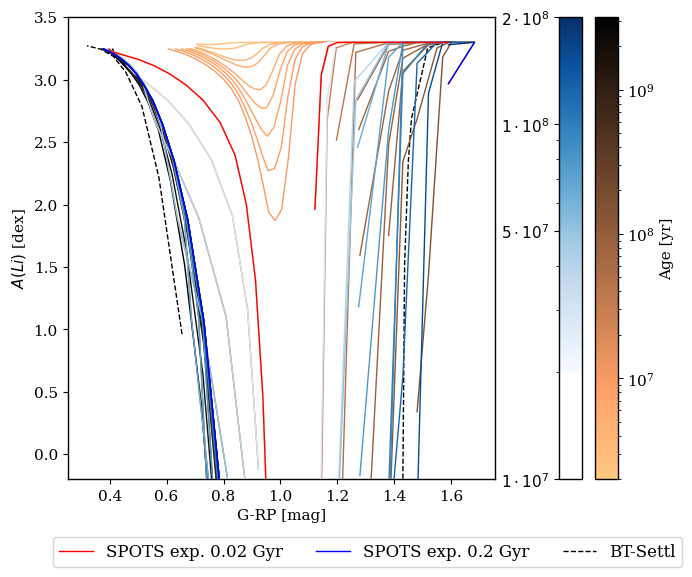

In [32]:
cmap = cm.copper_r
norm = mcolors.LogNorm(vmin=min(SPOTS_expanded['00'].keys())*1e9, vmax=max(SPOTS_expanded['00'].keys())*1e9)

cmap_esc = cm.Blues
norm_esc = mcolors.LogNorm(vmin=min(SPOTS_expanded_A_Li['00'].keys())*1e9, vmax=max(SPOTS_expanded_A_Li['00'].keys())*1e9)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-RP [mag]')

for age in SPOTS_expanded['00'].keys():
    age_in_years = age * 1e9
    color = cmap(norm(age_in_years))
    ax.plot(SPOTS_expanded['00'][age]['G-RP'], SPOTS_expanded['00'][age]['A(Li)'], lw=1, ls='-', color=color, zorder=4)
    
    if age == 0.02:
        ax.plot(SPOTS_expanded['00'][age]['G-RP'], SPOTS_expanded['00'][age]['A(Li)'], lw=1, ls='-', color='r', zorder=5, label=f'SPOTS exp. {age} Gyr')
    elif age == 0.2:
        ax.plot(SPOTS_expanded['00'][age]['G-RP'], SPOTS_expanded['00'][age]['A(Li)'], lw=1, ls='-', color='b', zorder=5, label=f'SPOTS exp. {age} Gyr')

for age in SPOTS_expanded['00'].keys():
    if 0.02 <= age <= 0.2:
        age_in_years = age * 1e9
        color_esc = cmap_esc(norm_esc(age_in_years))
        ax.plot(SPOTS_expanded_A_Li['00'][age]['G-RP'], SPOTS_expanded_A_Li['00'][age]['A(Li)'], lw=1, ls='-', color=color_esc, zorder=4)

ax.set_ylim([-0.2, 3.5])

ax.plot(BTSettl_Li_isochrones[0.120]['G_abs'] - BTSettl_Li_isochrones[0.120]['RP_abs'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')

sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax, orientation='vertical', pad=0.02)
cbar1.set_label('Age [yr]')

sm2 = plt.cm.ScalarMappable(cmap=cmap_esc, norm=norm_esc)
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax, orientation='vertical', pad=0.02)

cbar2.ax.set_position([cbar1.ax.get_position().x0 - 0.05, cbar1.ax.get_position().y0, cbar1.ax.get_position().width, cbar1.ax.get_position().height])

cbar2_ticks = [1e7, 5e7, 1e8, 2e8]
cbar2.set_ticks(cbar2_ticks)
cbar2.ax.set_yticklabels([f'${tick/10**int(np.log10(tick)):.0f} \\cdot 10^{{{int(np.log10(tick))}}}$' for tick in cbar2_ticks])

cbar2.ax.yaxis.set_ticks_position('left')
cbar2.ax.yaxis.set_label_position('left')
cbar2.ax.set_position([cbar1.ax.get_position().x0 - 0.045, cbar1.ax.get_position().y0, cbar1.ax.get_position().width, cbar1.ax.get_position().height])

fig.legend(fontsize=12, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))

plt.show()


## SPOTS extension

In [17]:
from models_test import PlotAnalyzer

In [18]:
plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

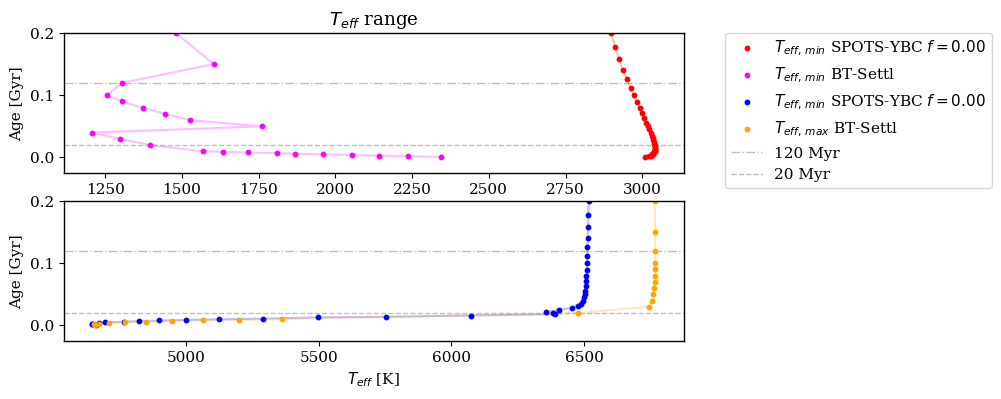

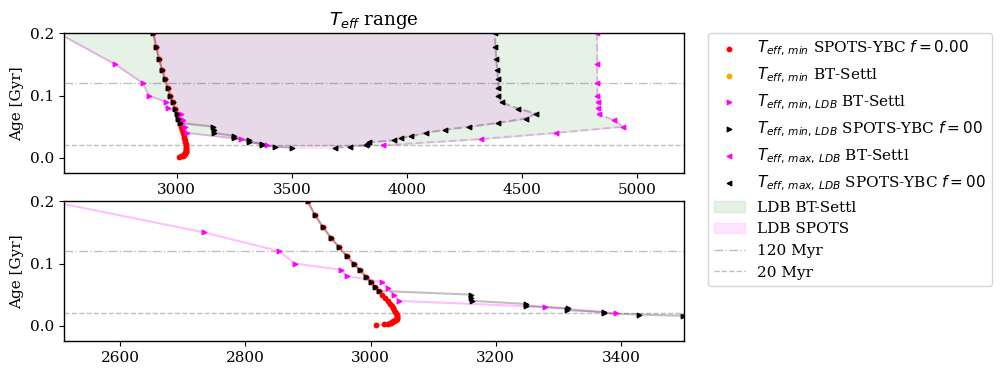

In [19]:
SPOTS = SPOTS_edr3

f = '00'
minim_age = 0.02
maxim_age = 0.120

upplim = 0.2

plot_analyzer = PlotAnalyzer(path_all)

plot_analyzer.plot_ages(SPOTS, f, minim_age, maxim_age, upplim, BTSettl_str=True)


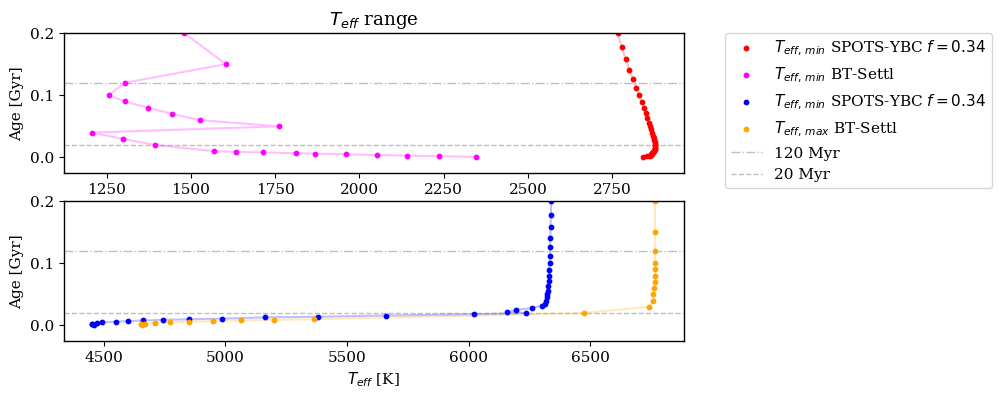

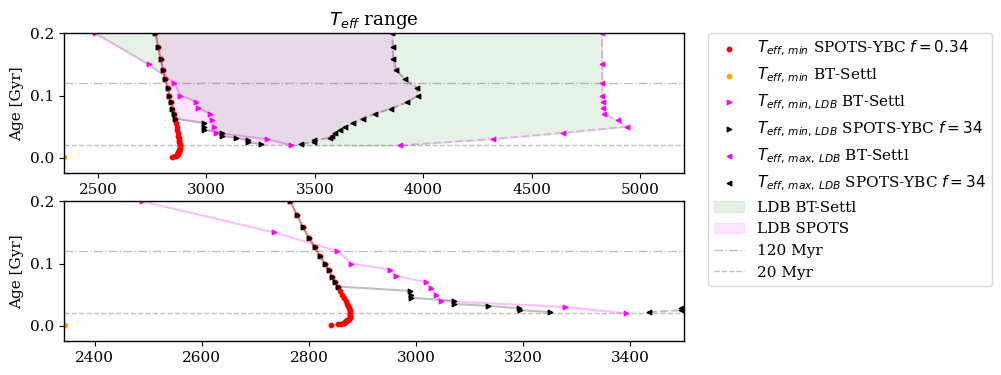

In [20]:
SPOTS = SPOTS_edr3

f = '34'
minim_age = 0.02
maxim_age = 0.120

upplim = 0.2

plot_analyzer = PlotAnalyzer(path_all)

plot_analyzer.plot_ages(SPOTS, f, minim_age, maxim_age, upplim, BTSettl_str=True)

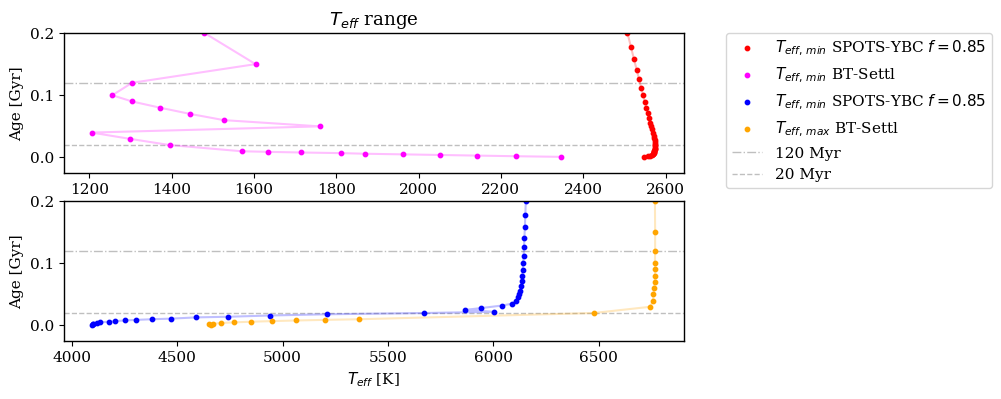

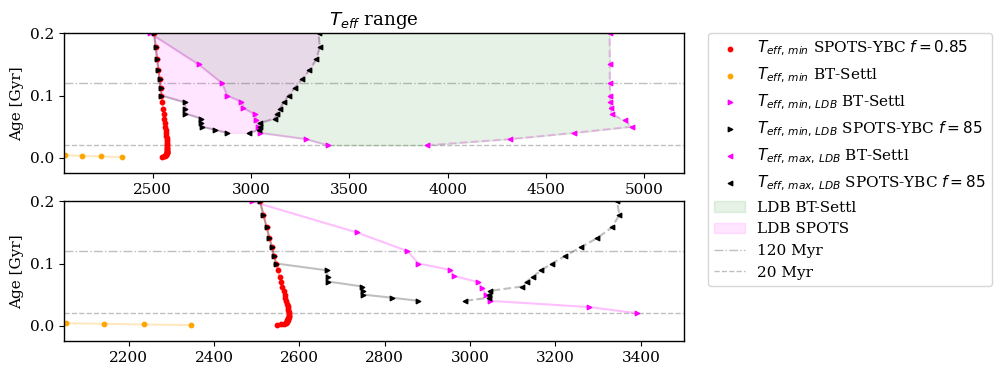

In [21]:
SPOTS = SPOTS_edr3

f = '85'
minim_age = 0.02
maxim_age = 0.120

upplim = 0.2

plot_analyzer = PlotAnalyzer(path_all)

plot_analyzer.plot_ages(SPOTS, f, minim_age, maxim_age, upplim, BTSettl_str=True)


for age in SPOTS_edr3['00'].keys():
    if age >= 0.08 and age < 0.2:
        print('____________', age)
        print(SPOTS_edr3['00'][age][['Teff', 'A(Li)']])
    

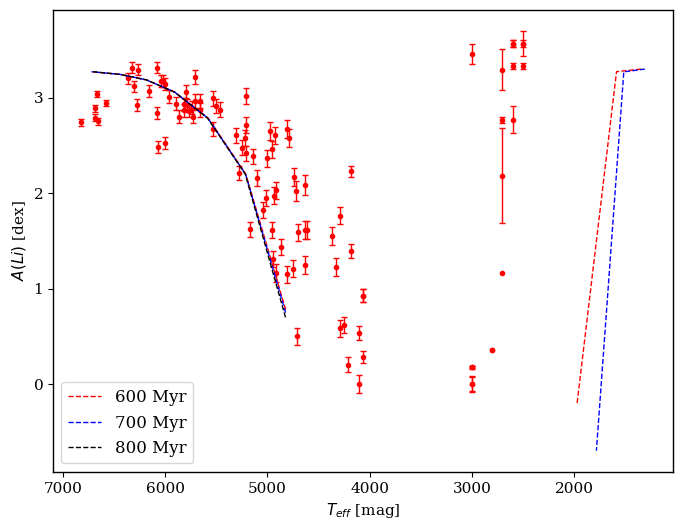

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel(r'$A(Li)$ [dex]')
ax.set_xlabel(r'$T_{eff}$ [mag]')

ax.plot(BTSettl_Li_isochrones[0.6]['Teff'], BTSettl_Li_isochrones[0.6]['A(Li)'], linewidth=1, label='600 Myr', linestyle='--', color='r')
ax.plot(BTSettl_Li_isochrones[0.7]['Teff'], BTSettl_Li_isochrones[0.7]['A(Li)'], linewidth=1, label='700 Myr', linestyle='--', color='b')
ax.plot(BTSettl_Li_isochrones[0.8]['Teff'], BTSettl_Li_isochrones[0.8]['A(Li)'], linewidth=1, label='800 Myr', linestyle='--', color='k')


ax.errorbar(data_obs_Pleiades['Teff'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)

ax.invert_xaxis()

ax.legend(fontsize=12)

### BTSettl ages for SPOTS

In [1]:
string = 'work'

from matplotlib.path import Path
import pymc as pm
import arviz as az
import bambi as bmb
import xarray as xr
import biosc
import biosc.preprocessing
import matplotlib.ticker as ticker

import models_test

from pymc import HalfCauchy, Model, Normal, sample

import os
import matplotlib.cm as cm
from netCDF4 import Dataset as NetCDFFile
from scipy.stats import gaussian_kde

from biosc.preprocessing import Preprocessing
from biosc.bhm import BayesianModel

import models_test
from models_test import plt, np, pd, pc, select_nearest_age

path_all = pc(string)
## to change directory:
## path_all = pc_other(string_directory)

import sys
sys.path.append(path_all)

import bmp
from bmp import BayesianModelPlots

from models_test import Models

models = Models()

from models_test import PleiadesData

path_data = path_all + 'data/Pleiades_DANCe+GDR3+2MASS+PanSTARRS1+A_Li+Lbol.csv'
pleiades_data = PleiadesData(path_data)

data_obs_Pleiades = pleiades_data.data

path_models = path_all + 'data/BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv'
BTSettl_mod = models.BTSettl(path_models)

BTSettl_Li_isochrones = BTSettl_mod.BTSettl_Li_isochrones

spots_instance = models.SPOTS(path_all)
SPOTS = spots_instance.SPOTS

spots_instance = models.SPOTS_YBC(path_all)
SPOTS_edr3 = spots_instance.SPOTS_edr3

from models_test import PlotAnalyzer

In [2]:
plt.rcParams.update({'font.size': 11, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

In [3]:
ages_BTSettl = list(BTSettl_Li_isochrones.keys())
            
ages_SPOTS = list(SPOTS_edr3['00'].keys())

SPOTS_edr3_00 = {}

BTSettl_Li_isochrones_MS = {}

for age in BTSettl_Li_isochrones.keys():
    if age <= 4.0 and age >= 0.002:
        closest_age = ages_SPOTS[np.abs(ages_SPOTS - age).argmin()]
        SPOTS_edr3_00[closest_age] = SPOTS_edr3['00'][closest_age]
        BTSettl_Li_isochrones_MS[age] = BTSettl_Li_isochrones[age]

SPOTS_edr3_full = {}

for f in SPOTS_edr3.keys():
    SPOTS_edr3_full[f] = {}
    ages_SPOTS = list(SPOTS_edr3[f].keys())
    for age in BTSettl_Li_isochrones.keys():
        if age <= 4.0 and age >= 0.002:
            closest_age = ages_SPOTS[np.abs(ages_SPOTS - age).argmin()]
            SPOTS_edr3_full[f][closest_age] = SPOTS_edr3[f][closest_age]
            BTSettl_Li_isochrones_MS[age] = BTSettl_Li_isochrones[age]

In [4]:
from models_test import SPOTS_extended

In [5]:
from IPython.display import clear_output

In [6]:
BTSettl = BTSettl_Li_isochrones_MS

SPOTS = SPOTS_edr3_full

MS_color_file = 'MS_color.csv'

f = ['00']

# Must be dics!!!!

SPOTS_expanded, BTSettl_Li_isochrones_Teff_dic, SPOTS_expanded_A_Li = SPOTS_extended(MS_color_file, BTSettl, SPOTS, f).SPOTS_extension()

clear_output()

In [7]:
BTSettl_Li_isochrones_Teff_dic['00'].keys()

dict_keys([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0])

In [8]:
SPOTS_expanded['00'].keys()

dict_keys([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.028, 0.04, 0.05, 0.063, 0.071, 0.079, 0.089, 0.1, 0.126, 0.158, 0.2, 0.316, 0.398, 0.501, 0.631, 0.708, 0.794, 0.891, 1.0, 1.995, 3.162])

In [9]:
BTSettl_Li_isochrones_Teff_dic['00'][0.4]

index  age_Gyr  t(Gyr)   M/Ms    Teff  log(L/Lsun)  lg(g)  R(Gcm)    D  \
0    586      0.4     0.4  0.100  2844.0        -3.00   5.20    9.15  0.0   
1    585      0.4     0.4  0.090  2726.0        -3.13   5.21    8.55  0.0   
2    584      0.4     0.4  0.080  2594.0        -3.27   5.21    8.09  0.0   
3    583      0.4     0.4  0.075  2508.0        -3.35   5.21    7.86  0.0   
4    582      0.4     0.4  0.072  2457.0        -3.40   5.20    7.76  0.0   
5    581      0.4     0.4  0.070  2419.0        -3.43   5.20    7.69  0.0   
6    580      0.4     0.4  0.050  1836.0        -3.96   5.10    7.29  0.0   

      Li  ...   H_abs   K_abs   g_abs   r_abs   i_abs   y_abs   z_abs  \
0  0.000  ...   9.607   9.321  16.628  15.657  13.143  12.113  11.563   
1  0.000  ...   9.896   9.605  17.538  16.519  13.731  12.544  11.865   
2  0.000  ...  10.185   9.892  18.838  17.466  14.506  13.080  12.317   
3  0.000  ...  10.362  10.069  19.366  17.858  14.966  13.401  12.566   
4  0.000  ...  10.461  10.170  19.830  18.079  15.255  13.596  12.715   
5  0.000  ...  10.536  10.247  20.198  18.244  15.477  13.744  12.829   
6  0.957  ...  11.791  11.211  22.735  19.825  17.918  16.173  15.048   

      A(Li)      Lsun  log(Teff)  
0      -inf  0.001000   3.453930  
1      -inf  0.000741   3.435526  
2      -inf  0.000537   3.413970  
3      -inf  0.000447   3.399328  
4      -inf  0.000398   3.390405  
5      -inf  0.000372   3.383636  
6  3.280912  0.000110   3.263873  

[7 rows x 24 columns]

In [10]:
SPOTS_expanded['00'][0.126]

logAge   Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0   8.100000  1.300    0.0    0.8     0.412322     0.101930  4.347365   
1   8.100000  1.250    0.0    0.8     0.330458     0.079603  4.374986   
2   8.100000  1.200    0.0    0.8     0.244443     0.055355  4.405754   
3   8.100000  1.150    0.0    0.8     0.154305     0.029990  4.437999   
4   8.100000  1.100    0.0    0.8     0.060162     0.003835  4.471005   
5   8.100000  1.050    0.0    0.8    -0.037916    -0.022712  4.503896   
6   8.100000  1.000    0.0    0.8    -0.140140    -0.048660  4.534602   
7   8.100000  0.950    0.0    0.8    -0.246858    -0.073722  4.562450   
8   8.100000  0.900    0.0    0.8    -0.358181    -0.098047  4.587620   
9   8.100000  0.850    0.0    0.8    -0.474711    -0.121780  4.610261   
10  8.100000  0.800    0.0    0.8    -0.597804    -0.145327  4.631026   
11  8.100000  0.750    0.0    0.8    -0.728511    -0.169368  4.651080   
12  8.100000  0.700    0.0    0.8    -0.864977    -0.195221  4.672823   
13  8.100000  0.650    0.0    0.8    -1.012628    -0.226149  4.702494   
14  8.100000  0.600    0.0    0.8    -1.152988    -0.260413  4.736260   
15  8.100000  0.550    0.0    0.8    -1.268473    -0.291167  4.759979   
16  8.100000  0.500    0.0    0.8    -1.414063    -0.329963  4.796178   
17  8.100000  0.450    0.0    0.8    -1.560148    -0.373196  4.836887   
18  8.100000  0.400    0.0    0.8    -1.690418    -0.414652  4.868646   
19  8.100000  0.350    0.0    0.8    -1.810935    -0.454479  4.890308   
20  8.100000  0.300    0.0    0.8    -1.925703    -0.496960  4.908324   
21  8.100000  0.250    0.0    0.8    -2.050513    -0.543744  4.922710   
22  8.100000  0.200    0.0    0.8    -2.201137    -0.599432  4.937177   
23  8.100000  0.150    0.0    0.8    -2.395952    -0.669096  4.951565   
24  8.100000  0.100    0.0    0.8    -2.689492    -0.761060  4.959401   
25  8.100371  0.095    0.0    0.8    -2.790000    -0.806875  5.028756   
26  8.100371  0.090    0.0    0.8    -2.980000    -0.863279  5.118083   
27  8.100371  0.085    0.0    0.8    -3.100000    -0.899629  5.165960   
28  8.100371  0.080    0.0    0.8    -3.240000    -0.935542  5.211456   
29  8.100371  0.077    0.0    0.8    -3.470000    -0.982967  5.289706   
30  8.100371  0.074    0.0    0.8    -3.600000    -0.991400  5.289313   

    log(Teff)  log(T_hot)  log(T_cool)  ...      G-H      G-K      G-V  \
0    3.813743    3.813743       0.0000  ...  0.94187  0.97556 -0.15675   
1    3.804440    3.804440       0.0000  ...  1.00924  1.04499 -0.16294   
2    3.795061    3.795061       0.0000  ...  1.07753  1.11557 -0.16850   
3    3.785208    3.785208       0.0000  ...  1.14885  1.18969 -0.17206   
4    3.774750    3.774750       0.0000  ...  1.22739  1.27197 -0.17662   
5    3.763504    3.763504       0.0000  ...  1.31496  1.36354 -0.20177   
6    3.750922    3.750922       0.0000  ...  1.40895  1.46179 -0.22926   
7    3.736774    3.736774       0.0000  ...  1.52179  1.58106 -0.24622   
8    3.721106    3.721106       0.0000  ...  1.65187  1.71735 -0.26414   
9    3.703839    3.703839       0.0000  ...  1.80349  1.87674 -0.30101   
10   3.684840    3.684840       0.0000  ...  1.97991  2.06267 -0.34286   
11   3.664184    3.664184       0.0000  ...  2.19008  2.28384 -0.40592   
12   3.642994    3.642994       0.0000  ...  2.40327  2.51537 -0.46759   
13   3.621545    3.621545       0.0000  ...  2.57682  2.71848 -0.55648   
14   3.603587    3.603587       0.0000  ...  2.69514  2.86366 -0.61492   
15   3.590093    3.590093       0.0000  ...  2.78150  2.96999 -0.68095   
16   3.573093    3.573093       0.0000  ...  2.90841  3.11558 -0.81893   
17   3.558189    3.558189       0.0000  ...  3.03013  3.24735 -0.92722   
18   3.546349    3.546349       0.0000  ...  3.12717  3.34991 -1.00765   
19   3.536133    3.536133       0.0000  ...  3.21378  3.44106 -1.10319   
20   3.528682    3.528682       0.0000  ...  3.27957  3.51041 -1.18325   
21   3.520871    3.520871       0.0000  .

In [11]:
SPOTS_expanded_A_Li['00'][0.126]

logAge   Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0   8.100000  1.300    0.0    0.8     0.412322     0.101930  4.347365   
1   8.100000  1.250    0.0    0.8     0.330458     0.079603  4.374986   
2   8.100000  1.200    0.0    0.8     0.244443     0.055355  4.405754   
3   8.100000  1.150    0.0    0.8     0.154305     0.029990  4.437999   
4   8.100000  1.100    0.0    0.8     0.060162     0.003835  4.471005   
5   8.100000  1.050    0.0    0.8    -0.037916    -0.022712  4.503896   
6   8.100000  1.000    0.0    0.8    -0.140140    -0.048660  4.534602   
7   8.100000  0.950    0.0    0.8    -0.246858    -0.073722  4.562450   
8   8.100000  0.900    0.0    0.8    -0.358181    -0.098047  4.587620   
9   8.100000  0.850    0.0    0.8    -0.474711    -0.121780  4.610261   
10  8.100000  0.800    0.0    0.8    -0.597804    -0.145327  4.631026   
11  8.100000  0.750    0.0    0.8    -0.728511    -0.169368  4.651080   
12  8.100000  0.700    0.0    0.8    -0.864977    -0.195221  4.672823   
13  8.100000  0.650    0.0    0.8    -1.012628    -0.226149  4.702494   
14  8.100000  0.600    0.0    0.8    -1.152988    -0.260413  4.736260   
15  8.100000  0.550    0.0    0.8    -1.268473    -0.291167  4.759979   
16  8.100000  0.500    0.0    0.8    -1.414063    -0.329963  4.796178   
17  8.100000  0.450    0.0    0.8    -1.560148    -0.373196  4.836887   
18  8.100000  0.400    0.0    0.8    -1.690418    -0.414652  4.868646   
19  8.100000  0.350    0.0    0.8    -1.810935    -0.454479  4.890308   
20  8.100000  0.300    0.0    0.8    -1.925703    -0.496960  4.908324   
21  8.100000  0.250    0.0    0.8    -2.050513    -0.543744  4.922710   
22  8.100000  0.200    0.0    0.8    -2.201137    -0.599432  4.937177   
23  8.100000  0.150    0.0    0.8    -2.395952    -0.669096  4.951565   
24  8.100000  0.100    0.0    0.8    -2.689492    -0.761060  4.959401   
25  8.100371  0.095    0.0    0.8    -2.790000    -0.806875  5.028756   
26  8.100371  0.090    0.0    0.8    -2.980000    -0.863279  5.118083   
27  8.100371  0.085    0.0    0.8    -3.100000    -0.899629  5.165960   
28  8.100371  0.080    0.0    0.8    -3.240000    -0.935542  5.211456   
29  8.100371  0.077    0.0    0.8    -3.470000    -0.982967  5.289706   
30  8.100371  0.074    0.0    0.8    -3.600000    -0.991400  5.289313   

    log(Teff)  log(T_hot)  log(T_cool)  ...      G-H      G-K      G-V  \
0    3.813743    3.813743       0.0000  ...  0.94187  0.97556 -0.15675   
1    3.804440    3.804440       0.0000  ...  1.00924  1.04499 -0.16294   
2    3.795061    3.795061       0.0000  ...  1.07753  1.11557 -0.16850   
3    3.785208    3.785208       0.0000  ...  1.14885  1.18969 -0.17206   
4    3.774750    3.774750       0.0000  ...  1.22739  1.27197 -0.17662   
5    3.763504    3.763504       0.0000  ...  1.31496  1.36354 -0.20177   
6    3.750922    3.750922       0.0000  ...  1.40895  1.46179 -0.22926   
7    3.736774    3.736774       0.0000  ...  1.52179  1.58106 -0.24622   
8    3.721106    3.721106       0.0000  ...  1.65187  1.71735 -0.26414   
9    3.703839    3.703839       0.0000  ...  1.80349  1.87674 -0.30101   
10   3.684840    3.684840       0.0000  ...  1.97991  2.06267 -0.34286   
11   3.664184    3.664184       0.0000  ...  2.19008  2.28384 -0.40592   
12   3.642994    3.642994       0.0000  ...  2.40327  2.51537 -0.46759   
13   3.621545    3.621545       0.0000  ...  2.57682  2.71848 -0.55648   
14   3.603587    3.603587       0.0000  ...  2.69514  2.86366 -0.61492   
15   3.590093    3.590093       0.0000  ...  2.78150  2.96999 -0.68095   
16   3.573093    3.573093       0.0000  ...  2.90841  3.11558 -0.81893   
17   3.558189    3.558189       0.0000  ...  3.03013  3.24735 -0.92722   
18   3.546349    3.546349       0.0000  ...  3.12717  3.34991 -1.00765   
19   3.536133    3.536133       0.0000  ...  3.21378  3.44106 -1.10319   
20   3.528682    3.528682       0.0000  ...  3.27957  3.51041 -1.18325   
21   3.520871    3.520871       0.0000  .

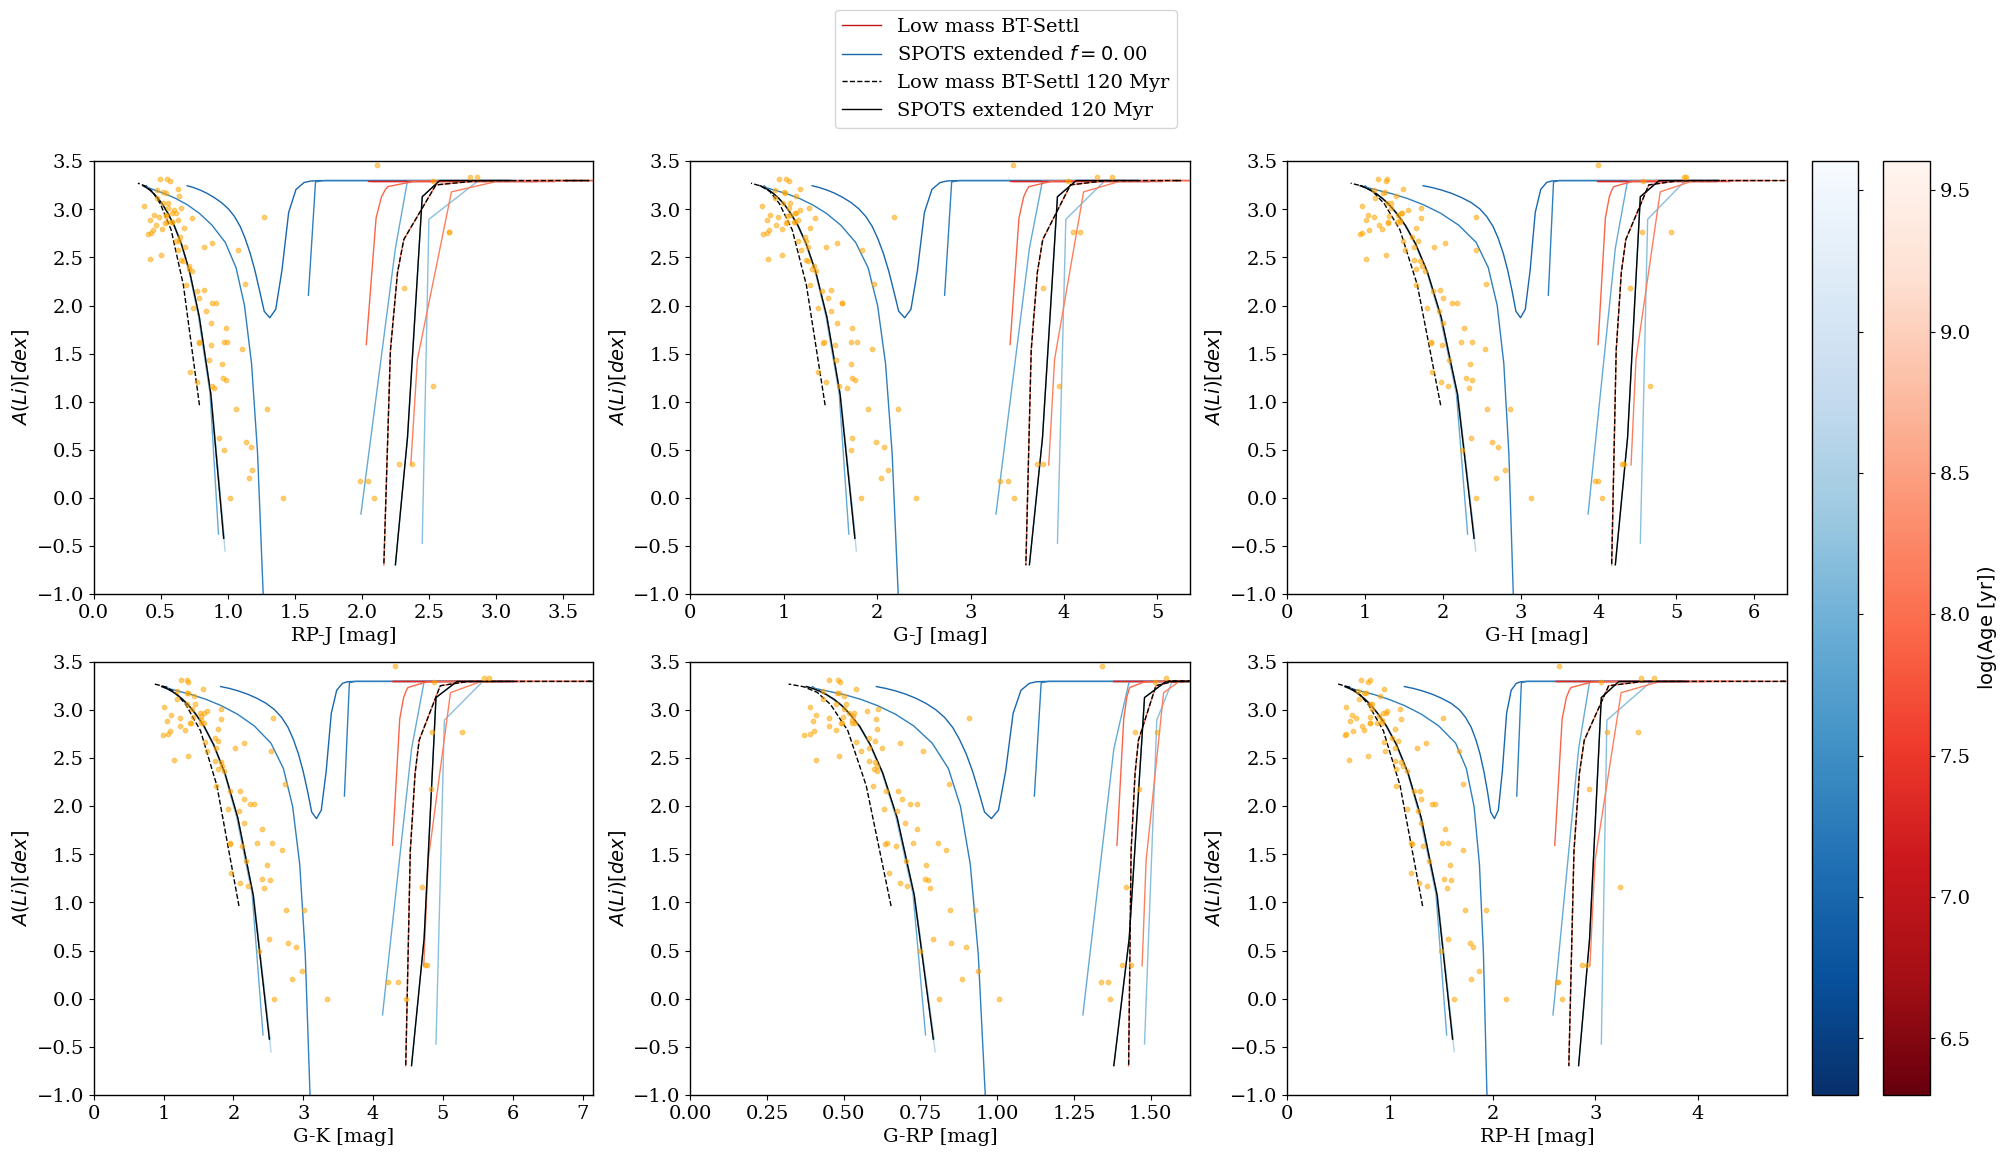

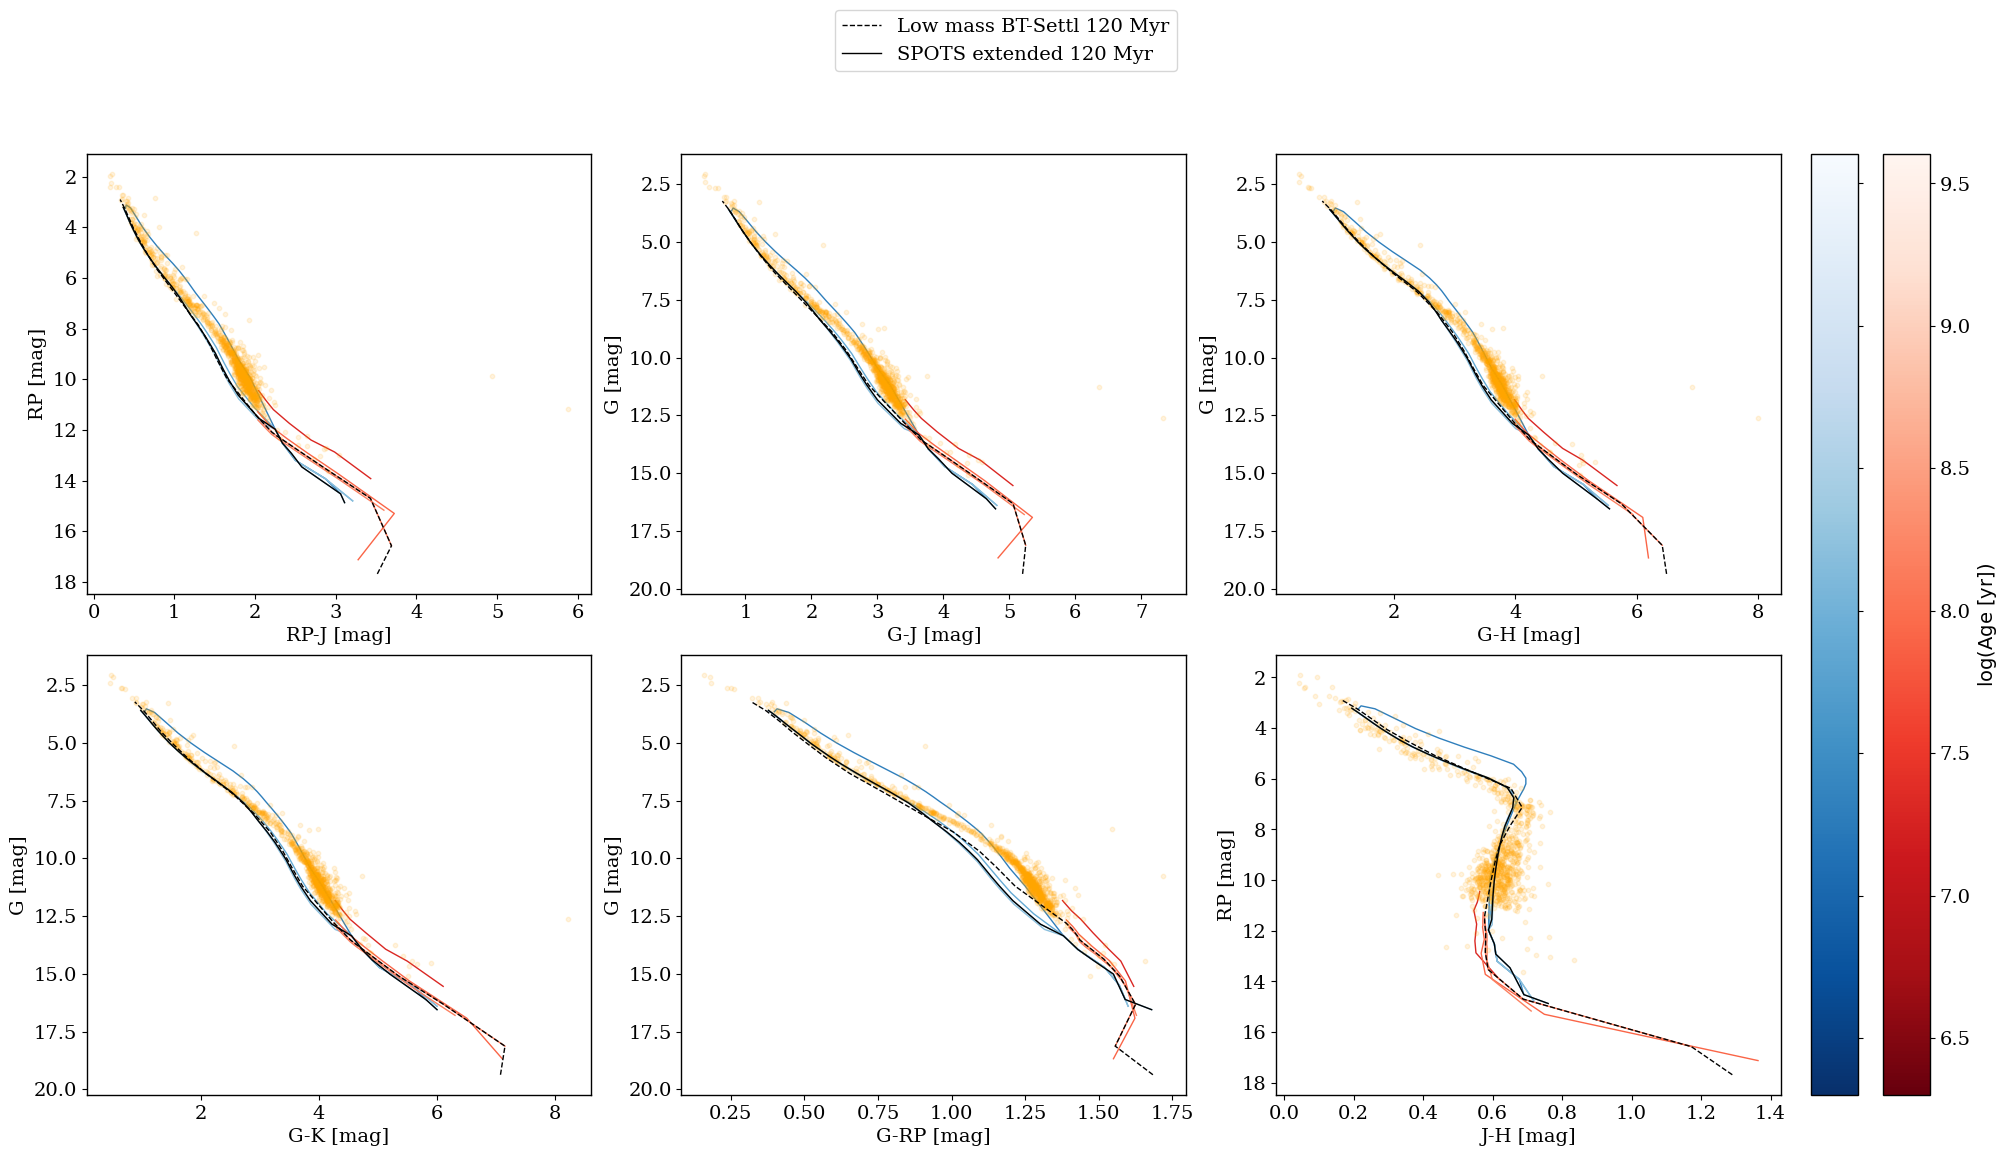

In [12]:
ages = [0.01, 0.02, 0.08, 0.120, 0.150, 0.400]

SPOTS_extended(MS_color_file, BTSettl, SPOTS, f).plot_CMD_ALi(SPOTS_expanded, SPOTS_expanded_A_Li, BTSettl_Li_isochrones_Teff_dic, BTSettl_Li_isochrones, data_obs_Pleiades, ages)


In [14]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader

def add_images_to_pdf(image1_path, image2_path, image3_path, output_pdf_path):
    if not os.path.exists(image1_path):
        print(f"Error: {image1_path} does not exist.")
        return
    if not os.path.exists(image2_path):
        print(f"Error: {image2_path} does not exist.")
        return
    if not os.path.exists(image3_path):
        print(f"Error: {image3_path} does not exist.")
        return
    
    try:
        c = canvas.Canvas(output_pdf_path, pagesize=letter)
        
        width, height = letter
        
        img1 = ImageReader(image1_path)
        img2 = ImageReader(image2_path)
        img3 = ImageReader(image3_path)
        
        img1_width, img1_height = img1.getSize()
        img2_width, img2_height = img2.getSize()
        img3_width, img3_height = img3.getSize()
        
        max_img3_width = width * 0.8
        
        scale_factor3 = min(max_img3_width / img3_width, 1.0)
        
        scaled_img3_width = img3_width * scale_factor3
        scaled_img3_height = img3_height * scale_factor3
        
        img3_x = (width - scaled_img3_width) / 2
        img3_y = 0
        
        c.drawImage(image1_path, 0, height * 2 / 3, width=width, height=height / 3)
        c.drawImage(image2_path, 0, height * 1 / 3, width=width, height=height / 3)
        c.drawImage(image3_path, img3_x, img3_y, width=scaled_img3_width, height=scaled_img3_height)
        
        c.save()
        print(f"PDF saved: {output_pdf_path}")
        
    except Exception as e:
        print(f"Error: {e}")

image1_path = "/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/017-Notion/0171-1.5/A(Li)_SPOTS_00.png"
image2_path = "/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/017-Notion/0171-1.5/CMD_SPOTS_00.png"
image3_path = "/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/017-Notion/0171-1.5/Mass_vs_Teff_vs_Age_SPOTSvsBTSettl.png"

output_pdf_path = "/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/017-Notion/0171-1.5/extended.pdf"

add_images_to_pdf(image1_path, image2_path, image3_path, output_pdf_path)

PDF saved: /pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/017-Notion/0171-1.5/extended.pdf


In [15]:
SPOTS_expanded['00'][0.126]

logAge   Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0   8.100000  1.300    0.0    0.8     0.412322     0.101930  4.347365   
1   8.100000  1.250    0.0    0.8     0.330458     0.079603  4.374986   
2   8.100000  1.200    0.0    0.8     0.244443     0.055355  4.405754   
3   8.100000  1.150    0.0    0.8     0.154305     0.029990  4.437999   
4   8.100000  1.100    0.0    0.8     0.060162     0.003835  4.471005   
5   8.100000  1.050    0.0    0.8    -0.037916    -0.022712  4.503896   
6   8.100000  1.000    0.0    0.8    -0.140140    -0.048660  4.534602   
7   8.100000  0.950    0.0    0.8    -0.246858    -0.073722  4.562450   
8   8.100000  0.900    0.0    0.8    -0.358181    -0.098047  4.587620   
9   8.100000  0.850    0.0    0.8    -0.474711    -0.121780  4.610261   
10  8.100000  0.800    0.0    0.8    -0.597804    -0.145327  4.631026   
11  8.100000  0.750    0.0    0.8    -0.728511    -0.169368  4.651080   
12  8.100000  0.700    0.0    0.8    -0.864977    -0.195221  4.672823   
13  8.100000  0.650    0.0    0.8    -1.012628    -0.226149  4.702494   
14  8.100000  0.600    0.0    0.8    -1.152988    -0.260413  4.736260   
15  8.100000  0.550    0.0    0.8    -1.268473    -0.291167  4.759979   
16  8.100000  0.500    0.0    0.8    -1.414063    -0.329963  4.796178   
17  8.100000  0.450    0.0    0.8    -1.560148    -0.373196  4.836887   
18  8.100000  0.400    0.0    0.8    -1.690418    -0.414652  4.868646   
19  8.100000  0.350    0.0    0.8    -1.810935    -0.454479  4.890308   
20  8.100000  0.300    0.0    0.8    -1.925703    -0.496960  4.908324   
21  8.100000  0.250    0.0    0.8    -2.050513    -0.543744  4.922710   
22  8.100000  0.200    0.0    0.8    -2.201137    -0.599432  4.937177   
23  8.100000  0.150    0.0    0.8    -2.395952    -0.669096  4.951565   
24  8.100000  0.100    0.0    0.8    -2.689492    -0.761060  4.959401   
25  8.100371  0.095    0.0    0.8    -2.790000    -0.806875  5.028756   
26  8.100371  0.090    0.0    0.8    -2.980000    -0.863279  5.118083   
27  8.100371  0.085    0.0    0.8    -3.100000    -0.899629  5.165960   
28  8.100371  0.080    0.0    0.8    -3.240000    -0.935542  5.211456   
29  8.100371  0.077    0.0    0.8    -3.470000    -0.982967  5.289706   
30  8.100371  0.074    0.0    0.8    -3.600000    -0.991400  5.289313   

    log(Teff)  log(T_hot)  log(T_cool)  ...      G-H      G-K      G-V  \
0    3.813743    3.813743       0.0000  ...  0.94187  0.97556 -0.15675   
1    3.804440    3.804440       0.0000  ...  1.00924  1.04499 -0.16294   
2    3.795061    3.795061       0.0000  ...  1.07753  1.11557 -0.16850   
3    3.785208    3.785208       0.0000  ...  1.14885  1.18969 -0.17206   
4    3.774750    3.774750       0.0000  ...  1.22739  1.27197 -0.17662   
5    3.763504    3.763504       0.0000  ...  1.31496  1.36354 -0.20177   
6    3.750922    3.750922       0.0000  ...  1.40895  1.46179 -0.22926   
7    3.736774    3.736774       0.0000  ...  1.52179  1.58106 -0.24622   
8    3.721106    3.721106       0.0000  ...  1.65187  1.71735 -0.26414   
9    3.703839    3.703839       0.0000  ...  1.80349  1.87674 -0.30101   
10   3.684840    3.684840       0.0000  ...  1.97991  2.06267 -0.34286   
11   3.664184    3.664184       0.0000  ...  2.19008  2.28384 -0.40592   
12   3.642994    3.642994       0.0000  ...  2.40327  2.51537 -0.46759   
13   3.621545    3.621545       0.0000  ...  2.57682  2.71848 -0.55648   
14   3.603587    3.603587       0.0000  ...  2.69514  2.86366 -0.61492   
15   3.590093    3.590093       0.0000  ...  2.78150  2.96999 -0.68095   
16   3.573093    3.573093       0.0000  ...  2.90841  3.11558 -0.81893   
17   3.558189    3.558189       0.0000  ...  3.03013  3.24735 -0.92722   
18   3.546349    3.546349       0.0000  ...  3.12717  3.34991 -1.00765   
19   3.536133    3.536133       0.0000  ...  3.21378  3.44106 -1.10319   
20   3.528682    3.528682       0.0000  ...  3.27957  3.51041 -1.18325   
21   3.520871    3.520871       0.0000  .

In [16]:
from models_test import SPOTS_extended

In [18]:
BTSettl = BTSettl_Li_isochrones_MS

SPOTS = SPOTS_edr3_full

MS_color_file = 'MS_color.csv'

f = ['00', '17', '34', '51', '68', '85']

# Must be dics!!!! ^^^^

SPOTS_expanded_full, BTSettl_Li_isochrones_Teff_dic, SPOTS_expanded_A_Li = SPOTS_extended(MS_color_file, BTSettl, SPOTS, f).SPOTS_extension()


/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.02 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.028 Gyr is not available; instead nearest is selected: 0.03 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 8 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.04 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.05 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.063 Gyr is not available; instead nearest is selected: 0.06 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.071 Gyr is not available; instead nearest is selected: 0.07 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 5 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.079 Gyr is not available; instead nearest is selected: 0.08 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.089 Gyr is not available; instead nearest is selected: 0.09 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 13 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.1 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.126 Gyr is not available; instead nearest is selected: 0.12 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.158 Gyr is not available; instead nearest is selected: 0.15 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.2 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.02 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.028 Gyr is not available; instead nearest is selected: 0.03 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.04 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.05 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.063 Gyr is not available; instead nearest is selected: 0.06 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.071 Gyr is not available; instead nearest is selected: 0.07 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 5 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.079 Gyr is not available; instead nearest is selected: 0.08 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 8 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.089 Gyr is not available; instead nearest is selected: 0.09 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 12 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.1 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.126 Gyr is not available; instead nearest is selected: 0.12 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.158 Gyr is not available; instead nearest is selected: 0.15 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.2 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 16 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.028 Gyr is not available; instead nearest is selected: 0.03 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.04 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.05 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.063 Gyr is not available; instead nearest is selected: 0.06 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.071 Gyr is not available; instead nearest is selected: 0.07 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.079 Gyr is not available; instead nearest is selected: 0.08 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.089 Gyr is not available; instead nearest is selected: 0.09 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 12 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.1 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.126 Gyr is not available; instead nearest is selected: 0.12 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.158 Gyr is not available; instead nearest is selected: 0.15 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 8 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.2 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.028 Gyr is not available; instead nearest is selected: 0.03 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.04 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.05 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.063 Gyr is not available; instead nearest is selected: 0.06 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.071 Gyr is not available; instead nearest is selected: 0.07 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.079 Gyr is not available; instead nearest is selected: 0.08 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 8 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.089 Gyr is not available; instead nearest is selected: 0.09 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.1 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.126 Gyr is not available; instead nearest is selected: 0.12 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.158 Gyr is not available; instead nearest is selected: 0.15 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.2 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.04 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.05 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.063 Gyr is not available; instead nearest is selected: 0.06 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.071 Gyr is not available; instead nearest is selected: 0.07 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.079 Gyr is not available; instead nearest is selected: 0.08 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.089 Gyr is not available; instead nearest is selected: 0.09 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.1 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.126 Gyr is not available; instead nearest is selected: 0.12 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.158 Gyr is not available; instead nearest is selected: 0.15 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.2 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.04 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.05 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.063 Gyr is not available; instead nearest is selected: 0.06 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 7 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.071 Gyr is not available; instead nearest is selected: 0.07 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.079 Gyr is not available; instead nearest is selected: 0.08 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.089 Gyr is not available; instead nearest is selected: 0.09 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.1 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.126 Gyr is not available; instead nearest is selected: 0.12 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.158 Gyr is not available; instead nearest is selected: 0.15 Gyr.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.
/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/models_test.py:1413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[age].replace(-np.inf, 0, inplace=True)


Isochrone age 0.2 Gyr is available.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$T_{max}$, $\omega$]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 25 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


In [31]:
SPOTS_expanded_A_Li['00'][0.126]

logAge   Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0   8.100000  1.300    0.0    0.8     0.412322     0.101930  4.347365   
1   8.100000  1.250    0.0    0.8     0.330458     0.079603  4.374986   
2   8.100000  1.200    0.0    0.8     0.244443     0.055355  4.405754   
3   8.100000  1.150    0.0    0.8     0.154305     0.029990  4.437999   
4   8.100000  1.100    0.0    0.8     0.060162     0.003835  4.471005   
5   8.100000  1.050    0.0    0.8    -0.037916    -0.022712  4.503896   
6   8.100000  1.000    0.0    0.8    -0.140140    -0.048660  4.534602   
7   8.100000  0.950    0.0    0.8    -0.246858    -0.073722  4.562450   
8   8.100000  0.900    0.0    0.8    -0.358181    -0.098047  4.587620   
9   8.100000  0.850    0.0    0.8    -0.474711    -0.121780  4.610261   
10  8.100000  0.800    0.0    0.8    -0.597804    -0.145327  4.631026   
11  8.100000  0.750    0.0    0.8    -0.728511    -0.169368  4.651080   
12  8.100000  0.700    0.0    0.8    -0.864977    -0.195221  4.672823   
13  8.100000  0.650    0.0    0.8    -1.012628    -0.226149  4.702494   
14  8.100000  0.600    0.0    0.8    -1.152988    -0.260413  4.736260   
15  8.100000  0.550    0.0    0.8    -1.268473    -0.291167  4.759979   
16  8.100000  0.500    0.0    0.8    -1.414063    -0.329963  4.796178   
17  8.100000  0.450    0.0    0.8    -1.560148    -0.373196  4.836887   
18  8.100000  0.400    0.0    0.8    -1.690418    -0.414652  4.868646   
19  8.100000  0.350    0.0    0.8    -1.810935    -0.454479  4.890308   
20  8.100000  0.300    0.0    0.8    -1.925703    -0.496960  4.908324   
21  8.100000  0.250    0.0    0.8    -2.050513    -0.543744  4.922710   
22  8.100000  0.200    0.0    0.8    -2.201137    -0.599432  4.937177   
23  8.100000  0.150    0.0    0.8    -2.395952    -0.669096  4.951565   
24  8.100000  0.100    0.0    0.8    -2.689492    -0.761060  4.959401   
25  8.100371  0.095    0.0    0.8    -2.790000    -0.806875  5.028756   
26  8.100371  0.090    0.0    0.8    -2.980000    -0.863279  5.118083   
27  8.100371  0.085    0.0    0.8    -3.100000    -0.899629  5.165960   
28  8.100371  0.080    0.0    0.8    -3.240000    -0.935542  5.211456   
29  8.100371  0.077    0.0    0.8    -3.470000    -0.982967  5.289706   
30  8.100371  0.074    0.0    0.8    -3.600000    -0.991400  5.289313   

    log(Teff)  log(T_hot)  log(T_cool)  ...      G-H      G-K      G-V  \
0    3.813743    3.813743       0.0000  ...  0.94187  0.97556 -0.15675   
1    3.804440    3.804440       0.0000  ...  1.00924  1.04499 -0.16294   
2    3.795061    3.795061       0.0000  ...  1.07753  1.11557 -0.16850   
3    3.785208    3.785208       0.0000  ...  1.14885  1.18969 -0.17206   
4    3.774750    3.774750       0.0000  ...  1.22739  1.27197 -0.17662   
5    3.763504    3.763504       0.0000  ...  1.31496  1.36354 -0.20177   
6    3.750922    3.750922       0.0000  ...  1.40895  1.46179 -0.22926   
7    3.736774    3.736774       0.0000  ...  1.52179  1.58106 -0.24622   
8    3.721106    3.721106       0.0000  ...  1.65187  1.71735 -0.26414   
9    3.703839    3.703839       0.0000  ...  1.80349  1.87674 -0.30101   
10   3.684840    3.684840       0.0000  ...  1.97991  2.06267 -0.34286   
11   3.664184    3.664184       0.0000  ...  2.19008  2.28384 -0.40592   
12   3.642994    3.642994       0.0000  ...  2.40327  2.51537 -0.46759   
13   3.621545    3.621545       0.0000  ...  2.57682  2.71848 -0.55648   
14   3.603587    3.603587       0.0000  ...  2.69514  2.86366 -0.61492   
15   3.590093    3.590093       0.0000  ...  2.78150  2.96999 -0.68095   
16   3.573093    3.573093       0.0000  ...  2.90841  3.11558 -0.81893   
17   3.558189    3.558189       0.0000  ...  3.03013  3.24735 -0.92722   
18   3.546349    3.546349       0.0000  ...  3.12717  3.34991 -1.00765   
19   3.536133    3.536133       0.0000  ...  3.21378  3.44106 -1.10319   
20   3.528682    3.528682       0.0000  ...  3.27957  3.51041 -1.18325   
21   3.520871    3.520871       0.0000  .

In [33]:
SPOTS_expanded_A_Li['34'][0.126]

logAge   Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0   8.100000  1.300  0.339    0.8     0.412254     0.125899  4.299428   
1   8.100000  1.250  0.339    0.8     0.330256     0.105689  4.322815   
2   8.100000  1.200  0.339    0.8     0.243977     0.082324  4.351816   
3   8.100000  1.150  0.339    0.8     0.153256     0.056658  4.384665   
4   8.100000  1.100  0.339    0.8     0.058102     0.029655  4.419364   
5   8.100000  1.050  0.339    0.8    -0.041363     0.001673  4.455125   
6   8.100000  1.000  0.339    0.8    -0.144951    -0.026781  4.490844   
7   8.100000  0.950  0.339    0.8    -0.252749    -0.054619  4.524244   
8   8.100000  0.900  0.339    0.8    -0.364868    -0.081453  4.554431   
9   8.100000  0.850  0.339    0.8    -0.481992    -0.107274  4.581249   
10  8.100000  0.800  0.339    0.8    -0.605662    -0.132469  4.605310   
11  8.100000  0.750  0.339    0.8    -0.736951    -0.157424  4.627192   
12  8.100000  0.700  0.339    0.8    -0.876848    -0.181250  4.644880   
13  8.100000  0.650  0.339    0.8    -1.031144    -0.210744  4.671684   
14  8.100000  0.600  0.339    0.8    -1.153239    -0.239203  4.693838   
15  8.100000  0.550  0.339    0.8    -1.270122    -0.264206  4.706057   
16  8.100000  0.500  0.339    0.8    -1.440761    -0.304085  4.744422   
17  8.100000  0.450  0.339    0.8    -1.598062    -0.348402  4.787298   
18  8.100000  0.400  0.339    0.8    -1.732767    -0.389883  4.819107   
19  8.100000  0.350  0.339    0.8    -1.855306    -0.429144  4.839638   
20  8.100000  0.300  0.339    0.8    -1.970007    -0.470971  4.856346   
21  8.100000  0.250  0.339    0.8    -2.093052    -0.516734  4.868690   
22  8.100000  0.200  0.339    0.8    -2.239438    -0.570778  4.879868   
23  8.100000  0.150  0.339    0.8    -2.429194    -0.639035  4.891443   
24  8.100000  0.100  0.339    0.8    -2.712418    -0.730690  4.898662   
25  8.100371  0.085  0.340    0.8    -3.100000    -0.899629  5.165960   
26  8.100371  0.080  0.340    0.8    -3.240000    -0.935542  5.211456   
27  8.100371  0.077  0.340    0.8    -3.470000    -0.982967  5.289706   
28  8.100371  0.074  0.340    0.8    -3.600000    -0.991400  5.289313   

    log(Teff)  log(T_hot)  log(T_cool)  ...       G-H       G-K       G-V  \
0    3.801741    3.825969     3.729059  ...  1.309567  1.362724 -0.139495   
1    3.791347    3.815575     3.718665  ...  1.389840  1.446442 -0.141702   
2    3.781460    3.805687     3.708777  ...  1.468213  1.528737 -0.142472   
3    3.771612    3.795840     3.698930  ...  1.548645  1.612523 -0.141929   
4    3.761325    3.785553     3.688643  ...  1.633607  1.702145 -0.137937   
5    3.750450    3.774677     3.677767  ...  1.725300  1.798901 -0.133883   
6    3.738780    3.763008     3.666098  ...  1.831826  1.910695 -0.147280   
7    3.725750    3.749977     3.653067  ...  1.949262  2.035408 -0.159072   
8    3.711137    3.735364     3.638454  ...  2.076463  2.173704 -0.159854   
9    3.694766    3.718994     3.622084  ...  2.201761  2.316690 -0.163635   
10   3.676446    3.700674     3.603764  ...  2.333238  2.467459 -0.192590   
11   3.656102    3.680329     3.583419  ...  2.480021  2.636019 -0.230109   
12   3.633040    3.657268     3.560358  ...  2.676434  2.848968 -0.299951   
13   3.609213    3.633441     3.536531  ...  2.878926  3.067116 -0.360417   
14   3.592919    3.617146     3.520236  ...  3.007821  3.209468 -0.431123   
15   3.576200    3.600427     3.503517  ...  3.138821  3.357220 -0.474141   
16   3.553480    3.577707     3.480797  ...  3.339630  3.580592 -0.606917   
17   3.536313    3.560540     3.463630  ...  3.511515  3.764531 -0.716838   
18   3.523377    3.547604     3.450694  ...  3.647991  3.907245 -0.775352   
19   3.512373    3.536600     3.439690  ...  3.765830  4.029448 -0.853239   
20   3.504611    3.528839     3.431929  ...  3.850802  4.117042 -0.921175   
21   3.496731    3.520959     3.424049  ...  3.943995  4.212080 -1.002123   
22   3.487157    3.511384     3.414474  ... 

In [32]:
SPOTS_expanded_A_Li['85'][0.126]

logAge   Mass  Fspot  Xspot  log(L/Lsun)  log(R/Rsun)    log(g)  \
0   8.100000  1.300  0.847    0.8     0.412044     0.152254  4.246718   
1   8.100000  1.250  0.847    0.8     0.330066     0.148334  4.237524   
2   8.100000  1.200  0.847    0.8     0.243698     0.131549  4.253365   
3   8.100000  1.150  0.847    0.8     0.152666     0.109666  4.278648   
4   8.100000  1.100  0.847    0.8     0.056709     0.083544  4.311586   
5   8.100000  1.050  0.847    0.8    -0.044366     0.054240  4.349991   
6   8.100000  1.000  0.847    0.8    -0.150509     0.023071  4.391139   
7   8.100000  0.950  0.847    0.8    -0.261217    -0.009255  4.433516   
8   8.100000  0.900  0.847    0.8    -0.375724    -0.041868  4.475261   
9   8.100000  0.850  0.847    0.8    -0.494575    -0.073767  4.514235   
10  8.100000  0.800  0.847    0.8    -0.619289    -0.104438  4.549249   
11  8.100000  0.750  0.847    0.8    -0.749999    -0.133807  4.579957   
12  8.100000  0.700  0.847    0.8    -0.893310    -0.162198  4.606777   
13  8.100000  0.650  0.847    0.8    -1.035662    -0.190024  4.630243   
14  8.100000  0.600  0.847    0.8    -1.103566    -0.197423  4.610279   
15  8.100000  0.550  0.847    0.8    -1.289990    -0.212640  4.602925   
16  8.100000  0.500  0.847    0.8    -1.501147    -0.253464  4.643180   
17  8.100000  0.450  0.847    0.8    -1.671891    -0.297670  4.685835   
18  8.100000  0.400  0.847    0.8    -1.809499    -0.338319  4.715980   
19  8.100000  0.350  0.847    0.8    -1.931932    -0.376595  4.734541   
20  8.100000  0.300  0.847    0.8    -2.049000    -0.416230  4.746863   
21  8.100000  0.250  0.847    0.8    -2.172126    -0.459132  4.753487   
22  8.100000  0.200  0.847    0.8    -2.314691    -0.509727  4.757766   
23  8.100000  0.150  0.847    0.8    -2.497531    -0.574975  4.763323   
24  8.100000  0.100  0.847    0.8    -2.761755    -0.665781  4.768844   
25  8.100371  0.077  0.850    0.8    -3.470000    -0.982967  5.289706   
26  8.100371  0.074  0.850    0.8    -3.600000    -0.991400  5.289313   

    log(Teff)  log(T_hot)  log(T_cool)  ...       G-H       G-K       G-V  \
0    3.788511    3.863769     3.766859  ...  1.251268  1.297885 -0.164622   
1    3.769977    3.845234     3.748324  ...  1.392416  1.445444 -0.187981   
2    3.756777    3.832035     3.735125  ...  1.496317  1.554558 -0.198745   
3    3.744961    3.820219     3.723309  ...  1.593497  1.656745 -0.207143   
4    3.734032    3.809290     3.712380  ...  1.685921  1.754081 -0.213987   
5    3.723416    3.798673     3.701763  ...  1.779796  1.852219 -0.227984   
6    3.712464    3.787722     3.690812  ...  1.879778  1.957670 -0.237135   
7    3.700951    3.776208     3.679298  ...  1.985664  2.069572 -0.246427   
8    3.688631    3.763888     3.666978  ...  2.113048  2.202842 -0.267726   
9    3.674867    3.750125     3.653215  ...  2.256260  2.354777 -0.292595   
10   3.659024    3.734282     3.637372  ...  2.409829  2.522965 -0.304589   
11   3.641031    3.716288     3.619378  ...  2.555480  2.693391 -0.337469   
12   3.619399    3.694656     3.597746  ...  2.702442  2.871119 -0.380797   
13   3.597724    3.672981     3.576071  ...  2.854556  3.051273 -0.470558   
14   3.584447    3.659705     3.562795  ...  2.967135  3.174638 -0.534171   
15   3.545450    3.620707     3.523797  ...  3.299838  3.529129 -0.728217   
16   3.513072    3.588330     3.491420  ...  3.596756  3.851911 -0.991065   
17   3.492490    3.567747     3.470837  ...  3.849174  4.120597 -1.195125   
18   3.478412    3.553670     3.456760  ...  4.030810  4.311352 -1.260680   
19   3.466942    3.542199     3.445289  ...  4.190163  4.476416 -1.302754   
20   3.457492    3.532750     3.435840  ...  4.322062  4.612402 -1.356427   
21   3.448162    3.523419     3.426509  ...  4.459973  4.753352 -1.426080   
22   3.437818    3.513075     3.416165  ...  4.596780  4.891715 -1.554233   
23   3.424732    3.499990     3.403080  ...  4.660562  4.956105 -1.866302   
24   3.404079    3.479336     3.3824

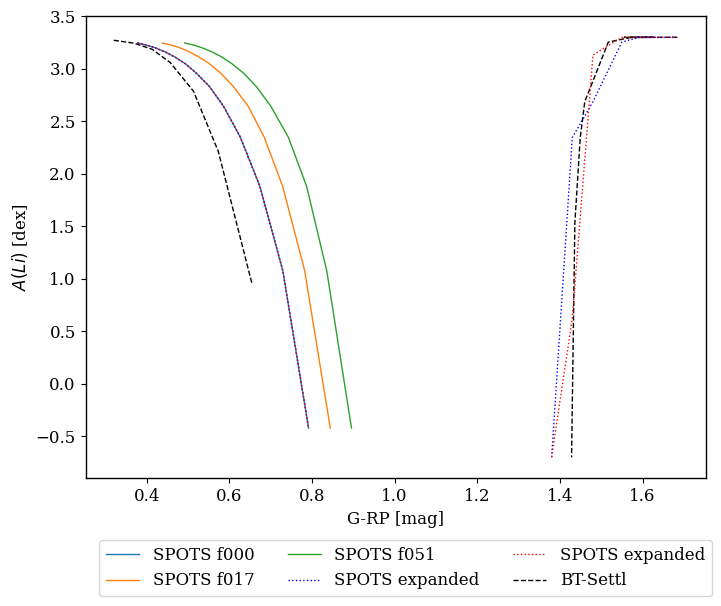

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-RP [mag]')
ax.plot(SPOTS_edr3['00'][0.126]['G_abs'] - SPOTS_edr3['00'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(SPOTS_edr3['17'][0.126]['G_abs'] - SPOTS_edr3['17'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(SPOTS_edr3['51'][0.126]['G_abs'] - SPOTS_edr3['51'][0.126]['RP_abs'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f051')

#ax.scatter(SPOTS_edr3_expanded['00'][0.126]['G-RP'], SPOTS_edr3_expanded['00'][0.126]['A(Li)'], s=10, zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded['00'][0.126]['G-RP'], SPOTS_expanded['00'][0.126]['A(Li)'], lw=1, ls=':', color='b', zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded_A_Li['00'][0.126]['G-RP'], SPOTS_expanded_A_Li['00'][0.126]['A(Li)'], lw=1, ls=':', color='r', zorder=4, label='SPOTS expanded')


ax.plot(BTSettl_Li_isochrones[0.120]['G_abs'] - BTSettl_Li_isochrones[0.120]['RP_abs'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
#ax.errorbar(data_obs_Pleiades['G_abs'] - data_obs_Pleiades['RP_abs'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)

fig.legend(fontsize=12, loc='lower center', ncol=3, bbox_to_anchor=(0.525, -0.1))

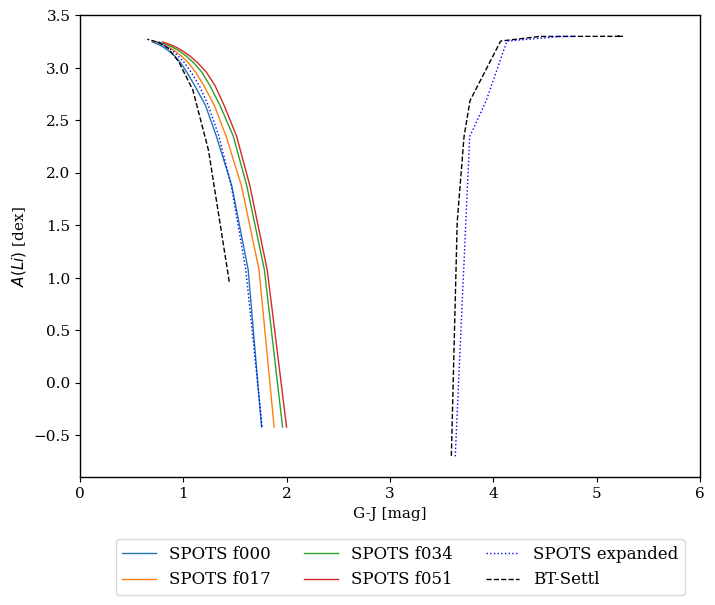

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('$A(Li)$ [dex]')
ax.set_xlabel('G-J [mag]')
ax.plot(SPOTS_edr3['00'][0.126]['G_abs'] - SPOTS_edr3['00'][0.126]['J_mag'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f000')
ax.plot(SPOTS_edr3['17'][0.126]['G_abs'] - SPOTS_edr3['17'][0.126]['J_mag'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f017')
ax.plot(SPOTS_edr3['34'][0.126]['G_abs'] - SPOTS_edr3['34'][0.126]['J_mag'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f034')
ax.plot(SPOTS_edr3['51'][0.126]['G_abs'] - SPOTS_edr3['51'][0.126]['J_mag'], SPOTS_edr3['00'][0.126]['A(Li)'], linewidth=1, label='SPOTS f051')

#ax.scatter(SPOTS_edr3_expanded['00'][0.126]['G-RP'], SPOTS_edr3_expanded['00'][0.126]['A(Li)'], s=10, zorder=4, label='SPOTS expanded')
ax.plot(SPOTS_expanded['00'][0.126]['G-J'], SPOTS_expanded['00'][0.126]['A(Li)'], lw=1, ls=':', color='b', zorder=4, label='SPOTS expanded')

ax.plot(BTSettl_Li_isochrones[0.120]['G_abs'] - BTSettl_Li_isochrones[0.120]['J_abs'], BTSettl_Li_isochrones[0.120]['A(Li)'], linewidth=1, label='BT-Settl', linestyle='--', color='k')
#ax.errorbar(data_obs_Pleiades['G_abs'] - data_obs_Pleiades['J_abs'], data_obs_Pleiades['ALi'], yerr=data_obs_Pleiades['e_ALi'], fmt='.', zorder=0, color='r', elinewidth=1, capsize=2)

ax.set_xlim(0, 6)

fig.legend(fontsize=12, loc='lower center', ncol=3, bbox_to_anchor=(0.525, -0.1))

In [ ]:
#SPOTS_extended(MS_color_file, BTSettl, SPOTS, f).plot_CMD_ALi(SPOTS_expanded, BTSettl_Li_isochrones_Teff_dic, BTSettl_Li_isochrones, data_obs_Pleiades)


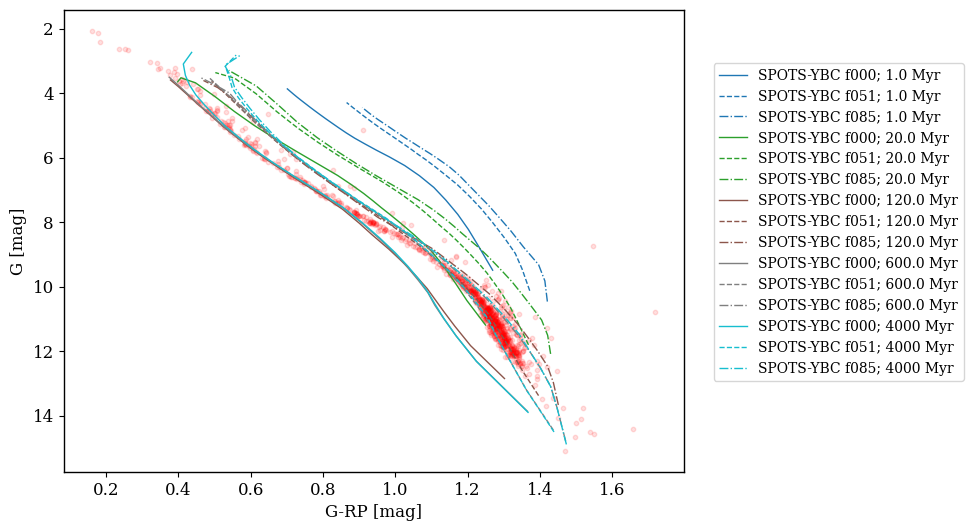

In [29]:
ages_SPOTS = np.array([float(age) for age in SPOTS_edr3['00'].keys()])

def plot_SPOTS_data(age_array, f_array, band1, band2, bandobs):
    """
    Plot SPOTS data with customizable age, f, and band combinations.

    Parameters:
        age_array (array-like): array of age values in Gyr.
        f_array (array-like): array of f values.
        band1 (str): first band for plotting.
        band2 (str): second band for plotting.
        bandobs (str): band for observational data.
    """
    plt.rcParams.update({'font.size': 12})  # Set the font size

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.set_ylabel(f'{band1} [mag]')
    ax.set_xlabel(f'{band1}-{band2} [mag]')

    # Color map creation
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i) for i in np.linspace(0, 1, len(age_array))]

    # Line style array
    ls_array = ['-', '--', '-.', ':']

    for i, age in enumerate(age_array):
        age_Myr = age * 1000
        for j, f in enumerate(f_array):
            closest_age = ages_SPOTS[np.abs(ages_SPOTS - age).argmin()]
            if closest_age in SPOTS_edr3[f]:
                ax.plot(
                    SPOTS_edr3[f][closest_age][f'{band1}_abs'] - SPOTS_edr3[f][closest_age][f'{band2}_abs'],
                    SPOTS_edr3[f][closest_age][f'{band1}_abs'],
                    label=f'SPOTS-YBC f0{f}; {age_Myr} Myr',
                    color=colors[i],
                    lw=1,
                    ls=ls_array[j % len(ls_array)]
                )
            else:
                print(f"Closest age {closest_age} not found in SPOTS_edr3[f][{f}]")
                
                
    ax.scatter(data_obs_Pleiades[f'{band1}_abs'] - data_obs_Pleiades[f'{band2}_abs'], data_obs_Pleiades[f'{bandobs}_abs'], s=10, zorder=0, color='r', alpha=0.125)

    ax.legend(fontsize=10, loc='upper center', bbox_to_anchor=(1.25, 0.9))

    ax.invert_yaxis()
    plt.show()

age_array = [0.001, 0.02, 0.120, 0.6, 4]
f_array = ['00', '51', '85']

plot_SPOTS_data(age_array, f_array, 'G', 'RP', 'G')

age_array = [0.001, 0.02, 0.120, 0.6, 4]
f_array = ['00']

plot_SPOTS_data(age_array, f_array, 'G', 'RP', 'G')

plot_SPOTS_data(age_array, f_array, 'G', 'J', 'G')

## Isochrones plots

In [34]:
plt.rcParams.update({'font.size': 14, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

Isochrones in HRD (interior) and CMD (atmosphere)

In [ ]:
from models_test import Isochrones

In [ ]:
bands1 = [['G_abs', 'RP_abs'], ['G_abs', 'J_abs'], ['J_abs', 'K_abs'], ['G_abs', 'y_abs'], ['G_abs', 'z_abs']]
bands2 = [['G_i00', 'G_RP_i00'], ['G_i00', 'J_i00'], ['J_i00', 'Ks_i00'], ['G_i00', 'yP1_i00'], ['G_i00', 'zP1_i00']]
bandsobs = [['G', 'RP'], ['G', 'J'], ['J', 'K'], ['G', 'y'], ['G', 'z']]

isochrones = [0.02, 0.08, 0.12, 0.6]

isochrones_grid = Isochrones(
    BTSettl_Li_isochrones,
    PARSEC_iso_omega_00_Phot_dict,
    bands1,
    bands2,
    'BT-Settl $\odot$',
    r'PARSEC $\omega_i=0.0$; $Z=0.001547$',
    isochrones,
    filename='model_comparison',
    data_obs=data_obs_Pleiades,
    obs=True,
    bandsobs=bandsobs,
    dpi=350
)

%matplotlib inline
isochrones_grid.plot_isochrones_grid()

In [ ]:
%matplotlib inline
isochrones_grid.plot_single_column(['BP_abs', 'RP_abs', 'G_abs'], ['G_BP_i00', 'G_RP_i00', 'G_i00'], ['BP', 'RP', 'G'])